In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm
from collections import defaultdict
from collections import Counter
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
from wordcloud import WordCloud

In [2]:
import os
os.environ['JAVA_HOME']=r'C:\Program Files\Java\jdk-20'
#os.environ['JAV']


In [3]:
from konlpy.tag import Okt
okt=Okt()

In [4]:
train=pd.read_csv('train.csv')
sales=pd.read_csv('sales.csv')
product_info=pd.read_csv('product_info.csv')
brand=pd.read_csv('brand_keyword_cnt.csv')
test=pd.read_csv('sample_submission.csv')

In [5]:
train

ID                제품             대분류             중분류  \
0          0  B002-00001-00001  B002-C001-0002  B002-C002-0007   
1          1  B002-00002-00001  B002-C001-0003  B002-C002-0008   
2          2  B002-00002-00002  B002-C001-0003  B002-C002-0008   
3          3  B002-00002-00003  B002-C001-0003  B002-C002-0008   
4          4  B002-00003-00001  B002-C001-0001  B002-C002-0001   
...      ...               ...             ...             ...   
15885  15885  B002-03799-00002  B002-C001-0003  B002-C002-0008   
15886  15886  B002-03799-00003  B002-C001-0003  B002-C002-0008   
15887  15887  B002-03799-00004  B002-C001-0003  B002-C002-0008   
15888  15888  B002-03799-00005  B002-C001-0003  B002-C002-0008   
15889  15889  B002-03799-00010  B002-C001-0002  B002-C002-0004   

                  소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
0      B002-C003-0038  B002-00001           0           0           0   
1      B002-C003-0044  B002-00002           0           0           0   
2      B002-C003-0044  B002-00002           0           0           0   
3      B002-C003-0044  B002-00002           0           0           0   
4      B002-C003-0003  B002-00003           0           0           0   
...               ...         ...         ...         ...         ...   
15885  B002-C003-0042  B002-03799           0           0           0   
15886  B002-C003-0044  B002-03799           0           0           0   
15887  B002-C003-0044  B002-03799           0           0           0   
15888  B002-C003-0044  B002-03799           0           0           0   
15889  B002-C003-0020  B002-03799           0           0           0   

       2022-01-04  ...  2023-03-26  2023-03-27  2023-03-28  2023-03-29  \
0               0  ...           0           0           0           0   
1               0  ...           0           0           0           1   
2               0  ...           0           0           0           0   
3               0  ...           0           0           0           0   
4               0  ...           0           0           0           0   
...           ...  ...         ...         ...         ...         ...   
15885           0  ...           0           0           0           0   
15886           0  ...           0           0           0           3   
15887           0  ...           0           0           0           0   
15888           0  ...           0           0           0           0   
15889           0  ...           0           0           0           0   

       2023-03-30  2023-03-31  2023-04-01  2023-04-02  2023-04-03  2023-04-04  
0               0           0           0           0           0           0  
1               3           2           0           0           2           0  
2               0           0           0           0           0           0  
3               0           0           0           0           0           0  
4               0           0           0           0           0           0  
...           ...         ...         ...         ...         ...         ...  
15885           0           0           0           0           0           0  
15886           0           2           4           1           1           3  
15887           0           0           0           0           0           0  
15888           0           0           0           0           0           2  
15889           0           0           0           0           0           0  

[15890 rows x 465 columns]

브랜드는 묶음이 너무 많고 소분류끼리 공통점을 찾기 위해서 묶어보았습니다.

In [6]:
Group1 = train.groupby(['대분류','중분류','소분류'])
Group1.size()

대분류             중분류             소분류           
B002-C001-0001  B002-C002-0001  B002-C003-0001     751
                                B002-C003-0002     663
                                B002-C003-0003    1426
                                B002-C003-0004     426
                                B002-C003-0005     342
                B002-C002-0009  B002-C003-0051     160
B002-C001-0002  B002-C002-0002  B002-C003-0006     175
                                B002-C003-0007     262
                                B002-C003-0008     112
                                B002-C003-0009     183
                                B002-C003-0010     113
                                B002-C003-0011     101
                B002-C002-0003  B002-C003-0012      75
                                B002-C003-0013     104
                                B002-C003-0014     236
                                B002-C003-0015     466
                                B002-C003-0016     342
                  

In [7]:
len(Group1.size())

53

In [8]:
list(Group1)

[(('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0001'),
            ID                제품             대분류             중분류  \
  30        30  B002-00008-00001  B002-C001-0001  B002-C002-0001   
  75        75  B002-00035-00001  B002-C001-0001  B002-C002-0001   
  77        77  B002-00037-00001  B002-C001-0001  B002-C002-0001   
  84        84  B002-00043-00001  B002-C001-0001  B002-C002-0001   
  85        85  B002-00043-00002  B002-C001-0001  B002-C002-0001   
  ...      ...               ...             ...             ...   
  15765  15765  B002-03777-00002  B002-C001-0001  B002-C002-0001   
  15766  15766  B002-03777-00003  B002-C001-0001  B002-C002-0001   
  15805  15805  B002-03790-00001  B002-C001-0001  B002-C002-0001   
  15829  15829  B002-03796-00011  B002-C001-0001  B002-C002-0001   
  15830  15830  B002-03796-00012  B002-C001-0001  B002-C002-0001   
  
                    소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
  30     B002-C003-0001  B002-00008           0 

In [9]:
GroupDic = dict(list(Group1))
GroupDic.keys()

dict_keys([('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0001'), ('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0002'), ('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0003'), ('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0004'), ('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0005'), ('B002-C001-0001', 'B002-C002-0009', 'B002-C003-0051'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0006'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0007'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0008'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0009'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0010'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0011'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0012'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0013'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0014'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0015'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0016'), ('B002-C001-0002', 'B002-C002-0003', 

소분류끼리 묶음을 보니까 53개가 나왔습니다. 이때 53개를 따로 데이터 프레임을 만들었습니다. 그러니까 총 53개의 데이터 프레임이 만들어지는겁니다.

In [10]:
grouped_dataframes = {}

for group_key in GroupDic.keys():
    grouped_dataframes[group_key] = GroupDic[group_key]

B111,B112,B1951 이런식으로 데이터 프레임 이름을 지었습니다. 튜플에 맨 뒤에 있는 숫자를 하나씩 따와서 이름을 지었습니다. 예를들어 B1951같은 경우 [('B002-C001-0001','B002-C002-0009','B002-C003-0051')] 이런식으로 되어 있어서 맨 오른쪽 숫자 하나 1, 9 ,51 이렇게 해서 B1951이라고 지었습니다.

In [11]:
B111=grouped_dataframes[('B002-C001-0001','B002-C002-0001','B002-C003-0001')]
B111

ID                제품             대분류             중분류  \
30        30  B002-00008-00001  B002-C001-0001  B002-C002-0001   
75        75  B002-00035-00001  B002-C001-0001  B002-C002-0001   
77        77  B002-00037-00001  B002-C001-0001  B002-C002-0001   
84        84  B002-00043-00001  B002-C001-0001  B002-C002-0001   
85        85  B002-00043-00002  B002-C001-0001  B002-C002-0001   
...      ...               ...             ...             ...   
15765  15765  B002-03777-00002  B002-C001-0001  B002-C002-0001   
15766  15766  B002-03777-00003  B002-C001-0001  B002-C002-0001   
15805  15805  B002-03790-00001  B002-C001-0001  B002-C002-0001   
15829  15829  B002-03796-00011  B002-C001-0001  B002-C002-0001   
15830  15830  B002-03796-00012  B002-C001-0001  B002-C002-0001   

                  소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
30     B002-C003-0001  B002-00008           0           0           3   
75     B002-C003-0001  B002-00035           0           0           0   
77     B002-C003-0001  B002-00037           0           0           0   
84     B002-C003-0001  B002-00043           0           0           0   
85     B002-C003-0001  B002-00043           0           0           0   
...               ...         ...         ...         ...         ...   
15765  B002-C003-0001  B002-03777           0           0           0   
15766  B002-C003-0001  B002-03777           0           0           0   
15805  B002-C003-0001  B002-03790           0           2           0   
15829  B002-C003-0001  B002-03796           0           0           0   
15830  B002-C003-0001  B002-03796           0           0           0   

       2022-01-04  ...  2023-03-26  2023-03-27  2023-03-28  2023-03-29  \
30              4  ...           0           0           0           0   
75              0  ...           0           0           0           0   
77              0  ...           0           0           0           3   
84              0  ...           0           0           0           0   
85              0  ...           0           0           1           1   
...           ...  ...         ...         ...         ...         ...   
15765           0  ...           0           0           0           0   
15766           0  ...           0           0           0           0   
15805           1  ...           0           0           0           0   
15829           0  ...           0           0           0           0   
15830           0  ...           0           0           0           0   

       2023-03-30  2023-03-31  2023-04-01  2023-04-02  2023-04-03  2023-04-04  
30              0           1           2           2           2           0  
75              0           0           0           0           0           0  
77              0           0           4           0          10           4  
84              0           0           0           0           0           0  
85              1           1           1           2           1           1  
...           ...         ...         ...         ...         ...         ...  
15765           0           0           0           0           0           0  
15766           0           0           0           0           0           0  
15805           1           1           0           0           1           3  
15829           0           0           0           0           0           0  
15830           0           0           0           0           0           0  

[751 rows x 465 columns]

In [12]:
B112=grouped_dataframes[('B002-C001-0001','B002-C002-0001','B002-C003-0002')]
B112

ID                제품             대분류             중분류  \
86        86  B002-00043-00004  B002-C001-0001  B002-C002-0001   
87        87  B002-00043-00007  B002-C001-0001  B002-C002-0001   
91        91  B002-00043-00012  B002-C001-0001  B002-C002-0001   
138      138  B002-00066-00001  B002-C001-0001  B002-C002-0001   
278      278  B002-00085-00002  B002-C001-0001  B002-C002-0001   
...      ...               ...             ...             ...   
15514  15514  B002-03710-00013  B002-C001-0001  B002-C002-0001   
15515  15515  B002-03710-00014  B002-C001-0001  B002-C002-0001   
15516  15516  B002-03710-00015  B002-C001-0001  B002-C002-0001   
15517  15517  B002-03710-00016  B002-C001-0001  B002-C002-0001   
15532  15532  B002-03724-00001  B002-C001-0001  B002-C002-0001   

                  소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
86     B002-C003-0002  B002-00043           0           0           0   
87     B002-C003-0002  B002-00043           0           0           0   
91     B002-C003-0002  B002-00043           0           0           0   
138    B002-C003-0002  B002-00066           0           0           0   
278    B002-C003-0002  B002-00085         122         106         103   
...               ...         ...         ...         ...         ...   
15514  B002-C003-0002  B002-03710           0           0           0   
15515  B002-C003-0002  B002-03710           0           0           1   
15516  B002-C003-0002  B002-03710           0           0           0   
15517  B002-C003-0002  B002-03710           0           0           0   
15532  B002-C003-0002  B002-03724           5           6           2   

       2022-01-04  ...  2023-03-26  2023-03-27  2023-03-28  2023-03-29  \
86              0  ...           0           0           0           0   
87              0  ...           0           0           0           0   
91              0  ...           0           0           0           0   
138             0  ...           0           0           0           0   
278           117  ...           0           0           0           0   
...           ...  ...         ...         ...         ...         ...   
15514           1  ...           0           0           0           0   
15515           0  ...           0           0           0           0   
15516           0  ...           0           0           0           0   
15517           0  ...           0           0           0           0   
15532           2  ...           0           0           0           0   

       2023-03-30  2023-03-31  2023-04-01  2023-04-02  2023-04-03  2023-04-04  
86              0           0           0           0           0           0  
87              0           0           0           0           0           0  
91              0           0           0           0           0           0  
138             0           0           0           0           0           0  
278             0           0           0           0           0           0  
...           ...         ...         ...         ...         ...         ...  
15514           0           0           0           0           0           0  
15515           0           0           0           0           0           0  
15516           0           0           0           0           0           0  
15517           0           0           0           0           0           0  
15532           0           0           0           0           0           0  

[663 rows x 465 columns]

In [13]:
B113=grouped_dataframes[('B002-C001-0001','B002-C002-0001','B002-C003-0003')]
B113

ID                제품             대분류             중분류  \
4          4  B002-00003-00001  B002-C001-0001  B002-C002-0001   
5          5  B002-00003-00002  B002-C001-0001  B002-C002-0001   
6          6  B002-00003-00003  B002-C001-0001  B002-C002-0001   
7          7  B002-00003-00004  B002-C001-0001  B002-C002-0001   
8          8  B002-00003-00005  B002-C001-0001  B002-C002-0001   
...      ...               ...             ...             ...   
15819  15819  B002-03796-00002  B002-C001-0001  B002-C002-0001   
15820  15820  B002-03796-00003  B002-C001-0001  B002-C002-0001   
15825  15825  B002-03796-00008  B002-C001-0001  B002-C002-0001   
15827  15827  B002-03796-00009  B002-C001-0001  B002-C002-0001   
15828  15828  B002-03796-00010  B002-C001-0001  B002-C002-0001   

                  소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
4      B002-C003-0003  B002-00003           0           0           0   
5      B002-C003-0003  B002-00003           0           0           0   
6      B002-C003-0003  B002-00003           0           0           0   
7      B002-C003-0003  B002-00003           0           0           0   
8      B002-C003-0003  B002-00003           0           0           0   
...               ...         ...         ...         ...         ...   
15819  B002-C003-0003  B002-03796           0           0           0   
15820  B002-C003-0003  B002-03796           0           0           0   
15825  B002-C003-0003  B002-03796           0           0           0   
15827  B002-C003-0003  B002-03796          23          23          26   
15828  B002-C003-0003  B002-03796           0           0           0   

       2022-01-04  ...  2023-03-26  2023-03-27  2023-03-28  2023-03-29  \
4               0  ...           0           0           0           0   
5               0  ...           0           0           0           0   
6               7  ...           0           0           0           0   
7               0  ...           0           0           0           0   
8              15  ...           0           0           0           0   
...           ...  ...         ...         ...         ...         ...   
15819           0  ...           0           0           0           3   
15820           0  ...           0           0           0           4   
15825           0  ...           0           0           0           0   
15827          44  ...           0           0           0           0   
15828           0  ...           0           0           0           0   

       2023-03-30  2023-03-31  2023-04-01  2023-04-02  2023-04-03  2023-04-04  
4               0           0           0           0           0           0  
5               0           0           0           0           0           0  
6               0           0           0           0           0           0  
7               0           0           0           0           0           0  
8               0           0           0           0           0           1  
...           ...         ...         ...         ...         ...         ...  
15819          16           6           0          16           7           5  
15820           0           0           0           0           0           0  
15825           0           0           0           0           0           0  
15827           0           0           0           0           0           0  
15828           6           0           8           0           3           2  

[1426 rows x 465 columns]

In [14]:
B114=grouped_dataframes[('B002-C001-0001','B002-C002-0001','B002-C003-0004')]
B115=grouped_dataframes[('B002-C001-0001','B002-C002-0001','B002-C003-0005')]
B1951=grouped_dataframes[('B002-C001-0001','B002-C002-0009','B002-C003-0051')]
B226=grouped_dataframes[('B002-C001-0002','B002-C002-0002','B002-C003-0006')]
B227=grouped_dataframes[('B002-C001-0002','B002-C002-0002','B002-C003-0007')]
B228=grouped_dataframes[('B002-C001-0002','B002-C002-0002','B002-C003-0008')]
B229=grouped_dataframes[('B002-C001-0002','B002-C002-0002','B002-C003-0009')]
B2210=grouped_dataframes[('B002-C001-0002','B002-C002-0002','B002-C003-0010')]
B2211=grouped_dataframes[('B002-C001-0002','B002-C002-0002','B002-C003-0011')]
B2312=grouped_dataframes[('B002-C001-0002','B002-C002-0003','B002-C003-0012')]
B2313=grouped_dataframes[('B002-C001-0002','B002-C002-0003','B002-C003-0013')]
B2314=grouped_dataframes[('B002-C001-0002','B002-C002-0003','B002-C003-0014')]
B2315=grouped_dataframes[('B002-C001-0002','B002-C002-0003','B002-C003-0015')]
B2316=grouped_dataframes[('B002-C001-0002','B002-C002-0003','B002-C003-0016')]
B2317=grouped_dataframes[('B002-C001-0002','B002-C002-0003','B002-C003-0017')]
B2318=grouped_dataframes[('B002-C001-0002','B002-C002-0003','B002-C003-0018')]
B2419=grouped_dataframes[('B002-C001-0002','B002-C002-0004','B002-C003-0019')]
B2420=grouped_dataframes[('B002-C001-0002','B002-C002-0004','B002-C003-0020')]
B2421=grouped_dataframes[('B002-C001-0002','B002-C002-0004','B002-C003-0021')]
B2422=grouped_dataframes[('B002-C001-0002','B002-C002-0004','B002-C003-0022')]
B2423=grouped_dataframes[('B002-C001-0002','B002-C002-0004','B002-C003-0023')]
B2524=grouped_dataframes[('B002-C001-0002','B002-C002-0005','B002-C003-0024')]
B2525=grouped_dataframes[('B002-C001-0002','B002-C002-0005','B002-C003-0025')]
B2526=grouped_dataframes[('B002-C001-0002','B002-C002-0005','B002-C003-0026')]
B2527=grouped_dataframes[('B002-C001-0002','B002-C002-0005','B002-C003-0027')]
B2528=grouped_dataframes[('B002-C001-0002','B002-C002-0005','B002-C003-0028')]
B2529=grouped_dataframes[('B002-C001-0002','B002-C002-0005','B002-C003-0029')]
B2541=grouped_dataframes[('B002-C001-0002','B002-C002-0005','B002-C003-0041')]
B2630=grouped_dataframes[('B002-C001-0002','B002-C002-0006','B002-C003-0030')]
B2631=grouped_dataframes[('B002-C001-0002','B002-C002-0006','B002-C003-0031')]
B2632=grouped_dataframes[('B002-C001-0002','B002-C002-0006','B002-C003-0032')]
B2633=grouped_dataframes[('B002-C001-0002','B002-C002-0006','B002-C003-0033')]
B2634=grouped_dataframes[('B002-C001-0002','B002-C002-0006','B002-C003-0034')]
B2735=grouped_dataframes[('B002-C001-0002','B002-C002-0007','B002-C003-0035')]
B2736=grouped_dataframes[('B002-C001-0002','B002-C002-0007','B002-C003-0036')]
B2737=grouped_dataframes[('B002-C001-0002','B002-C002-0007','B002-C003-0037')]
B2738=grouped_dataframes[('B002-C001-0002','B002-C002-0007','B002-C003-0038')]
B2739=grouped_dataframes[('B002-C001-0002','B002-C002-0007','B002-C003-0039')]
B2740=grouped_dataframes[('B002-C001-0002','B002-C002-0007','B002-C003-0040')]
B2945=grouped_dataframes[('B002-C001-0002','B002-C002-0009','B002-C003-0045')]
B2946=grouped_dataframes[('B002-C001-0002','B002-C002-0009','B002-C003-0046')]
B2948=grouped_dataframes[('B002-C001-0002','B002-C002-0009','B002-C003-0048')]
B2949=grouped_dataframes[('B002-C001-0002','B002-C002-0009','B002-C003-0049')]

In [15]:
B3842=grouped_dataframes[('B002-C001-0003','B002-C002-0008','B002-C003-0042')]
B3843=grouped_dataframes[('B002-C001-0003','B002-C002-0008','B002-C003-0043')]
B3844=grouped_dataframes[('B002-C001-0003','B002-C002-0008','B002-C003-0044')]
B3050=grouped_dataframes[('B002-C001-0003','B002-C002-0010','B002-C003-0050')]

In [16]:
B4947=grouped_dataframes[('B002-C001-0004','B002-C002-0009','B002-C003-0047')]
B5152=grouped_dataframes[('B002-C001-0005','B002-C002-0011','B002-C003-0052')]
B5153=grouped_dataframes[('B002-C001-0005','B002-C002-0011','B002-C003-0053')]

모든 53개의 데이터프레임 전부 날짜별로 판매량의 합계를 더했고 맨 마지막 인덱스에 추가하였습니다.

In [17]:
# 6열부터 끝까지 각 열의 총합 계산
column_sums = B114.iloc[:, 6:].sum()

# 새로운 행 생성; 처음 5열은 NaN으로 채우기
new_row = [float('nan')] * 6+ list(column_sums)
B114 = B114.append(pd.Series(new_row, index=B114.columns), ignore_index=True)

In [18]:
# 총 53개의 데이터프레임 이름을 리스트로 만들기
dataframes = [B111,B112,B113,
    B115, B1951, B226, B227, B228, B229, B2210, B2211, B2312, B2313, B2314, B2315, B2316, B2317, B2318,
    B2419, B2420, B2421, B2422, B2423, B2524, B2525, B2526, B2527, B2528, B2529, B2541, B2630,
    B2631, B2632, B2633, B2634, B2735, B2736, B2737, B2738, B2739, B2740, B2945, B2946, B2948, B2949, B3842,
    B3843, B3844, B3050, B4947, B5152, B5153
]

# 각 데이터프레임에 대한 반복
for df in dataframes:
    # 6열부터 끝까지 각 열의 총합 계산
    column_sums = df.iloc[:, 6:].sum()
    
    # 새로운 행 생성; 처음 5열은 NaN으로 채우기
    new_row = [float('nan')] * 6 + list(column_sums)
    
    # 새로운 행 추가
    df.loc[len(df)] = new_row

In [19]:
B111

ID                제품             대분류             중분류  \
30        30.0  B002-00008-00001  B002-C001-0001  B002-C002-0001   
75        75.0  B002-00035-00001  B002-C001-0001  B002-C002-0001   
77        77.0  B002-00037-00001  B002-C001-0001  B002-C002-0001   
84        84.0  B002-00043-00001  B002-C001-0001  B002-C002-0001   
85        85.0  B002-00043-00002  B002-C001-0001  B002-C002-0001   
...        ...               ...             ...             ...   
15766  15766.0  B002-03777-00003  B002-C001-0001  B002-C002-0001   
15805  15805.0  B002-03790-00001  B002-C001-0001  B002-C002-0001   
15829  15829.0  B002-03796-00011  B002-C001-0001  B002-C002-0001   
15830  15830.0  B002-03796-00012  B002-C001-0001  B002-C002-0001   
751        NaN               NaN             NaN             NaN   

                  소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
30     B002-C003-0001  B002-00008         0.0         0.0         3.0   
75     B002-C003-0001  B002-00035         0.0         0.0         0.0   
77     B002-C003-0001  B002-00037         0.0         0.0         0.0   
84     B002-C003-0001  B002-00043         0.0         0.0         0.0   
85     B002-C003-0001  B002-00043         0.0         0.0         0.0   
...               ...         ...         ...         ...         ...   
15766  B002-C003-0001  B002-03777         0.0         0.0         0.0   
15805  B002-C003-0001  B002-03790         0.0         2.0         0.0   
15829  B002-C003-0001  B002-03796         0.0         0.0         0.0   
15830  B002-C003-0001  B002-03796         0.0         0.0         0.0   
751               NaN         NaN      7139.0      6480.0      6410.0   

       2022-01-04  ...  2023-03-26  2023-03-27  2023-03-28  2023-03-29  \
30            4.0  ...         0.0         0.0         0.0         0.0   
75            0.0  ...         0.0         0.0         0.0         0.0   
77            0.0  ...         0.0         0.0         0.0         3.0   
84            0.0  ...         0.0         0.0         0.0         0.0   
85            0.0  ...         0.0         0.0         1.0         1.0   
...           ...  ...         ...         ...         ...         ...   
15766         0.0  ...         0.0         0.0         0.0         0.0   
15805         1.0  ...         0.0         0.0         0.0         0.0   
15829         0.0  ...         0.0         0.0         0.0         0.0   
15830         0.0  ...         0.0         0.0         0.0         0.0   
751        7237.0  ...       382.0       393.0       357.0      7895.0   

       2023-03-30  2023-03-31  2023-04-01  2023-04-02  2023-04-03  2023-04-04  
30            0.0         1.0         2.0         2.0         2.0         0.0  
75            0.0         0.0         0.0         0.0         0.0         0.0  
77            0.0         0.0         4.0         0.0        10.0         4.0  
84            0.0         0.0         0.0         0.0         0.0         0.0  
85            1.0         1.0         1.0         2.0         1.0         1.0  
...           ...         ...         ...         ...         ...         ...  
15766         0.0         0.0         0.0         0.0         0.0         0.0  
15805         1.0         1.0         0.0         0.0         1.0         3.0  
15829         0.0         0.0         0.0         0.0         0.0         0.0  
15830         0.0         0.0         0.0         0.0         0.0         0.0  
751        7158.0      7115.0      6222.0      5615.0      7389.0      8965.0  

[752 rows x 465 columns]

데이터프레임간 즉 소분류간 일자별 판매량의 총합계의 추세를 알아보기 위하여 시각화를 해보았습니다. 이때 전체 데이터프레임 53개를 전부 묶기엔 너무 복잡하고 가독성이 떨어져서 중분류가 같은거 끼리  그래프를 도시하고 추세를확인해보았습니다.

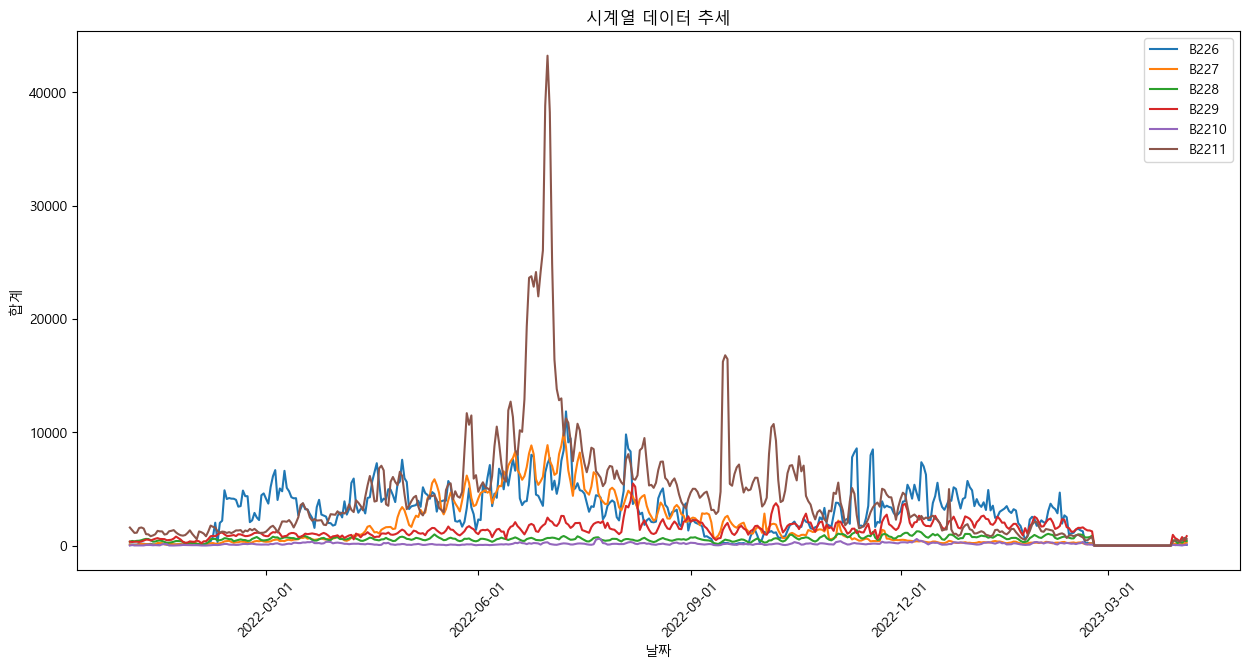

In [20]:
# 데이터프레임 리스트 생성
dataframes_B2 = [B226, B227, B228, B229, B2210, B2211]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B226.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B226', 'B227', 'B228', 'B229', 'B2210', 'B2211'] # 수정된 부분

for idx, df in enumerate(dataframes_B2):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

B2211 데이터를 제외하고 빼고 다시 시각화하였습니다.

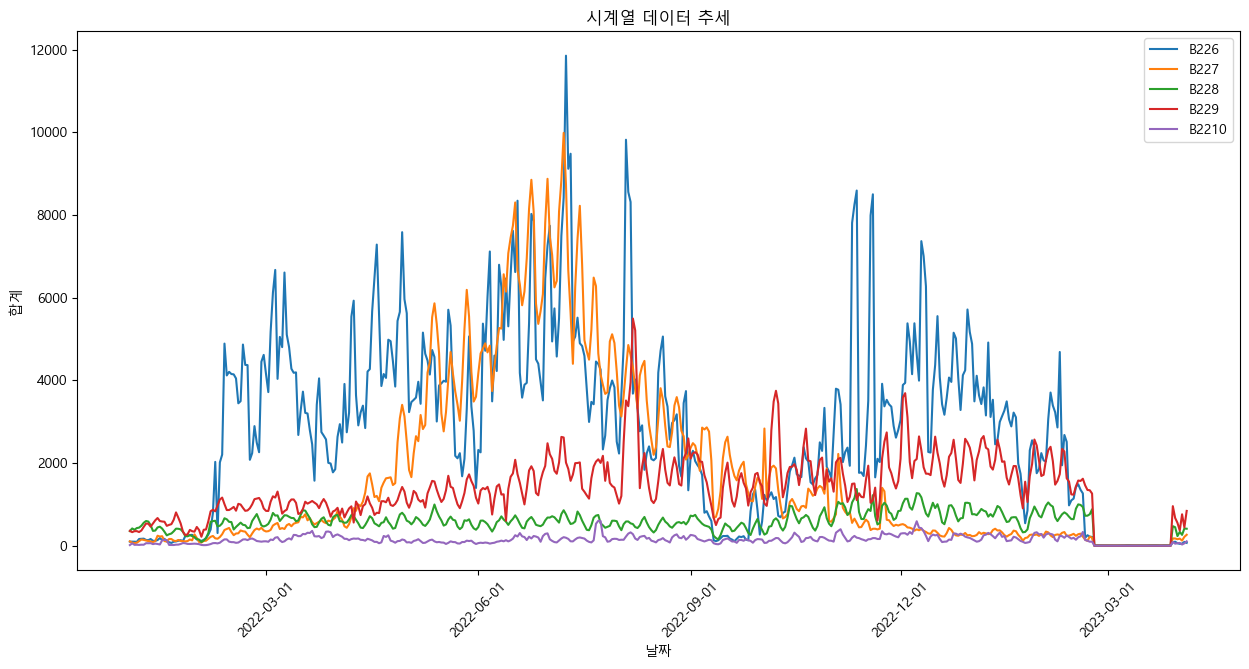

In [21]:
# 데이터프레임 리스트 생성
dataframes_B2 = [B226, B227, B228, B229, B2210]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B226.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B226', 'B227', 'B228', 'B229', 'B2210'] # 수정된 부분

for idx, df in enumerate(dataframes_B2):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

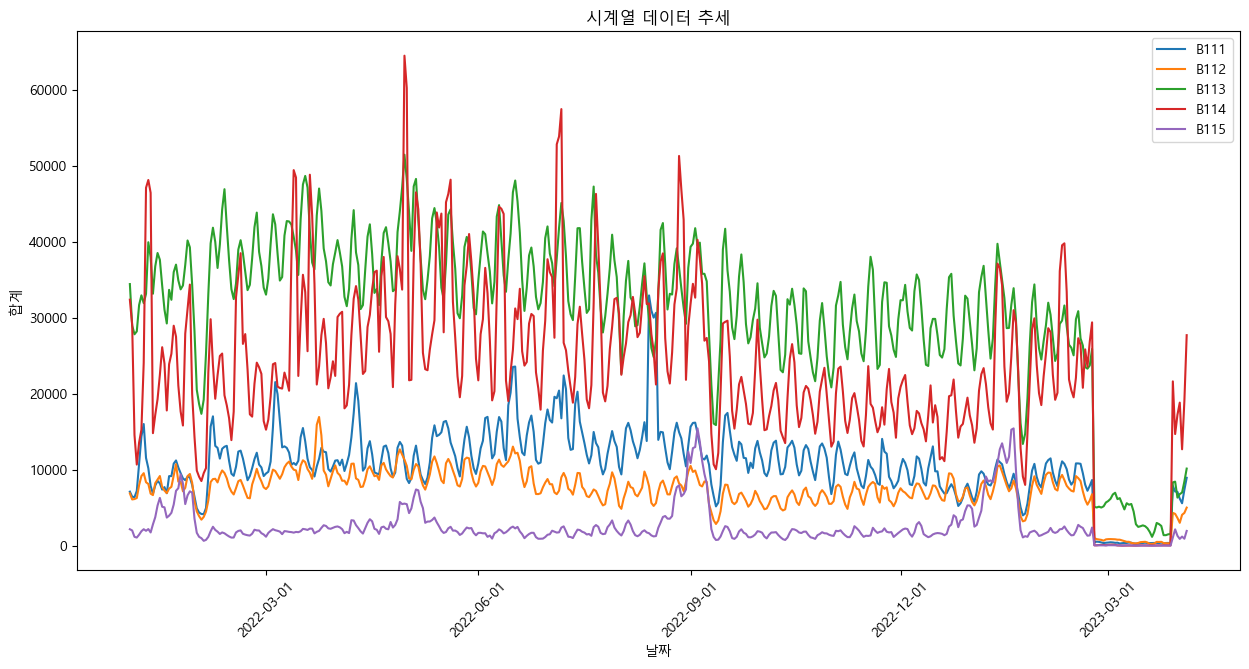

In [22]:
# 데이터프레임 리스트 생성
dataframes_B1 = [B111, B112, B113, B114, B115]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B111.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B111', 'B112', 'B113', 'B114', 'B115'] # 수정된 부분

for idx, df in enumerate(dataframes_B1):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

기간을 좁혀서도 추세를확인하였습니다.

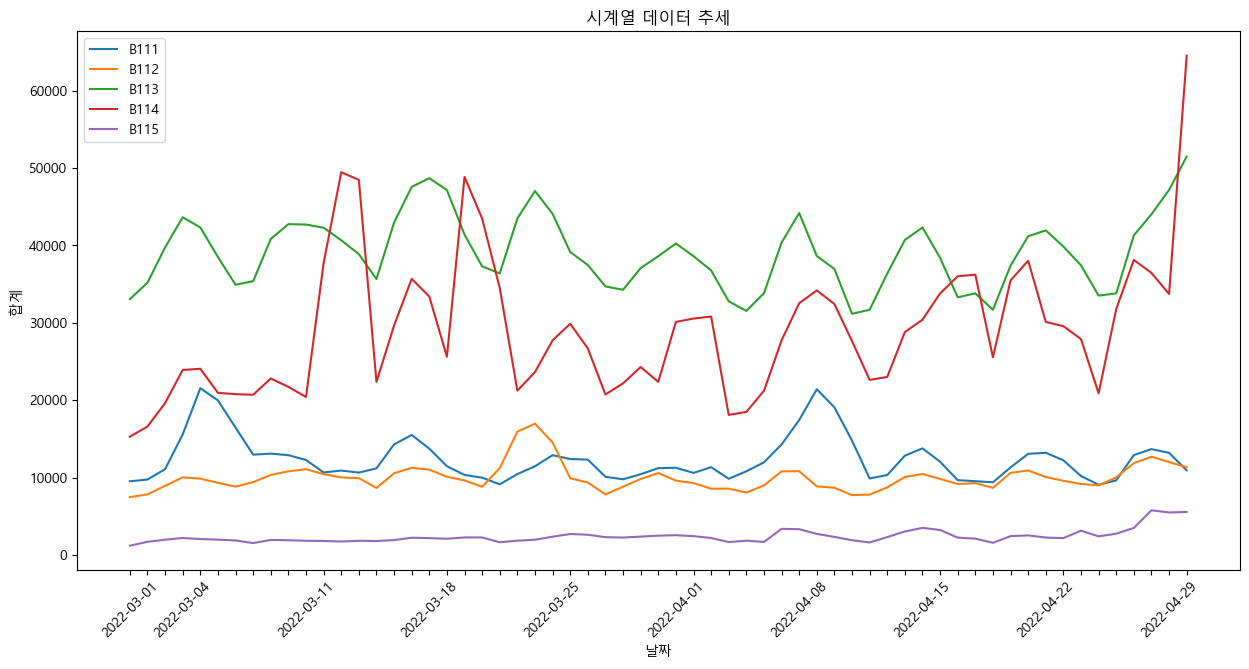

In [23]:
# 데이터프레임 리스트 생성
dataframes_B1 = [B111, B112, B113, B114, B115]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B111.columns[6:].astype(str)
# x_labels에서 2022-03-01 부터 2022-05-01의 인덱스 추출
date_filter = [(date >= "2022-03" and date <= "2022-05") for date in x_labels]
x_values = x_labels[date_filter]
# x_labels에서 매주 의 금요일 날짜만 추출하여 xtiklabel로 사용
specified_labels = []
for i, date in enumerate(x_values):
    if date[-2:] == "01" or i == 0: # 월초 또는 첫번째 날짜는 반드시 라벨링
        specified_labels.append(date)
    elif pd.to_datetime(date).dayofweek == 4: # 금요일인 경우에만 라벨링
        specified_labels.append(date)
    else:
        specified_labels.append("")
specified_indices = [idx for idx, date in enumerate(x_values) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B111', 'B112', 'B113', 'B114', 'B115'] # 수정된 부분

for idx, df in enumerate(dataframes_B1):
    last_row = df.iloc[-1, 6:]
    # x_values 범위에 해당하는 데이터만 plot
    ax.plot(x_values, last_row[date_filter], label=labels[idx]) # 수정된 부분

#ax.set_xticks(np.arange(len(x_values))[date_filter]) # 모든 날짜 표시
ax.set_xticklabels(specified_labels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

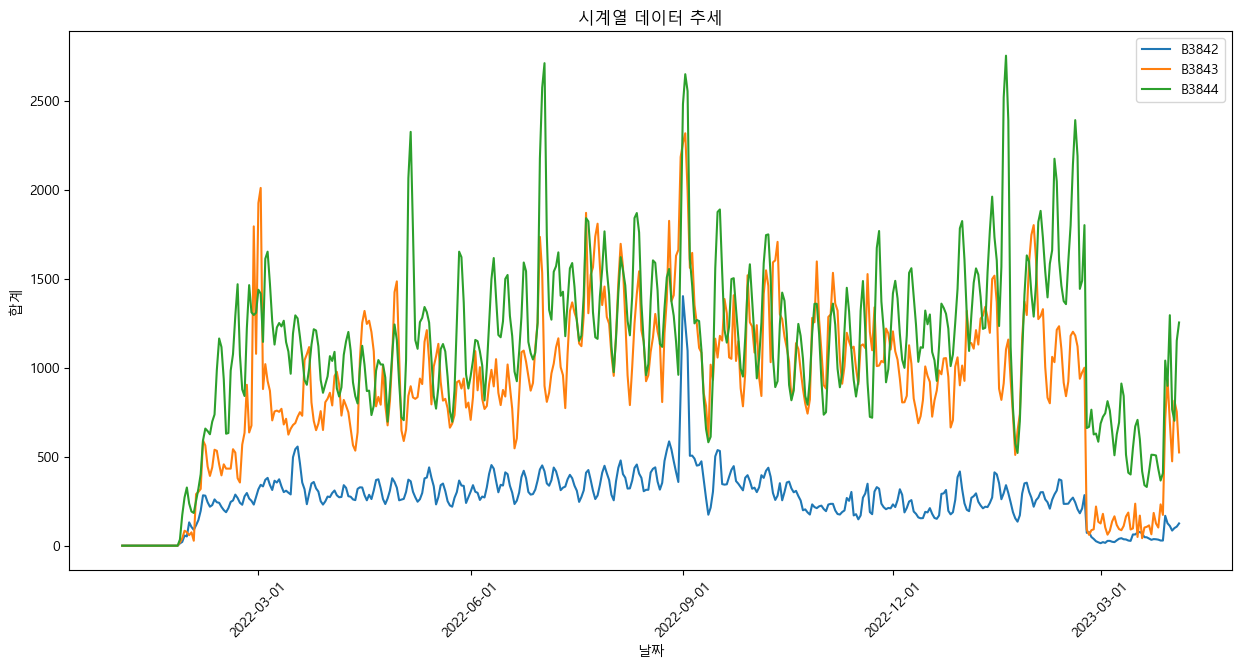

In [24]:
# 데이터프레임 리스트 생성
dataframes_B8 = [B3842, B3843, B3844]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B226.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B3842', 'B3843', 'B3844'] # 수정된 부분

for idx, df in enumerate(dataframes_B8):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

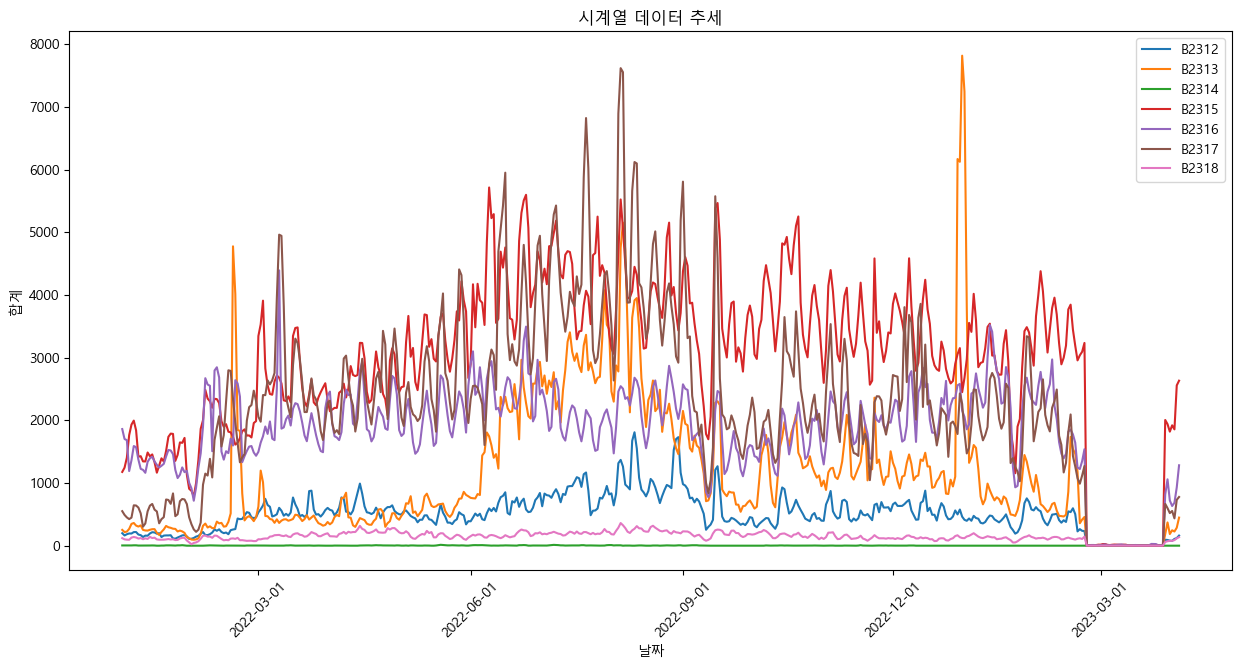

In [25]:
# 데이터프레임 리스트 생성
dataframes_B3 = [B2312, B2313, B2314, B2315, B2316, B2317,B2318]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B226.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B2312', 'B2313', 'B2314', 'B2315', 'B2316', 'B2317','B2318'] # 수정된 부분

for idx, df in enumerate(dataframes_B3):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

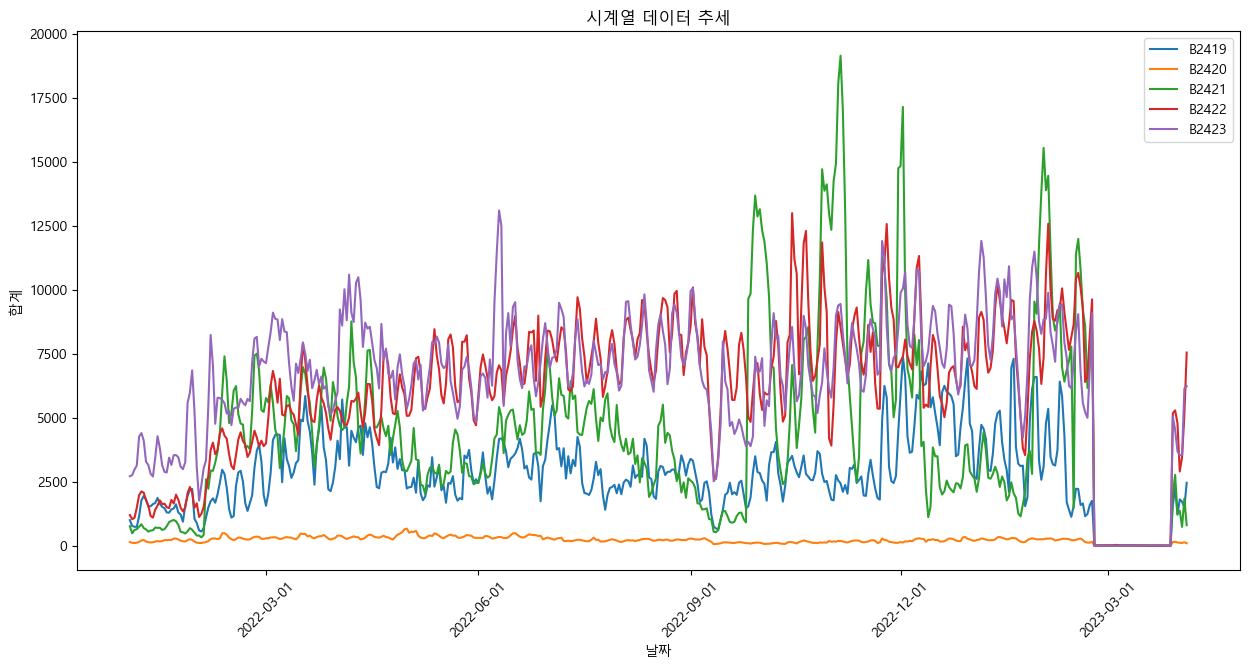

In [26]:
# 데이터프레임 리스트 생성
dataframes_B4 = [B2419, B2420, B2421, B2422, B2423]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B226.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B2419', 'B2420', 'B2421', 'B2422', 'B2423']

for idx, df in enumerate(dataframes_B4):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

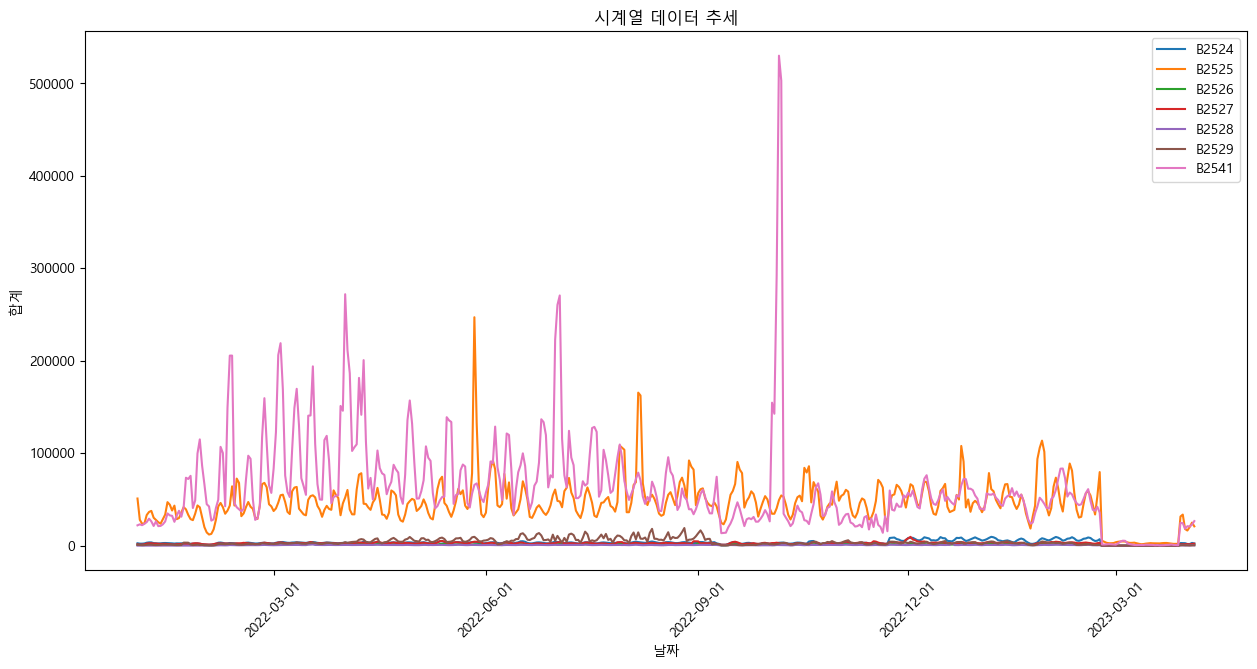

In [27]:
# 데이터프레임 리스트 생성
dataframes_B5 = [B2524, B2525, B2526, B2527, B2528, B2529,B2541]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B226.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B2524', 'B2525', 'B2526', 'B2527', 'B2528', 'B2529','B2541']

for idx, df in enumerate(dataframes_B5):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

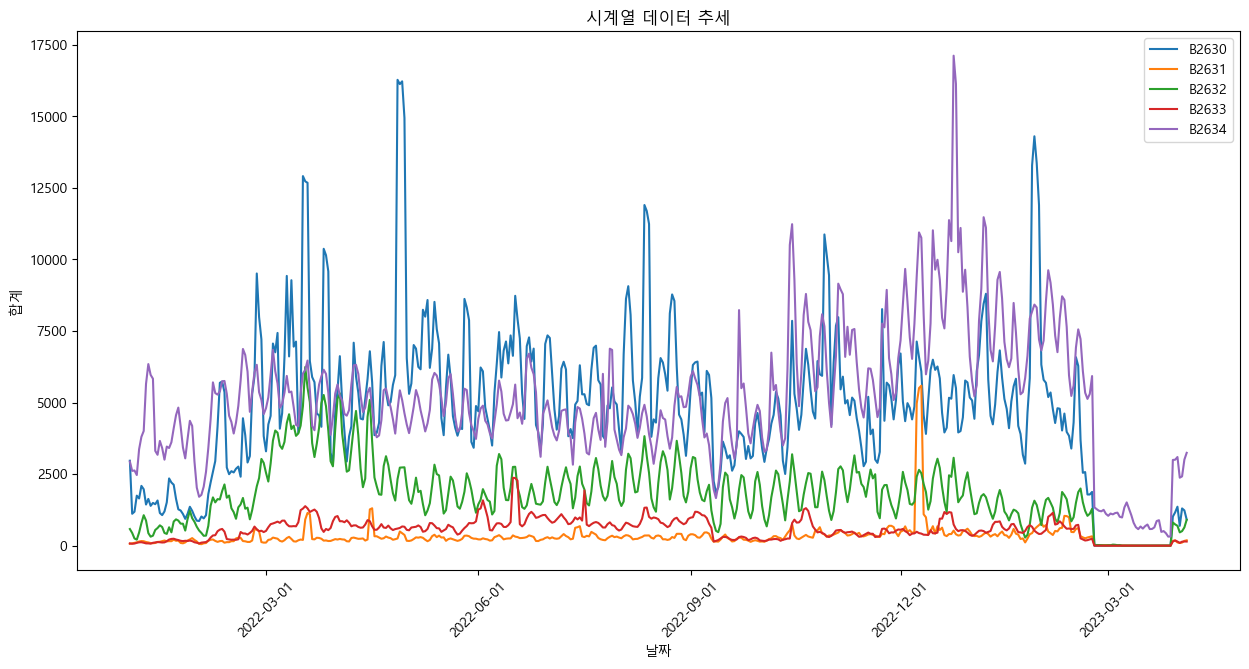

In [28]:
# 데이터프레임 리스트 생성
dataframes_B6 = [B2630, B2631, B2632, B2633, B2634]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B226.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels =['B2630', 'B2631', 'B2632', 'B2633', 'B2634']

for idx, df in enumerate(dataframes_B6):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

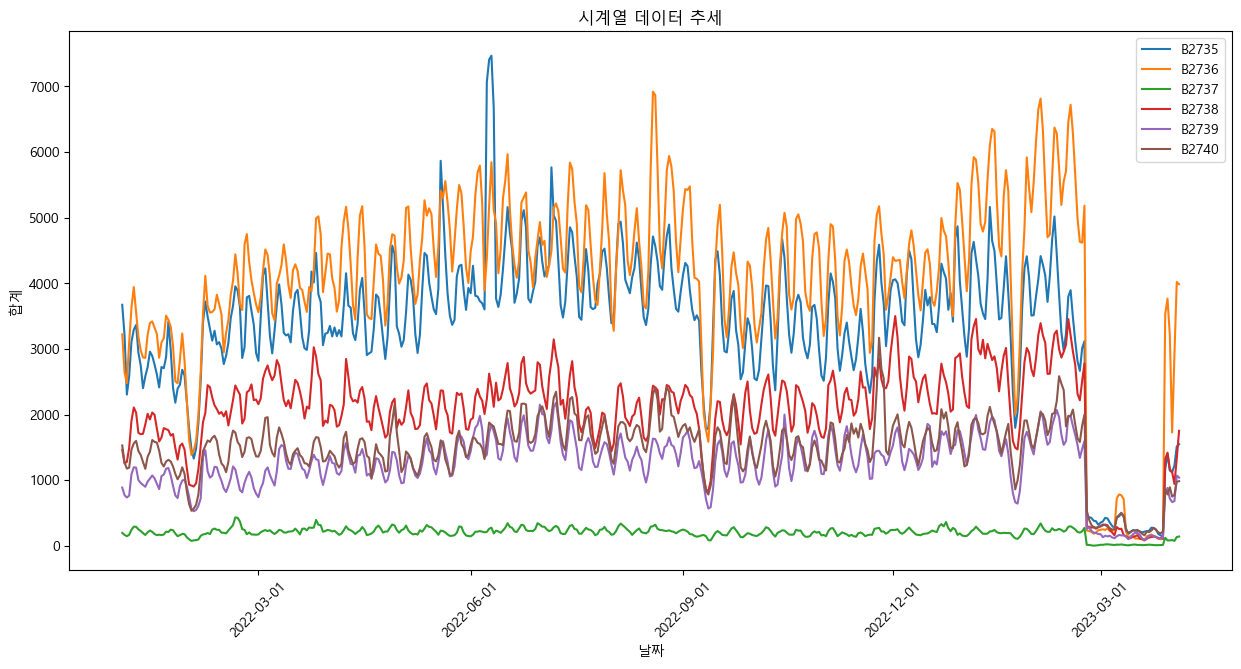

In [29]:
# 데이터프레임 리스트 생성
dataframes_B7 = [B2735, B2736, B2737, B2738, B2739, B2740]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B226.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B2735', 'B2736', 'B2737', 'B2738', 'B2739', 'B2740']

for idx, df in enumerate(dataframes_B7):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

In [30]:
B111

ID                제품             대분류             중분류  \
30        30.0  B002-00008-00001  B002-C001-0001  B002-C002-0001   
75        75.0  B002-00035-00001  B002-C001-0001  B002-C002-0001   
77        77.0  B002-00037-00001  B002-C001-0001  B002-C002-0001   
84        84.0  B002-00043-00001  B002-C001-0001  B002-C002-0001   
85        85.0  B002-00043-00002  B002-C001-0001  B002-C002-0001   
...        ...               ...             ...             ...   
15766  15766.0  B002-03777-00003  B002-C001-0001  B002-C002-0001   
15805  15805.0  B002-03790-00001  B002-C001-0001  B002-C002-0001   
15829  15829.0  B002-03796-00011  B002-C001-0001  B002-C002-0001   
15830  15830.0  B002-03796-00012  B002-C001-0001  B002-C002-0001   
751        NaN               NaN             NaN             NaN   

                  소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
30     B002-C003-0001  B002-00008         0.0         0.0         3.0   
75     B002-C003-0001  B002-00035         0.0         0.0         0.0   
77     B002-C003-0001  B002-00037         0.0         0.0         0.0   
84     B002-C003-0001  B002-00043         0.0         0.0         0.0   
85     B002-C003-0001  B002-00043         0.0         0.0         0.0   
...               ...         ...         ...         ...         ...   
15766  B002-C003-0001  B002-03777         0.0         0.0         0.0   
15805  B002-C003-0001  B002-03790         0.0         2.0         0.0   
15829  B002-C003-0001  B002-03796         0.0         0.0         0.0   
15830  B002-C003-0001  B002-03796         0.0         0.0         0.0   
751               NaN         NaN      7139.0      6480.0      6410.0   

       2022-01-04  ...  2023-03-26  2023-03-27  2023-03-28  2023-03-29  \
30            4.0  ...         0.0         0.0         0.0         0.0   
75            0.0  ...         0.0         0.0         0.0         0.0   
77            0.0  ...         0.0         0.0         0.0         3.0   
84            0.0  ...         0.0         0.0         0.0         0.0   
85            0.0  ...         0.0         0.0         1.0         1.0   
...           ...  ...         ...         ...         ...         ...   
15766         0.0  ...         0.0         0.0         0.0         0.0   
15805         1.0  ...         0.0         0.0         0.0         0.0   
15829         0.0  ...         0.0         0.0         0.0         0.0   
15830         0.0  ...         0.0         0.0         0.0         0.0   
751        7237.0  ...       382.0       393.0       357.0      7895.0   

       2023-03-30  2023-03-31  2023-04-01  2023-04-02  2023-04-03  2023-04-04  
30            0.0         1.0         2.0         2.0         2.0         0.0  
75            0.0         0.0         0.0         0.0         0.0         0.0  
77            0.0         0.0         4.0         0.0        10.0         4.0  
84            0.0         0.0         0.0         0.0         0.0         0.0  
85            1.0         1.0         1.0         2.0         1.0         1.0  
...           ...         ...         ...         ...         ...         ...  
15766         0.0         0.0         0.0         0.0         0.0         0.0  
15805         1.0         1.0         0.0         0.0         1.0         3.0  
15829         0.0         0.0         0.0         0.0         0.0         0.0  
15830         0.0         0.0         0.0         0.0         0.0         0.0  
751        7158.0      7115.0      6222.0      5615.0      7389.0      8965.0  

[752 rows x 465 columns]

In [31]:
B111.dtypes

ID            float64
제품             object
대분류            object
중분류            object
소분류            object
               ...   
2023-03-31    float64
2023-04-01    float64
2023-04-02    float64
2023-04-03    float64
2023-04-04    float64
Length: 465, dtype: object

In [32]:
dataframes_B2 = [B226, B227, B228, B229, B2210, B2211]   # 실제 데이터프레임 객체로 변경

df_names = ["B226", "B227", "B228", "B229", "B2210", "B2211"]    # 데이터프레임 이름 리스트

zero_columns = {}

for idx, df in enumerate(dataframes_B2):
    last_row_zero_columns = df.columns[df.iloc[-1] == 0].tolist()
    zero_columns[df_names[idx]] = last_row_zero_columns

print(zero_columns)


{'B226': ['2023-03-03', '2023-03-04', '2023-03-05', '2023-03-16', '2023-03-17', '2023-03-26', '2023-03-27', '2023-03-28'], 'B227': ['2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19', '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26', '2023-03-27', '2023-03-28'], 'B228': [], 'B229': ['2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17', '2023-03-18', '2023-03-19', '2023-03-20', '2023-

In [36]:
B111

ID                제품             대분류             중분류  \
30        30.0  B002-00008-00001  B002-C001-0001  B002-C002-0001   
75        75.0  B002-00035-00001  B002-C001-0001  B002-C002-0001   
77        77.0  B002-00037-00001  B002-C001-0001  B002-C002-0001   
84        84.0  B002-00043-00001  B002-C001-0001  B002-C002-0001   
85        85.0  B002-00043-00002  B002-C001-0001  B002-C002-0001   
...        ...               ...             ...             ...   
15766  15766.0  B002-03777-00003  B002-C001-0001  B002-C002-0001   
15805  15805.0  B002-03790-00001  B002-C001-0001  B002-C002-0001   
15829  15829.0  B002-03796-00011  B002-C001-0001  B002-C002-0001   
15830  15830.0  B002-03796-00012  B002-C001-0001  B002-C002-0001   
751        NaN               NaN             NaN             NaN   

                  소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
30     B002-C003-0001  B002-00008         0.0         0.0         3.0   
75     B002-C003-0001  B002-00035         0.0         0.0         0.0   
77     B002-C003-0001  B002-00037         0.0         0.0         0.0   
84     B002-C003-0001  B002-00043         0.0         0.0         0.0   
85     B002-C003-0001  B002-00043         0.0         0.0         0.0   
...               ...         ...         ...         ...         ...   
15766  B002-C003-0001  B002-03777         0.0         0.0         0.0   
15805  B002-C003-0001  B002-03790         0.0         2.0         0.0   
15829  B002-C003-0001  B002-03796         0.0         0.0         0.0   
15830  B002-C003-0001  B002-03796         0.0         0.0         0.0   
751               NaN         NaN      7139.0      6480.0      6410.0   

       2022-01-04  ...  2023-03-26  2023-03-27  2023-03-28  2023-03-29  \
30            4.0  ...         0.0         0.0         0.0         0.0   
75            0.0  ...         0.0         0.0         0.0         0.0   
77            0.0  ...         0.0         0.0         0.0         3.0   
84            0.0  ...         0.0         0.0         0.0         0.0   
85            0.0  ...         0.0         0.0         1.0         1.0   
...           ...  ...         ...         ...         ...         ...   
15766         0.0  ...         0.0         0.0         0.0         0.0   
15805         1.0  ...         0.0         0.0         0.0         0.0   
15829         0.0  ...         0.0         0.0         0.0         0.0   
15830         0.0  ...         0.0         0.0         0.0         0.0   
751        7237.0  ...       382.0       393.0       357.0      7895.0   

       2023-03-30  2023-03-31  2023-04-01  2023-04-02  2023-04-03  2023-04-04  
30            0.0         1.0         2.0         2.0         2.0         0.0  
75            0.0         0.0         0.0         0.0         0.0         0.0  
77            0.0         0.0         4.0         0.0        10.0         4.0  
84            0.0         0.0         0.0         0.0         0.0         0.0  
85            1.0         1.0         1.0         2.0         1.0         1.0  
...           ...         ...         ...         ...         ...         ...  
15766         0.0         0.0         0.0         0.0         0.0         0.0  
15805         1.0         1.0         0.0         0.0         1.0         3.0  
15829         0.0         0.0         0.0         0.0         0.0         0.0  
15830         0.0         0.0         0.0         0.0         0.0         0.0  
751        7158.0      7115.0      6222.0      5615.0      7389.0      8965.0  

[752 rows x 465 columns]

중분류끼리 묶어서 소분류당 그 날짜의 합의 추세를 보니까 각 판매량이 저조한 소분류를 제외한 나머지들의 추세가 비슷하였습니다. 
또한 2023년 2월말부터 3월초까지 데이터 수집 오류인지 결측일인지 진짜로 외부문제가 있어서 판매량이 0인지 상세히 알아보기 위해 메타 데이터를 사용했습니다.

# konlpy

In [33]:
product_info

제품                                               제품특성
0      B002-03509-00001  제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1      B002-02376-00001                                        700mg x 28정
2      B002-03735-00001  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3      B002-03735-00003  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4      B002-02769-00001  HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...
...                 ...                                                ...
12773  B002-01994-00001  형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...
12774  B002-02600-00002  헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...
12775  B002-02372-00095                   사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개
12776  B002-01318-00002  피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...
12777  B002-02473-00064  최소연령:4개월 단계별:2단계 종류:일반분유 제품형태:분말 포장형태:캔 용량:800...

[12778 rows x 2 columns]

아까 만들었던 B111,B112 등 53개의 데이터프레임과 product_info 데이터프레임을 묶었습니다,.

In [34]:
merged_data = product_info.merge(B111, on='제품', how='inner')
m111=pd.DataFrame(merged_data)
m111

제품                                               제품특성  \
0    B002-03509-00001  제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...   
1    B002-02376-00001                                        700mg x 28정   
2    B002-03735-00001  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...   
3    B002-03735-00003  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...   
4    B002-02769-00001  HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...   
..                ...                                                ...   
458  B002-02352-00002  HCA영양소 원료명(식약처고시)1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주...   
459  B002-00861-00010  제품유형:일반식품 영양소 원료명(식약처고시)_A종류:비타민C 분자량:어류 섭취대상:...   
460  B002-01513-00001  제품유형:일반식품 종류:어류 섭취대상:성인남녀 제품타입:정 제품용량:4개월분 섭취횟...   
461  B002-03642-00001  주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원...   
462  B002-01856-00006  주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원...   

          ID             대분류             중분류             소분류         브랜드  \
0    14794.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-03509   
1    10226.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-02376   
2    15601.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-03735   
3    15603.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-03735   
4    11725.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-02769   
..       ...             ...             ...             ...         ...   
458   9982.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-02352   
459   3720.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-00861   
460   5968.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-01513   
461  15271.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-03642   
462   7579.0  B002-C001-0001  B002-C002-0001  B002-C003-0001  B002-01856   

     2022-01-01  2022-01-02  2022-01-03  ...  2023-03-26  2023-03-27  \
0          10.0        14.0        10.0  ...         0.0         0.0   
1           0.0         0.0         0.0  ...         0.0         0.0   
2          69.0        50.0        48.0  ...        18.0        21.0   
3           0.0         0.0         0.0  ...         0.0         0.0   
4           0.0         0.0         0.0  ...         0.0         2.0   
..          ...         ...         ...  ...         ...         ...   
458         0.0         0.0         0.0  ...         0.0         0.0   
459         0.0         0.0         0.0  ...         0.0         0.0   
460         0.0         0.0         0.0  ...         0.0         0.0   
461         0.0         0.0         0.0  ...         0.0         0.0   
462         0.0         0.0         0.0  ...         0.0         0.0   

     2023-03-28  2023-03-29  2023-03-30  2023-03-31  2023-04-01  2023-04-02  \
0           0.0         1.0         0.0         1.0         0.0         7.0   
1           0.0        10.0        15.0         3.0         5.0        10.0   
2          15.0         6.0        72.0        52.0        60.0        35.0   
3           0.0         0.0         0.0         0.0         0.0         0.0   
4           1.0         9.0        17.0        17.0         2.0         3.0   
..          ...         ...         ...         ...         ...         ...   
458         0.0         0.0         0.0         0.0         0.0         0.0   
459         0.0         0.0         0.0         0.0         0.0         0.0   
460         0.0         0.0         0.0         0.0         0.0         0.0   
461         0.0         0.0         0.0         0.0         0.0         0.0   
462         0.0         0.0         0.0         0.0         0.0         0.0   

     2023-04-03  2023-04-04  
0           1.0         7.0  
1          17.0        15.0  
2          56.0        61.0  
3           0.0         0.0  
4           5.0         8.0  
..          ...         ...  
458         0.0         0.0  
459         0.0         0.0  
460         0.0         0.0  
461         0.0         0.0  
462         0.0         0.0  

[463 rows x 466 co

In [35]:
for idx, row in m111.iterrows():
    print(f"제품: {row['제품']}")
    feature_morphs = okt.morphs(row['제품특성'])
    print(f"{row['제품특성']} -> {feature_morphs}")

제품: B002-03509-00001
제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:3개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 2g x 30포 -> ['제품', '유형', ':', '일반', '식품', '콜라겐', '펩타이드', ':', '1000', 'mg', '종류', ':', '어류', '분자량', ':', '300', 'Da', '섭취', '대상', ':', '성인', '남녀', '제품', '타입', ':', '분말', '제품', '용량', ':', '3', '개월', '분', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '포', '섭취', '방법', ':', '바로', '음용', ':', '1', '개', '2', 'g', 'x', '30', '포']
제품: B002-02376-00001
 700mg x 28정 -> ['700', 'mg', 'x', '28', '정']
제품: B002-03735-00001
제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 카테킨:400mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1

HCA:1000mg 영양소 원료명(식약처고시):해당 없음 1일 총 섭취량:2정 제품용량:56일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):나이아신 1일 총 섭취량:4정 제품용량:28일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 주요 기능성(식약처인증):체지방 감소 :1개, HCA:750mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):판토텐산 1일 총 섭취량:2포 제품용량:15일분 제품타입:분말 섭취횟수:하루 두 번 섭취방법:물에 섞어서 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, HCA:750mg 1일 총 섭취량:2포 섭취횟수:하루 한 번 섭취방법:물에 섞어서 주요 기능성(식약처인증):체지방 감소 :1개, HCA:750mg 섭취횟수:하루 한 번 섭취방법:물에 섞어서 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, HCA:750mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):비오틴 1일 총 섭취량:2정 제품용량:2개월분 제품타입:정 섭취횟수:하루 한 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 1000 112정 -> ['HCA', ':', '1000', 'mg', '영양소', '원료', '명', '(', '식약처', '고시', '):', '해당', '없음', '1일', '총', '섭취', '량', ':', '2', '정', '제품', '용량', ':', '56일', '분', '제품', '타입', ':', '정', '섭취', '횟수', ':', '하루', '두', '번', '섭취', '방법', ':', '물', '과', '

제품타입:액상 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1개 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:액상 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1개 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:액상 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1개 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):식이섬유 :1개, 제품타입:액상 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1개 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:액상 섭취방법:물에 섞어서 섭취대상:성인남녀 :1개, 제품유형:일반식품 콜라겐 펩타이드:3300mg 종류:어류 분자량:1000 섭취대상:성인남녀 제품타입:액상 제품용량:1개월분 섭취횟수:하루 한 번 1일 총 섭취량:1개 섭취방법:바로 음용 :1개, 제품유형:건강기능식품 주요 기능성(식약처인증):피부건강 영양소 원료명(식약처고시):비오틴 영양소 원료명(식약처고시):셀레늄(셀렌) 콜라겐 펩타이드:1000mg 종류:어류 분자량:285.3 섭취대상:성인남녀 제품타입:액상 제품용량:28일분 섭취횟수:하루 한 번 1일 총 섭취량:1개 섭취방법:바로 음용 :1개, 제품유형:건강기능식품 주요 기능성(식약처인증):피부건강 영양소 원료명(식약처고시):비오틴 영양소 원료명(식약처고시):단백질 콜라겐 펩타이드:1.86mg 종류:식물성 섭취대상:성인남녀 제품타입:액상 제품용량:28일분 섭취횟수:하루 한 번 1일 총 섭취량:1개 섭취방법:바로 음용 :1개, 제품유형:건강기능식품 주요 기능성(식약처인증):피부건강 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):비오틴 콜라겐 펩타이드:36mg 종류:어류 섭취대상:성인남녀 제품타입:액상 제품용량:28일분 섭취횟수:하루 한 번 1일 총 섭취량:1개 섭취방법:바로 음용 :1개, 제품유형:건강기능

영양소 원료명(식약처고시)_A제품타입:식이섬유 섭취방법:분말 섭취대상:물과 함께 섭취횟수:성인남녀 1일 총 섭취량:하루 한 번 제품용량:1포 :1개월분, 주요 기능성(식약처인증):장건강 영양소 원료명(식약처고시):식이섬유 제품타입:분말 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1포 제품용량:1개월분 식이섬유:4g :2개 6g x 30포 -> ['영양소', '원료', '명', '(', '식약처', '고시', ')_', 'A', '제품', '타입', ':', '식이섬유', '섭취', '방법', ':', '분말', '섭취', '대상', ':', '물', '과', '함께', '섭취', '횟수', ':', '성인', '남녀', '1일', '총', '섭취', '량', ':', '하루', '한', '번', '제품', '용량', ':', '1', '포', ':', '1', '개월', '분', ',', '주요', '기능', '성', '(', '식약처', '인증', '):', '장', '건강', '영양소', '원료', '명', '(', '식약처', '고시', '):', '식이섬유', '제품', '타입', ':', '분말', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '포', '제품', '용량', ':', '1', '개월', '분', '식이섬유', ':', '4', 'g', ':', '2', '개', '6', 'g', 'x', '30', '포']
제품: B002-01866-00001
제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분 제품유형:일반식품 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:2개월분, 제품타입:정 섭취방법:물과 함께 섭취

주요 기능성(식약처인증):체지방 감소, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 푸닉산+후코잔틴:176.7mg :1개, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):해당 없음 푸닉산+후코잔틴:177mg :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)푸닉산+후코잔틴:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)푸닉산+후코잔틴:캡슐, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)푸닉산+후코잔틴:캡슐, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:2캡슐 제품용량:28일분 주요 기능성(식약처인증):체지방 감소 푸닉산+후코잔틴:177mg :1개, 식품품질인증제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)푸닉산+후코잔틴:GMP우수건강기능식품제조기준, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:2캡슐 제품용량:15일분 주요 기능성(식약처인증):체지방 감소 푸닉산+후코잔틴:177mg :1개, 제품타입_A제품용량_A주요 기능성(식약처인증)_A:캡슐, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:3개월분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):해당 없음 푸닉산+후코잔틴:177mg :1개, 제품타입:캡슐 섭취방법:물과 함께 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량푸닉산+후코잔

제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량:분말, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):분말, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):분말, 섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):물과 함께, 섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):물과 함께 28포 -> ['제품', '타입', '섭취', '방법', '섭취', '대상', '섭취', '횟수', '1일', '총', '섭취', '량', '제품', '용량', ':', '분말', ',', '제품', '타입', '섭취', '방법', '섭취', '대상', '섭취', '횟수', '1일', '총', '섭취', '량', '제품', '용량', '주요', '기능', '성', '(', '식약처', '인증', ')', '영양소', '원료', '명', '(', '식약처', '고시', ')', '영양소', '원료', '명', '(', '식약처', '고시', ')', '영양소', '

제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:6개월분 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:2개월분 :1개 855mg x 180베지캡슐 -> ['제품', '타입', ':', '캡슐', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '캡슐', '제품', '용량', ':', '6', '개월', '분', '주요', '기능', '성', '(', '식약처', '인증', '):', '체지방', '감소', ':', '1', '개', ',', '제품', '타입', ':', '캡슐', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '캡슐', '제품', '용량', ':', '2', '개월', '분', ':', '1', '개', '855', 'mg', 'x', '180', '베지', '캡슐']
제품: B002-03318-00001
제품유형:일반식품 섭취대상:성인남녀 제품타입:구미/젤리 제품용량:1개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:씹어서 :1개 20g x 15개입 -> ['제품', '유형', ':', '일반', '식품', '섭취', '대상', ':', '성인', '남녀', '제품', '타입', ':', '구미', '/', '젤리', '제품', '용량', ':', '1', '개월', '분', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '포', '섭취', '방법

종류_A단백질종류:게이너 단백질성분:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질:분리대두단백질(ISP) 섭취대상:78g 맛:성인남녀 섭취방법:쿠키 섭취횟수:물에 섞어서 제품용량:하루 두 번 :개인별 다름, 종류:게이너 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:83g 섭취대상:성인남녀 맛:초코 섭취방법:물에 섞어서 섭취횟수:하루 두 번 :1개, 종류:게이너 단백질종류:식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:86g 섭취대상:성인남녀 맛:딸기 섭취방법:물에 섞어서 섭취횟수:하루 두 번 :1개, 종류:게이너 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:67.3g 섭취대상:성인남녀 맛_A섭취방법:초코 섭취횟수:물에 섞어서 제품용량:하루 두 번 :개인별 다름, 종류:게이너 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:76g 섭취대상:성인남녀 섭취방법:물에 섞어서 섭취횟수:하루 두 번 제품용량:개인별 다름 :1개  -> ['종류', '_', 'A', '단백질', '종류', ':', '게이', '너', '단백질', '성분', ':', '동물성', '+', '식물성', '단백질', '성분', ':', '농축', '유청', '단백질', '(', 'WPC', ')', '단백질', '성분', ':', '분리', '유청', '단백질', '(', 'WPI', ')', '단백질', '성분', ':', '가수분해', 

제품타입:정 섭취방법:물과 함께 섭취횟수:하루 두 번 1일 총 섭취량:8정 주요 기능성(식약처인증)_A영양소 원료명(식약처고시)_A:장건강, 주요 기능성(식약처인증):장건강 영양소 원료명(식약처고시):식이섬유 제품타입:분말 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:수시로 1일 총 섭취량:2포 제품용량:14일분 식이섬유:105g :1개 224정 -> ['제품', '타입', ':', '정', '섭취', '방법', ':', '물', '과', '함께', '섭취', '횟수', ':', '하루', '두', '번', '1일', '총', '섭취', '량', ':', '8', '정', '주요', '기능', '성', '(', '식약처', '인증', ')_', 'A', '영양소', '원료', '명', '(', '식약처', '고시', ')_', 'A', ':', '장', '건강', ',', '주요', '기능', '성', '(', '식약처', '인증', '):', '장', '건강', '영양소', '원료', '명', '(', '식약처', '고시', '):', '식이섬유', '제품', '타입', ':', '분말', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '수시로', '1일', '총', '섭취', '량', ':', '2', '포', '제품', '용량', ':', '14일', '분', '식이섬유', ':', '105', 'g', ':', '1', '개', '224', '정']
제품: B002-00089-00003
제품타입:캡슐 섭취횟수:하루 세 번 섭취방법:물과 함께 :1개 336캡슐 -> ['제품', '타입', ':', '캡슐', '섭취', '횟수', ':', '하루', '세', '번', '섭취', '방법', ':', '물', '과', '함께', ':', '1', '개', '336', '캡슐']
제품: B002-03305-00001
제품유형:일반식품 영양소 원료명(식약처고시)_A콜라

HCA:780mg 1일 총 섭취량:2포 제품용량:15일분 제품타입:분말 섭취횟수:하루 두 번 섭취방법:물에 섞어서 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, HCA:750mg 1일 총 섭취량:2포 제품용량:50일분 제품타입:분말 섭취횟수:하루 두 번 섭취방법:물에 섞어서 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 30포 -> ['HCA', ':', '780', 'mg', '1일', '총', '섭취', '량', ':', '2', '포', '제품', '용량', ':', '15일', '분', '제품', '타입', ':', '분말', '섭취', '횟수', ':', '하루', '두', '번', '섭취', '방법', ':', '물', '에', '섞어서', '섭취', '대상', ':', '성인', '남녀', '주요', '기능', '성', '(', '식약처', '인증', '):', '체지방', '감소', ':', '1', '개', ',', 'HCA', ':', '750', 'mg', '1일', '총', '섭취', '량', ':', '2', '포', '제품', '용량', ':', '50일', '분', '제품', '타입', ':', '분말', '섭취', '횟수', ':', '하루', '두', '번', '섭취', '방법', ':', '물', '에', '섞어서', '섭취', '대상', ':', '성인', '남녀', '주요', '기능', '성', '(', '식약처', '인증', '):', '체지방', '감소', ':', '1', '개', '30', '포']
제품: B002-00190-00003
제품유형:일반식품 종류:어류 섭취대상:성인남녀 제품타입:구미/젤리 제품용량:14일분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :3개, 제품유형:일반식품 종류:어류 섭취대상:성인남녀 제품타입:구미/젤리 제품용량:1개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:씹어서 :1개 15g x 14포 -> ['제품', '유형', '

제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 푸닉산+후코잔틴:177mg :1개 30캡슐 -> ['제품', '타입', ':', '캡슐', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '캡슐', '제품', '용량', ':', '1', '개월', '분', '주요', '기능', '성', '(', '식약처', '인증', '):', '체지방', '감소', '푸', '닉산', '+', '후코', '잔틴', ':', '177', 'mg', ':', '1', '개', '30', '캡슐']
제품: B002-01976-00043
제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:2캡슐 제품용량:1개월분 주요 기능성(식약처인증):피부건강 영양소 원료명(식약처고시):해당 없음 히알루론산:240mg :1개 900mg x 60캡슐 -> ['제품', '타입', ':', '캡슐', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '2', '캡슐', '제품', '용량', ':', '1', '개월', '분', '주요', '기능', '성', '(', '식약처', '인증', '):', '피부', '건강', '영양소', '원료', '명', '(', '식약처', '고시', '):', '해당', '없음', '히알루론산', ':', '240', 'mg', ':', '1', '개', '900', 'mg', 'x', '60', '캡슐']
제품: B002-03624-00012
제품타입:액상 섭취방법:바로 음용 섭취대상:

종류:웨이 단백질종류:동물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질:25g 섭취대상:성인남녀 맛:초코 섭취방법:물에 섞어서 1일 총 섭취량:1스푼 :1개, 종류:웨이 단백질:24g 섭취대상:성인남녀 맛:초코 섭취방법:물에 섞어서 1일 총 섭취량:1스푼 섭취횟수:하루 한 번, 종류:웨이 단백질종류:동물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질:25g 섭취대상:성인남녀 맛:바닐라 섭취방법:물에 섞어서 1일 총 섭취량:1스푼 :1개, 단백질:25g 섭취대상:성인남녀 맛:초코 섭취방법:물에 섞어서 1일 총 섭취량:1스푼 섭취횟수:하루 한 번 :1개, 종류:웨이 단백질:25g 섭취대상:성인남녀 맛:쿠키 섭취방법:물에 섞어서 1일 총 섭취량:1스푼 섭취횟수:하루 한 번 :1개, 종류_A단백질:웨이 섭취대상:24g 맛:성인남녀 섭취방법:초코 1일 총 섭취량:물에 섞어서 제품용량:1스푼 :70일분, 종류:웨이 단백질종류:동물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질:25g 섭취대상:성인남녀 맛:쿠키 섭취방법:물에 섞어서 1일 총 섭취량:1스푼 섭취횟수:하루 한 번 제품용량:70일분 :1개 2.72kg -> ['종류', ':', '웨이', '단백질', '종류', ':', '동물성', '단백질', '성분', ':', '농축', '유청', '단백질', '(', 'WPC', ')', '단백질', '성분', ':', '분리', '유청', '단백질', '(', 'WPI', ')', '단백질', ':', '25', 'g', '섭취', '대상', ':', '성인', '남녀', '맛', ':', '초코', '섭취', '방법', ':', '물', '에', '섞어서', '1일', '총', '섭취', '량', ':', '1', '스푼', ':', '1', '개', ',', '종류', ':', '웨이', '단백질', ':', '24', 'g', '섭취', '대상', ':', '성인', '남녀

단백질종류:식물성 단백질:8g 맛:초코 섭취방법:물에 섞어서 :1개, 섭취대상:성인남녀 맛_A1일 총 섭취량:곡물 섭취횟수:1스푼 제품용량:하루 한 번 :1개월분, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리대두단백질(ISP) 단백질:8g 섭취대상:성인남녀 맛:딸기 섭취방법:물에 섞어서 제품용량:개인별 다름 :2개, 종류:웨이 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리대두단백질(ISP) 단백질:19g 섭취대상:성인남녀 맛:초코 섭취방법:물에 섞어서 1일 총 섭취량:1포 섭취횟수:하루 한 번 제품용량:20일분 :1개, 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):엽산 영양소 원료명(식약처고시):칼슘 영양소 원료명(식약처고시):마그네슘 영양소 원료명(식약처고시):철 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):단백질 단백질종류:식물성 단백질:8g 섭취대상:성인남녀 맛:초코 섭취방법:물에 섞어서 1일 총 섭취량:1포 섭취횟수:하루 한 번 제품용량:개인별 다름 :1개, 영양소 원료명(식약처고시):단백질 단백질종류:동물성 단백질성분:카제인 단백질:24g 섭취대상:성인남녀 맛:초코 섭취방법:물에 섞어서 1일 총 섭취량:1스푼 섭취횟수:하루 한 번 :1개, 종류_A단백질성분:웨이 단백질:분리유청단백질(WPI) 섭취대상:31g 맛_A섭취방법:성인남녀 1일 총 섭취량:초코 섭취횟수:물에 섞어서 :1스푼, 단백질성분:분리대두단백질(ISP) 단백질:8g 섭취대상:성인남녀 맛:초코 1일 총 섭취량:1포 섭취횟수:하루 한 번 제품용량:14일분 :1개, 섭취대상:성인남녀 맛_A섭취방법:초코 1일 총 섭취량:물에 섞어서 섭취횟수:2스푼 제품

단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:11g 섭취대상:성인남녀 맛:쿠키 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 종류:웨이 단백질종류:동물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질:13g 섭취대상:성인남녀 맛:쿠키 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 제품용량:20일분 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:11.5g 섭취대상:성인남녀 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:12g 섭취대상:성인남녀 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:11g 섭취대상:성인남녀 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:12g 섭취대상:성인남녀 맛:커피 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분

섭취대상:성인남녀 섭취방법:바로 음용 1일 총 섭취량:1포 섭취횟수:하루 한 번 제품용량:1개월분 :1개 2g x 30포 -> ['섭취', '대상', ':', '성인', '남녀', '섭취', '방법', ':', '바로', '음용', '1일', '총', '섭취', '량', ':', '1', '포', '섭취', '횟수', ':', '하루', '한', '번', '제품', '용량', ':', '1', '개월', '분', ':', '1', '개', '2', 'g', 'x', '30', '포']
제품: B002-00766-00037
섭취대상:성인남녀 섭취방법:물과 함께 1일 총 섭취량:2정 제품용량:1개월분 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:100일분 :1개 100정 -> ['섭취', '대상', ':', '성인', '남녀', '섭취', '방법', ':', '물', '과', '함께', '1일', '총', '섭취', '량', ':', '2', '정', '제품', '용량', ':', '1', '개월', '분', ':', '1', '개', ',', '제품', '타입', ':', '정', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '정', '제품', '용량', ':', '100일', '분', ':', '1', '개', '100', '정']
제품: B002-00479-00001
제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:2정 제품용량:28일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민C 카테킨:300mg :1개, 식품품질인증식품품질인증:이력추적관리, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소

주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):식이섬유 섭취방법:물과 함께 섭취대상:성인남녀 1일 총 섭취량:2포 식이섬유:5.5g :1개, 주요 기능성(식약처인증):해당 없음 영양소 원료명(식약처고시):해당 없음 종류_A섭취대상:크레아틴 섭취방법:성인남녀 1일 총 섭취량:물에 섞어서 섭취횟수:1스푼 제품용량:하루 한 번 :100일분, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:분리대두단백질(ISP) 단백질성분:산양유단백질 단백질:25g 섭취대상:성인남녀 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 제품용량:7일분 :1개, 제품유형:건강기능식품 주요 기능성(식약처인증):피부건강 콜라겐 펩타이드:2.7141mg 종류:어류 분자량:512Da 섭취대상:성인남녀 제품타입:분말 섭취횟수:하루 한 번 1일 총 섭취량:2포 섭취방법:바로 음용 :1개, 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):단백질 종류:아르기닌 단백질:5.5g 섭취대상:성인남녀 섭취방법:바로 음용 섭취횟수:하루 한 번 제품용량:15일분 :1개, 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):단백질 종류:아르기닌 단백질:8g 섭취대상:성인남녀 섭취방법:바로 음용 섭취횟수:하루 한 번 제품용량:15일분 :1개, 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):엽산 종류_A단백질:아르기닌 섭취대상:11g 섭취방법:성인남녀 1일 총 섭취량:바로 음용 섭취횟수:1포 제품용량:하루 한 번 :15일분, 종류_A단백질성분:웨이 단백질:분리유청단백질(WPI) 섭취대상:31g 맛_A섭취방법:성인남녀 1일 총 섭취량:초코 섭취횟수:물에 섞어서 :1스푼, 주요 기능성(식약처인증):해당 없음 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민B6 영

주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)콜라겐 펩타이드섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:피부건강, 제품유형종류섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:일반식품, 제품유형종류섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:일반식품, 섭취대상제품타입섭취횟수1일 총 섭취량섭취방법:성인남녀, 제품유형종류섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:일반식품, 주요 기능성(식약처인증)영양소 원료명(식약처고시)콜라겐 펩타이드섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:해당 없음, 콜라겐 펩타이드섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:1500mg, 제품유형:일반식품 섭취대상:성인남녀 제품타입:액상 제품용량:10일분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개, 제품유형:일반식품 섭취대상:성인남녀 제품타입:구미/젤리 제품용량:1개월분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:씹어서 :1개, 제품유형섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:일반식품, 제품유형:일반식품 종류:어류 분자량:600Da 섭취대상:성인남녀 제품타입:구미/젤리 제품용량:14일분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:씹어서 :1개, 제품유형:일반식품 종류:어류 분자량:1000Da 섭취대상:성인남녀 제품타입:구미/젤리 제품용량:7일분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:씹어서 :1개, 주요 기능성(식약처인증)섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:해당 없음, 주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)콜라겐 펩타이드섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:피부건강 20g x 30포 -> ['주요', '기능', '성',

주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)섭취대상제품타입섭취방법:피부건강, 주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)콜라겐 펩타이드섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:해당 없음, 제품유형주요 기능성(식약처인증)영양소 원료명(식약처고시)종류섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:일반식품, 제품유형:일반식품 종류_A섭취대상:어류 제품타입:성인남녀 섭취방법:분말 :물과 함께, 제품유형:일반식품 종류:어류 섭취대상:성인남녀 제품타입:분말 섭취횟수:하루 한 번 섭취방법:물에 섞어서 :1개, 제품유형:일반식품 섭취대상:성인남녀 제품타입:분말 섭취횟수:하루 한 번 1일 총 섭취량:1스푼 섭취방법:바로 음용 :1개, 주요 기능성(식약처인증)영양소 원료명(식약처고시)콜라겐 펩타이드섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:해당 없음, 주요 기능성(식약처인증):해당 없음 영양소 원료명(식약처고시):해당 없음 섭취대상:성인남녀 제품타입:분말 섭취횟수:하루 한 번 1일 총 섭취량:2스푼 섭취방법:물과 함께 :2개, 제품유형주요 기능성(식약처인증)영양소 원료명(식약처고시)콜라겐 펩타이드종류분자량섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:건강기능식품, 주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)콜라겐 펩타이드섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:피부건강, 주요 기능성(식약처인증)섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:관절/뼈건강, 주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)섭취대상제품타입제품용량섭취횟수1일 총 섭취량섭취방법:피부건강, 주요 기능성(식약처인증)영양소 원료명(식약처고시)섭취대상제품타입제품용량섭취횟수1일 총

In [36]:
brand_grouped = m111.groupby('브랜드')
for brand, group in brand_grouped:
    print(f"브랜드: {brand}")
    for idx, row in group.iterrows():
        feature_morphs = okt.morphs(row['제품특성'])
        print(f"{row['제품특성']} -> {feature_morphs}")

브랜드: B002-00008
주요 기능성(식약처인증):장건강 영양소 원료명(식약처고시):식이섬유 제품타입:구미/젤리 섭취방법:씹어서 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1포 제품용량:14일분 식이섬유:3g :1개 20g x 14포 -> ['주요', '기능', '성', '(', '식약처', '인증', '):', '장', '건강', '영양소', '원료', '명', '(', '식약처', '고시', '):', '식이섬유', '제품', '타입', ':', '구미', '/', '젤리', '섭취', '방법', ':', '씹어서', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '포', '제품', '용량', ':', '14일', '분', '식이섬유', ':', '3', 'g', ':', '1', '개', '20', 'g', 'x', '14', '포']
브랜드: B002-00035
주요소재(신발)부가기능발목높이:폴리에스테르, 상의종류소매기장부가기능부가기능부가기능부가기능기능성소재소재소재:재킷, 상의종류소매기장부가기능부가기능부가기능부가기능기능성소재소재소재:재킷, 지역정보관람연령:서울, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):캡슐, 사용부위피부타입사용시간사용시간주요제품특징주요제품특징주요제품특징세부제품특징세부제품특징세부제품특징세부제품특징세부제품특징용량:페이스용, 상의종류소매기장부가기능부가기능부가기능부가기능기능성소재소재소재:재킷 112캡슐 -> ['주요', '소재', '(', '신발', ')', '부가', '기능', '발목', '높이', ':', '폴리에스테르', ',', '상의', '종류', '소', '매', '기', '장부', '가', '기능', '부가', '기능', '부가', '기능', '부가', '기능기'

종류_A단백질종류:게이너 단백질성분:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질:분리대두단백질(ISP) 섭취대상:78g 맛:성인남녀 섭취방법:쿠키 섭취횟수:물에 섞어서 제품용량:하루 두 번 :개인별 다름, 종류:게이너 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:83g 섭취대상:성인남녀 맛:초코 섭취방법:물에 섞어서 섭취횟수:하루 두 번 :1개, 종류:게이너 단백질종류:식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:86g 섭취대상:성인남녀 맛:딸기 섭취방법:물에 섞어서 섭취횟수:하루 두 번 :1개, 종류:게이너 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:67.3g 섭취대상:성인남녀 맛_A섭취방법:초코 섭취횟수:물에 섞어서 제품용량:하루 두 번 :개인별 다름, 종류:게이너 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:76g 섭취대상:성인남녀 섭취방법:물에 섞어서 섭취횟수:하루 두 번 제품용량:개인별 다름 :1개  -> ['종류', '_', 'A', '단백질', '종류', ':', '게이', '너', '단백질', '성분', ':', '동물성', '+', '식물성', '단백질', '성분', ':', '농축', '유청', '단백질', '(', 'WPC', ')', '단백질', '성분', ':', '분리', '유청', '단백질', '(', 'WPI', ')', '단백질', '성분', ':', '가수분해', 

HCA:1500mg 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 영양소 원료명(식약처고시):해당 없음 1일 총 섭취량:4정 제품용량:21일분 제품타입:정 섭취횟수:하루 두 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개 900mg x 84정 -> ['HCA', ':', '1500', 'mg', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비타민', 'E', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비타민', 'B', '1', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비타민', 'B', '2', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비타민', 'B', '6', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비타민', 'C', '영양소', '원료', '명', '(', '식약처', '고시', '):', '나이아신', '영양소', '원료', '명', '(', '식약처', '고시', '):', '판토텐산', '영양소', '원료', '명', '(', '식약처', '고시', '):', '아연', '영양소', '원료', '명', '(', '식약처', '고시', '):', '셀레늄', '(', '셀렌', ')', '영양소', '원료', '명', '(', '식약처', '고시', '):', '해당', '없음', '1일', '총', '섭취', '량', ':', '4', '정', '제품', '용량', ':', '21일', '분', '제품', '타입', ':', '정', '섭취', '횟수', ':'

제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)히알루론산:캡슐, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:2캡슐 제품용량:1개월분 주요 기능성(식약처인증):피부건강 영양소 원료명(식약처고시):해당 없음 히알루론산:240mg :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)히알루론산:캡슐, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)히알루론산:캡슐, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)히알루론산:캡슐, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)히알루론산:캡슐, 제품타입섭취방법섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):정, 제품타입섭취방법제품용량주요 기능성(식약처인증):분말, 제품타입섭취방법섭취횟수1일 총 섭취량제품용량영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)히알루론산:캡슐, 제품타입섭취방법섭취대상섭취횟수제품용량제품유형:정, 식품품질인증제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시):HACCP, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)제품유형:정, 제품타입섭취방법섭취대상섭취횟수제품용량제품유형:정, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:1개월분 히알루론산:120mg :1개, 식품품질인증:HACCP 800mg x 60캡슐 -> ['제품', '타입', '섭취', '방법',

제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):정, 생균1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주요 기능성(식약처인증):1억 CFU, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)카테킨:정, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 제품유형_A:건강기능식품, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)카테킨:정, 생균1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주요 기능성(식약처인증):1억 CFU, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)제품유형:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 식품품질인증제품타입섭취방법섭취대상섭취횟

제품유형:일반식품 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):비오틴 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) 콜라겐 펩타이드:5000mg 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:액상 제품용량:14일분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:바로 음용 :1개 20g x 14포 -> ['제품', '유형', ':', '일반', '식품', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비타민', 'B', '2', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비타민', 'C', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비오틴', '영양소', '원료', '명', '(', '식약처', '고시', '):', '아연', '영양소', '원료', '명', '(', '식약처', '고시', '):', '셀레늄', '(', '셀렌', ')', '콜라겐', '펩타이드', ':', '5000', 'mg', '종류', ':', '어류', '분자량', ':', '300', 'Da', '섭취', '대상', ':', '성인', '남녀', '제품', '타입', ':', '액', '상', '제품', '용량', ':', '14일', '분', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '포', '섭취', '방법', ':', '바로', '음용', ':', '1', '개', '20', 'g', 'x', '14', '포']
브랜드: B002-01456
1일 총 섭취량:1포 제품용량:14일분 제품타입:분말 섭취횟수:하루 한 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):장건강 :1개 5.5g x 14포 -> ['1일', '총', '섭취', '량', ':', '1', '포', '제품', '용량', ':', 

제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)카테킨:캡슐, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:4개월분 주요 기능성(식약처인증):체지방 감소 카테킨:300mg :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시):캡슐, 영양소 원료명(식약처고시)1일 총 섭취량제품용량제품타입섭취횟수섭취방법주요 기능성(식약처인증):해당 없음, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)카테킨:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처

주요 기능성(식약처인증):체지방 감소, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 푸닉산+후코잔틴:176.7mg :1개, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):해당 없음 푸닉산+후코잔틴:177mg :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)푸닉산+후코잔틴:정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)푸닉산+후코잔틴:캡슐, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)푸닉산+후코잔틴:캡슐, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:2캡슐 제품용량:28일분 주요 기능성(식약처인증):체지방 감소 푸닉산+후코잔틴:177mg :1개, 식품품질인증제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)푸닉산+후코잔틴:GMP우수건강기능식품제조기준, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:2캡슐 제품용량:15일분 주요 기능성(식약처인증):체지방 감소 푸닉산+후코잔틴:177mg :1개, 제품타입_A제품용량_A주요 기능성(식약처인증)_A:캡슐, 제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:3개월분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):해당 없음 푸닉산+후코잔틴:177mg :1개, 제품타입:캡슐 섭취방법:물과 함께 섭취횟수:하루 한 번 1일 총 섭취량:1캡슐 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량푸닉산+후코잔

제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:2정 제품용량:1개월분 주요 기능성(식약처인증):영양보충 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비오틴 영양소 원료명(식약처고시):셀레늄(셀렌) 비오틴:600µg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1정 제품용량:1개월분 주요 기능성(식약처인증):영양보충 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비오틴 영양소 원료명(식약처고시):셀레늄(셀렌) 영양소 원료명(식약처고시):요오드 비오틴:600µg :1개 600mg x 60정 -> ['제품', '타입', ':', '정', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '두', '번', '1일', '총', '섭취', '량', ':', '2', '정', '제품', '용량', ':', '1', '개월', '분', '주요', '기능', '성', '(', '식약처', '인증', '):', '영양', '보충', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비타민', 'B', '12', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비오틴', '영양소', '원료', '명', '(', '식약처', '고시', '):', '셀레늄', '(', '셀렌', ')', '비오틴', ':', '600', 'µ', 'g', ':', '1', '개', ',', '제품', '타입', ':', '정', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '한', '번', '1일', '총', '섭취', '량', ':', '1', '정', '제품', '용량', ':', '1', '개월', '

HCA:1100mg 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):판토텐산 영양소 원료명(식약처고시):엽산 영양소 원료명(식약처고시):비오틴 영양소 원료명(식약처고시):철 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):구리 영양소 원료명(식약처고시):셀레늄(셀렌) 영양소 원료명(식약처고시):요오드 영양소 원료명(식약처고시):망간 영양소 원료명(식약처고시):몰리브덴 1일 총 섭취량:3정 제품용량:1개월분 제품타입:정 섭취횟수:하루 세 번 섭취방법:물과 함께 섭취대상:성인남녀 주요 기능성(식약처인증):체지방 감소 :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:2정 제품용량:1개월분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민E 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):아연 영양소 원료명(식약처고시):셀레늄(셀렌) :1개, 영양소 원료명(식약처고시)_A영양소 원료명(식약처고시)_A영양소 원료명(식약처고시)_A:비타민D, 주요 기능성(식약처인증):체지방 감소 :1개, HCA:1100mg 영양소 원료명(식약처고시):비타민A 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B2 영양소 원료명(식약처고시):비타민B6 영양소 원료명(식약처고시):비타

단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:11g 섭취대상:성인남녀 맛:쿠키 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 종류:웨이 단백질종류:동물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질:13g 섭취대상:성인남녀 맛:쿠키 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 제품용량:20일분 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:11.5g 섭취대상:성인남녀 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:12g 섭취대상:성인남녀 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:11g 섭취대상:성인남녀 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분:분리대두단백질(ISP) 단백질:12g 섭취대상:성인남녀 맛:커피 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 :1개, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:가수분해유청단백질(WPH) 단백질성분

제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:2캡슐 제품용량:3개월분 주요 기능성(식약처인증):체지방 감소 공액리놀레산:800mg :1개 180캡슐 -> ['제품', '타입', ':', '캡슐', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '두', '번', '1일', '총', '섭취', '량', ':', '2', '캡슐', '제품', '용량', ':', '3', '개월', '분', '주요', '기능', '성', '(', '식약처', '인증', '):', '체지방', '감소', '공액', '리놀레산', ':', '800', 'mg', ':', '1', '개', '180', '캡슐']
제품유형:건강기능식품 제품타입:액상 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 제품용량:10일분 주요 기능성(식약처인증):체지방 감소 :1개 1000ml -> ['제품', '유형', ':', '건강', '기능', '식품', '제품', '타입', ':', '액', '상', '섭취', '방법', ':', '물', '과', '함께', '섭취', '대상', ':', '성인', '남녀', '섭취', '횟수', ':', '하루', '한', '번', '제품', '용량', ':', '10일', '분', '주요', '기능', '성', '(', '식약처', '인증', '):', '체지방', '감소', ':', '1', '개', '1000', 'ml']
제품유형:일반식품 영양소 원료명(식약처고시)_A종류:비타민C 분자량:어류 섭취대상:2000Da 제품타입:성인남녀 제품용량:정 섭취횟수:10일분 1일 총 섭취량:하루 두 번 섭취방법:2정 :물에 섞어서 4300mg x 20정 -> ['제품', '유형', ':', '일반', '식품', '영양소', '원료', '명', '(', '식약처', '고시', ')_', 'A', '종류', ':', '

주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):식이섬유 섭취방법:물과 함께 섭취대상:성인남녀 1일 총 섭취량:2포 식이섬유:5.5g :1개, 주요 기능성(식약처인증):해당 없음 영양소 원료명(식약처고시):해당 없음 종류_A섭취대상:크레아틴 섭취방법:성인남녀 1일 총 섭취량:물에 섞어서 섭취횟수:1스푼 제품용량:하루 한 번 :100일분, 단백질종류:동물성+식물성 단백질성분:농축유청단백질(WPC) 단백질성분:분리유청단백질(WPI) 단백질성분:분리대두단백질(ISP) 단백질성분:산양유단백질 단백질:25g 섭취대상:성인남녀 섭취방법:물에 섞어서 1일 총 섭취량:2스푼 섭취횟수:하루 한 번 제품용량:7일분 :1개, 제품유형:건강기능식품 주요 기능성(식약처인증):피부건강 콜라겐 펩타이드:2.7141mg 종류:어류 분자량:512Da 섭취대상:성인남녀 제품타입:분말 섭취횟수:하루 한 번 1일 총 섭취량:2포 섭취방법:바로 음용 :1개, 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):단백질 종류:아르기닌 단백질:5.5g 섭취대상:성인남녀 섭취방법:바로 음용 섭취횟수:하루 한 번 제품용량:15일분 :1개, 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):단백질 종류:아르기닌 단백질:8g 섭취대상:성인남녀 섭취방법:바로 음용 섭취횟수:하루 한 번 제품용량:15일분 :1개, 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):비타민B12 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):나이아신 영양소 원료명(식약처고시):엽산 종류_A단백질:아르기닌 섭취대상:11g 섭취방법:성인남녀 1일 총 섭취량:바로 음용 섭취횟수:1포 제품용량:하루 한 번 :15일분, 종류_A단백질성분:웨이 단백질:분리유청단백질(WPI) 섭취대상:31g 맛_A섭취방법:성인남녀 1일 총 섭취량:초코 섭취횟수:물에 섞어서 :1스푼, 주요 기능성(식약처인증):해당 없음 영양소 원료명(식약처고시):비타민D 영양소 원료명(식약처고시):비타민B6 영

제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량:분말, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):정, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):분말, 제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):분말, 섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):물과 함께, 섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):물과 함께 28포 -> ['제품', '타입', '섭취', '방법', '섭취', '대상', '섭취', '횟수', '1일', '총', '섭취', '량', '제품', '용량', ':', '분말', ',', '제품', '타입', '섭취', '방법', '섭취', '대상', '섭취', '횟수', '1일', '총', '섭취', '량', '제품', '용량', '주요', '기능', '성', '(', '식약처', '인증', ')', '영양소', '원료', '명', '(', '식약처', '고시', ')', '영양소', '원료', '명', '(', '식약처', '고시', ')', '영양소', '

제품유형:건강기능식품 주요 기능성(식약처인증):피부건강 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):비오틴 콜라겐 펩타이드:2.7141mg 종류:어류 분자량:512Da 섭취대상:성인남녀 제품타입:분말 제품용량:15일분 섭취횟수:하루 두 번 1일 총 섭취량:2포 섭취방법:물과 함께 :1개 2.5g x 30포 -> ['제품', '유형', ':', '건강', '기능', '식품', '주요', '기능', '성', '(', '식약처', '인증', '):', '피부', '건강', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비타민', 'C', '영양소', '원료', '명', '(', '식약처', '고시', '):', '비오틴', '콜라겐', '펩타이드', ':', '2.7141', 'mg', '종류', ':', '어류', '분자량', ':', '512', 'Da', '섭취', '대상', ':', '성인', '남녀', '제품', '타입', ':', '분말', '제품', '용량', ':', '15일', '분', '섭취', '횟수', ':', '하루', '두', '번', '1일', '총', '섭취', '량', ':', '2', '포', '섭취', '방법', ':', '물', '과', '함께', ':', '1', '개', '2.5', 'g', 'x', '30', '포']
제품유형:일반식품 영양소 원료명(식약처고시):비타민C 영양소 원료명(식약처고시):비오틴 종류:어류 분자량:300Da 섭취대상:성인남녀 제품타입:분말 제품용량:15일분 섭취횟수:하루 한 번 1일 총 섭취량:1포 섭취방법:물과 함께 :1개, 제품유형:일반식품 영양소 원료명(식약처고시)_A영양소 원료명(식약처고시)_A종류:비타민C 분자량:비오틴 섭취대상:어류 제품타입:300Da 제품용량:성인남녀 섭취횟수:분말 1일 총 섭취량:1개월분 섭취방법:하루 한 번 :1포 2g x 30포 -> ['제품', '유형', ':', '일반', '식품', '영양소', '원료', '명', 

제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원료명(식약처고시):정, 건전지식:AAA건전지x2 기능:LED 기능:갈바닉이온 기능:탄력개선 기능:화장품흡수율증진 기능:수분공급 기능:영양공급 진동:미세진동 사용부위:얼굴 사용부위:바디 전원방식:건전지식 형태:핸디형 품목:갈바닉마사지기, 매수특징특징특징특징특징사용횟수주요형태:30~50개, 제품타입:분말 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1포 제품용량:1개월분 주요 기능성(식약처인증):피부건강 영양소 원료명(식약처고시):비타민C 히알루론산:120mg :1개, 제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:4정 제품용량:14일분 주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):해당 없음 :1개, 사용부위:페이스용 피부타입:모든피부용 사용시간:밤 주요제품특징:촉촉함(수분공급) 주요제품특징:트러블케어 세부제품특징:저자극 세부제품특징:유수분밸런스조절 세부제품특징:각질케어 용량:15ml(g) :1개, 잠금방식디테일:후크형, 피부타입사용시간사용시간주요제품특징주요제품특징세부제품특징세부제품특징세부제품특징세부제품특징세부제품특징세부제품특징세부제품특징용량:모든피부용, 제품타입:분말 섭취방법:바로 음용 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭취량:1포 제품용량:2개월분 영양소 원료명(식약처고시):비타민C 히알루론산:120mg :1개, HCA영양소 원료명(식약처고시)1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주요 기능성(식약처인증):0mg, 급여대상:전연령 급여대상:퍼피 급여대상:어덜트 급여대상:시니어 급여대상:대형견 형태:분말 기능:영양공급 보장균수:40억 특징:휴먼그레이드, 세부제품특징:향 세부제품특징:냄새케어 세부제품특징:촉촉함 구성:본품 타입:겔/젤형 용기형태:주사기형 용량:1.5ml(g) :6개, 사용부위:아이용 사용부위:넥 사용부위:팔자주름 주요제품특징:

In [38]:
for idx, row in m111.iterrows():
    print(f"제품: {row['제품']}")
    feature_nouns = okt.nouns(row['제품특성'])
    #print(f"{row['제품특성']} -> {feature_nouns}")

    # 각 제품별 상위 3개 단어와 개수 출력
    word_count = Counter(feature_nouns)
    top3_words = word_count.most_common(3)
    print("Top 3 단어 및 개수:")
    for word, count in top3_words:
        print(f"{word} : {count}")
    print()

제품: B002-03509-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

제품: B002-02376-00001
Top 3 단어 및 개수:
정 : 1

제품: B002-03735-00001
Top 3 단어 및 개수:
식약처 : 16
영양소 : 13
원료 : 13

제품: B002-03735-00003
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-02769-00001
Top 3 단어 및 개수:
식약처 : 4
섭취 : 4
영양소 : 3

제품: B002-02769-00002
Top 3 단어 및 개수:
섭취 : 11
제품 : 8
타입 : 3

제품: B002-03432-00001
Top 3 단어 및 개수:
섭취 : 4
포 : 2
방법 : 1

제품: B002-01075-00001
Top 3 단어 및 개수:
식약처 : 86
섭취 : 76
영양소 : 69

제품: B002-02925-00001
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-00771-00001
Top 3 단어 및 개수:
식약처 : 9
섭취 : 8
영양소 : 7

제품: B002-02059-00001
Top 3 단어 및 개수:
제품 : 4
섭취 : 4
식약처 : 2

제품: B002-02059-00002
Top 3 단어 및 개수:
섭취 : 3
정 : 3
영양소 : 1

제품: B002-01113-00001
Top 3 단어 및 개수:
식약처 : 5
영양소 : 4
원료 : 4

제품: B002-01113-00002
Top 3 단어 및 개수:
식약처 : 9
섭취 : 8
영양소 : 7

제품: B002-00245-00003
Top 3 단어 및 개수:
식약처 : 12
영양소 : 10
원료 : 10

제품: B002-00245-00005
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
식약처 : 3

제품: B002-00245-00010
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B00

Top 3 단어 및 개수:
식약처 : 44
섭취 : 42
영양소 : 34

제품: B002-01730-00001
Top 3 단어 및 개수:
식약처 : 8
영양소 : 7
원료 : 7

제품: B002-00282-00001
Top 3 단어 및 개수:
용량 : 5
열량 : 4

제품: B002-03057-00001
Top 3 단어 및 개수:
정 : 3
섭취 : 3
식약처 : 3

제품: B002-01876-00001
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-02275-00003
Top 3 단어 및 개수:
단백질 : 6
성분 : 2
섭취 : 2

제품: B002-03231-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
유형 : 1

제품: B002-01720-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

제품: B002-01496-00001
Top 3 단어 및 개수:
영양소 : 1
원료 : 1
식약처 : 1

제품: B002-02269-00001
Top 3 단어 및 개수:
섭취 : 2
대상 : 1
성인 : 1

제품: B002-02269-00002
Top 3 단어 및 개수:
섭취 : 3
대상 : 2
성인 : 2

제품: B002-02028-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 2
포 : 2

제품: B002-03567-00001
Top 3 단어 및 개수:
섭취 : 4
단백질 : 2
포 : 2

제품: B002-02252-00001
Top 3 단어 및 개수:
섭취 : 8
캡슐 : 5
제품 : 4

제품: B002-03318-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
유형 : 1

제품: B002-01069-00001
Top 3 단어 및 개수:
개 : 2
단백질 : 1
총 : 1

제품: B002-00356-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
건강 : 2

제품: B002-02891-00001
Top 3 단어 및 개수:


Top 3 단어 및 개수:
섭취 : 89
제품 : 59
식약처 : 45

제품: B002-01976-00041
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-01976-00043
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-03624-00012
Top 3 단어 및 개수:
섭취 : 7
개 : 3
제품 : 2

제품: B002-01723-00009
Top 3 단어 및 개수:
식약처 : 84
섭취 : 73
영양소 : 67

제품: B002-00824-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

제품: B002-01678-00016
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-01220-00068
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
식약처 : 3

제품: B002-00070-00009
Top 3 단어 및 개수:
단백질 : 6
섭취 : 4
성분 : 2

제품: B002-01739-00015
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
유형 : 1

제품: B002-00043-00011
Top 3 단어 및 개수:
식약처 : 43
섭취 : 35
영양소 : 35

제품: B002-02138-00011
Top 3 단어 및 개수:
식약처 : 6
영양소 : 5
원료 : 5

제품: B002-00374-00003
Top 3 단어 및 개수:
용량 : 1
열량 : 1

제품: B002-02239-00009
Top 3 단어 및 개수:
섭취 : 8
식약처 : 6
제품 : 5

제품: B002-02370-00043
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-00881-00007
Top 3 단어 및 개수:
식약처 : 5
영양소 : 4
원료 : 4

제품: B002-01303-00006
Top 3 단어 및 개수:
섭취 : 4
식약처 : 4
정 : 3

제품: B002-03547-00004
Top

Top 3 단어 및 개수:
섭취 : 8
제품 : 4
식약처 : 4

제품: B002-00782-00008
Top 3 단어 및 개수:
섭취 : 37
식약처 : 28
제품 : 19

제품: B002-01216-00002
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
식약처 : 3

제품: B002-02778-00002
Top 3 단어 및 개수:
섭취 : 7
제품 : 4
종류 : 2

제품: B002-01156-00042
Top 3 단어 및 개수:
제품 : 1
용량 : 1
개월 : 1

제품: B002-03735-00008
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-02403-00004
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-02925-00009
Top 3 단어 및 개수:
식약처 : 6
영양소 : 5
원료 : 5

제품: B002-03725-00049
Top 3 단어 및 개수:
단백질 : 4
종류 : 1
동물성 : 1

제품: B002-00247-00001
Top 3 단어 및 개수:
섭취 : 8
식약처 : 5
제품 : 4

제품: B002-02370-00076
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-03241-00004
Top 3 단어 및 개수:
섭취 : 4
식약처 : 2
식이섬유 : 2

제품: B002-02583-00002
Top 3 단어 및 개수:
단백질 : 6
성분 : 2
종류 : 1

제품: B002-02356-00005
Top 3 단어 및 개수:
섭취 : 56
제품 : 35
식약처 : 16

제품: B002-01517-00002
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

제품: B002-02352-00002
Top 3 단어 및 개수:
섭취 : 38
식약처 : 29
제품 : 22

제품: B002-00861-00010
Top 3 단어 및 개수:
섭취 : 78
제품 : 54
정 : 25

제품: B002-01513

In [39]:

brand_grouped = m111.groupby('브랜드')

for brand, group in brand_grouped:
    print(f"브랜드: {brand}")
    
    brand_nouns = []
    
    for idx, row in group.iterrows():
        feature_nouns = okt.nouns(row['제품특성'])
        brand_nouns.extend(feature_nouns)
    
    # 각 브랜드별 상위 3개 단어와 개수 출력
    word_count = Counter(brand_nouns)
    top3_words = word_count.most_common(3)
    print("Top 3 단어 및 개수:")
    for word, count in top3_words:
        print(f"{word} : {count}")
    print()

브랜드: B002-00008
Top 3 단어 및 개수:
섭취 : 4
식약처 : 2
식이섬유 : 2

브랜드: B002-00035
Top 3 단어 및 개수:
기능 : 11
소재 : 10
부가 : 10

브랜드: B002-00043
Top 3 단어 및 개수:
식약처 : 44
섭취 : 39
영양소 : 35

브랜드: B002-00059
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 3

브랜드: B002-00070
Top 3 단어 및 개수:
단백질 : 6
섭취 : 4
성분 : 2

브랜드: B002-00085
Top 3 단어 및 개수:
섭취 : 4
정 : 3
식약처 : 3

브랜드: B002-00089
Top 3 단어 및 개수:
섭취 : 9
제품 : 4
식약처 : 4

브랜드: B002-00092
Top 3 단어 및 개수:
섭취 : 8
제품 : 6
식약처 : 3

브랜드: B002-00158
Top 3 단어 및 개수:
섭취 : 4
제품 : 1
타입 : 1

브랜드: B002-00190
Top 3 단어 및 개수:
섭취 : 12
제품 : 8
식약처 : 7

브랜드: B002-00196
Top 3 단어 및 개수:
영양소 : 5
원료 : 5
식약처 : 5

브랜드: B002-00210
Top 3 단어 및 개수:
섭취 : 9
정 : 8
제품 : 6

브랜드: B002-00245
Top 3 단어 및 개수:
식약처 : 16
섭취 : 16
영양소 : 13

브랜드: B002-00247
Top 3 단어 및 개수:
섭취 : 8
식약처 : 5
제품 : 4

브랜드: B002-00258
Top 3 단어 및 개수:
섭취 : 55
단백질 : 27
대상 : 15

브랜드: B002-00271
Top 3 단어 및 개수:
단백질 : 59
섭취 : 47
성분 : 20

브랜드: B002-00282
Top 3 단어 및 개수:
용량 : 5
열량 : 4

브랜드: B002-00326
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

브랜드: B002-00328
Top 3 단어

Top 3 단어 및 개수:
섭취 : 113
식약처 : 77
제품 : 70

브랜드: B002-02376
Top 3 단어 및 개수:
정 : 4
섭취 : 4
식약처 : 3

브랜드: B002-02397
Top 3 단어 및 개수:
섭취 : 4
제품 : 2
개 : 2

브랜드: B002-02403
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

브랜드: B002-02417
Top 3 단어 및 개수:
섭취 : 16
제품 : 12
포 : 5

브랜드: B002-02423
Top 3 단어 및 개수:
단백질 : 6
성분 : 2
분리 : 2

브랜드: B002-02424
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
정 : 3

브랜드: B002-02430
Top 3 단어 및 개수:
섭취 : 4
식약처 : 2
식이섬유 : 2

브랜드: B002-02431
Top 3 단어 및 개수:
캡슐 : 3
섭취 : 3
제품 : 2

브랜드: B002-02540
Top 3 단어 및 개수:
섭취 : 16
제품 : 12
포 : 5

브랜드: B002-02547
Top 3 단어 및 개수:
식약처 : 30
영양소 : 25
원료 : 25

브랜드: B002-02558
Top 3 단어 및 개수:
섭취 : 32
식약처 : 18
제품 : 17

브랜드: B002-02559
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
정 : 3

브랜드: B002-02563
Top 3 단어 및 개수:
섭취 : 44
제품 : 23
식약처 : 17

브랜드: B002-02570
Top 3 단어 및 개수:
섭취 : 4
제품 : 1
타입 : 1

브랜드: B002-02583
Top 3 단어 및 개수:
단백질 : 6
성분 : 2
종류 : 1

브랜드: B002-02593
Top 3 단어 및 개수:
섭취 : 101
식약처 : 64
영양소 : 48

브랜드: B002-02599
Top 3 단어 및 개수:
섭취 : 8
식약처 : 7
영양소 : 5

브랜드: B002-02614
Top 3 단어 및 개수:
영양

In [43]:
from collections import defaultdict

# 각 브랜드의 명사들을 누적하고 카운팅하기 위한 함수
def aggregate_brand_nouns(df):
    aggregated_nouns = defaultdict(int)
    
    for idx, row in df.iterrows():
        feature_nouns = okt.nouns(row['제품특성'])
        
        for noun in feature_nouns:
            aggregated_nouns[noun] += 1
    
    return aggregated_nouns

# 각 브랜드별 명사를 딕셔너리 형태로 누적
brand_noun_counts = {}
for idx, row in m111.iterrows():
    brand = row["브랜드"]
    
    if brand not in brand_noun_counts:
        brand_noun_counts[brand] = defaultdict(int)
    
    feature_nouns = okt.nouns(row['제품특성'])
    for noun in feature_nouns:
        brand_noun_counts[brand][noun] += 1

# 원래 브랜드 순서대로 결과 출력
for idx, row in m111.drop_duplicates(subset=['브랜드']).iterrows():
    brand = row["브랜드"]
    print(f"브랜드: {brand}")
    
    word_count = Counter(brand_noun_counts[brand])
    top3_words = word_count.most_common(3)
    print("Top 3 단어 및 개수:")
    for word, count in top3_words:
        print(f"{word} : {count}")
    print()

브랜드: B002-03509
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

브랜드: B002-02376
Top 3 단어 및 개수:
정 : 4
섭취 : 4
식약처 : 3

브랜드: B002-03735
Top 3 단어 및 개수:
섭취 : 24
식약처 : 18
영양소 : 14

브랜드: B002-02769
Top 3 단어 및 개수:
섭취 : 15
제품 : 10
식약처 : 6

브랜드: B002-03432
Top 3 단어 및 개수:
섭취 : 4
포 : 2
방법 : 1

브랜드: B002-01075
Top 3 단어 및 개수:
식약처 : 86
섭취 : 76
영양소 : 69

브랜드: B002-02925
Top 3 단어 및 개수:
섭취 : 12
식약처 : 10
영양소 : 7

브랜드: B002-00771
Top 3 단어 및 개수:
식약처 : 9
섭취 : 8
영양소 : 7

브랜드: B002-02059
Top 3 단어 및 개수:
섭취 : 7
제품 : 5
식약처 : 3

브랜드: B002-01113
Top 3 단어 및 개수:
식약처 : 22
영양소 : 18
원료 : 18

브랜드: B002-00245
Top 3 단어 및 개수:
식약처 : 16
섭취 : 16
영양소 : 13

브랜드: B002-01531
Top 3 단어 및 개수:
섭취 : 106
식약처 : 68
제품 : 63

브랜드: B002-01621
Top 3 단어 및 개수:
섭취 : 12
제품 : 8
개 : 5

브랜드: B002-03051
Top 3 단어 및 개수:
섭취 : 16
제품 : 10
식약처 : 6

브랜드: B002-03366
Top 3 단어 및 개수:
섭취 : 155
식약처 : 122
영양소 : 90

브랜드: B002-02753
Top 3 단어 및 개수:
섭취 : 7
제품 : 4
캡슐 : 3

브랜드: B002-00592
Top 3 단어 및 개수:
섭취 : 44
식약처 : 26
제품 : 22

브랜드: B002-03014
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2



모든 데이터프레임에 대해서 확인해보았습니다.

In [44]:
# B코드 목록
B_codes = [ 'B111','B112', 'B113', 'B115', 'B1951', 'B226', 'B227', 'B228', 'B229', 'B2210', 'B2211',
           'B2312', 'B2313', 'B2314', 'B2315', 'B2316', 'B2317', 'B2318', 'B2419', 'B2420', 'B2421',
           'B2422', 'B2423', 'B2524', 'B2525', 'B2526', 'B2527', 'B2528', 'B2529', 'B2541', 'B2630',
           'B2631', 'B2632', 'B2633', 'B2634', 'B2735', 'B2736', 'B2737', 'B2738', 'B2739', 'B2740',
           'B2945', 'B2946', 'B2948', 'B2949', 'B3842', 'B3843', 'B3844', 'B3050', 'B4947', 'B5152', 'B5153']

# 결과를 저장할 데이터 프레임 dict 생성
merged_data_frames = {}

for B_code in B_codes:
    # 데이터 프레임 병합 (product_info와 각 B코드에 해당하는 데이터)
    merged_data = product_info.merge(globals()[B_code], on='제품', how='inner')

    # 병합된 데이터 저장 (예: m111, m112, m113 등)
    merged_data_frames[f"m{B_code[1:]}"] = merged_data

# 예: m111, m112, m113 등을 출력해 보기
for key, value in merged_data_frames.items():
    print(f"{key}:")
    print(value)

m111:
                   제품                                               제품특성  \
0    B002-03509-00001  제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...   
1    B002-02376-00001                                        700mg x 28정   
2    B002-03735-00001  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...   
3    B002-03735-00003  제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...   
4    B002-02769-00001  HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...   
..                ...                                                ...   
458  B002-02352-00002  HCA영양소 원료명(식약처고시)1일 총 섭취량제품용량제품타입섭취횟수섭취방법섭취대상주...   
459  B002-00861-00010  제품유형:일반식품 영양소 원료명(식약처고시)_A종류:비타민C 분자량:어류 섭취대상:...   
460  B002-01513-00001  제품유형:일반식품 종류:어류 섭취대상:성인남녀 제품타입:정 제품용량:4개월분 섭취횟...   
461  B002-03642-00001  주요 기능성(식약처인증):체지방 감소 영양소 원료명(식약처고시):비타민A 영양소 원...   
462  B002-01856-00006  주요 기능성(식약처인증)영양소 원료명(식약처고시)영양소 원료명(식약처고시)영양소 원...   

          ID             대분류             중분류             소분류         브랜드  \
0    

                  제품                                               제품특성  \
0   B002-01523-00001  구성:본품 형태:액상형 :1개, 구성:본품 형태:젤형 :1개, 형태:액상형 구성:본...   
1   B002-00811-00011  구성:본품 형태:정제형 :1개, 구성:본품 형태:액상형 용량:750ml(g) :1개...   
2   B002-00811-00012                          구성:본품 형태:정제형 :1개 60g x 3입   
3   B002-00098-00001             구성:본품 형태:액상형 :1개, 구성:본품 형태:액상형 :1개 24개   
4   B002-01399-00002  구성:본품 형태:시트형, 구성:본품+리필 형태:시트형 :1개, 구성:본품+리필 형태...   
5   B002-01399-00003  구성:본품 형태:시트형, 구성:본품+리필 형태:시트형 :1개, 구성:본품+리필 형태...   
6   B002-01399-00006  구성:본품 형태:시트형, 구성:본품+리필 형태:시트형 :1개, 구성:본품+리필 형태...   
7   B002-00722-00008  구성:본품 형태:정제형 :1개, 구성:본품 형태:액상형 :1개, 구성:본품 형태:액...   
8   B002-00244-00008  구성:본품 형태:정제형 용량:400ml(g) :1개, 구성:본품+리필 형태:시트형 ...   
9   B002-00244-00009                           구성:본품+리필 형태:시트형 :1개 36개입   
10  B002-01950-00002                           구성:본품 형태:액상형 :1개 2L x 6개   
11  B002-03655-00003  구성:본품 형태:액상형 용량:755ml(g) :1개, 구성:본품 형태:액상형 :1개...   
12  B002-03655-00004     

                   제품                                               제품특성  \
0    B002-02446-00010  타입:탈모샴푸 타입:두피샴푸 제품형태:펌프형 주요제품특징:세정력 주요제품특징:풍부한...   
1    B002-02691-00010  제품형태:펌프형 주요제품특징:머릿결개선 세부제품특징:윤기부여 세부제품특징:모발영양 ...   
2    B002-00067-00012  헤어타입:모든 모발용 제품형태:펌프형 주요제품특징:머릿결개선 주요제품특징:향 세부제...   
3    B002-00067-00013  헤어타입:모든 모발용 주요제품특징:촉촉함(수분공급) 세부제품특징:윤기부여 세부제품특...   
4    B002-03108-00013  두피타입:모든두피용 모발타입:모든 모발용 타입:일반샴푸 제품형태:펌프형 주요제품특징...   
..                ...                                                ...   
144  B002-01769-00006  헤어타입:모든 모발용 제품형태:펌프형 주요제품특징:머릿결개선 주요제품특징:향 주요제...   
145  B002-00434-00158  헤어타입:모든 모발용 제품형태:펌프형 주요제품특징:머릿결개선 주요제품특징:향 주요제...   
146  B002-00500-00030                 헤어타입:모든 모발용 주요제품특징:머릿결개선 :1개 850ml   
147  B002-00110-00074                     제품형태:펌프형 세부제품특징:윤기부여 :1개 500ml   
148  B002-00110-00075  헤어타입:건성 제품형태:펌프형 주요제품특징:머릿결개선 세부제품특징:영양공급 세부제품...   

          ID             대분류             중분류             소분류         브랜드  \
0    10559.

In [45]:
# 각 데이터프레임에 대하여 수행하려는 작업을 함수로 정의
def process_dataframe(df):
    for idx, row in df.iterrows():
        print(f"제품: {row['제품']}")
        feature_nouns = okt.nouns(row['제품특성'])
        word_count = Counter(feature_nouns)
        top3_words = word_count.most_common(3)
        print("Top 3 단어 및 개수:")
        for word, count in top3_words:
            print(f"{word} : {count}")
        print()
    
    brand_noun_counts = {}
    for idx, row in df.iterrows():
        brand = row["브랜드"]
        if brand not in brand_noun_counts:
            brand_noun_counts[brand] = defaultdict(int)
        
        feature_nouns = okt.nouns(row['제품특성'])
        for noun in feature_nouns:
            brand_noun_counts[brand][noun] += 1

    for idx, row in df.drop_duplicates(subset=['브랜드']).iterrows():
        brand = row["브랜드"]
        print(f"브랜드: {brand}")

        word_count = Counter(brand_noun_counts[brand])
        top3_words = word_count.most_common(3)
        print("Top 3 단어 및 개수:")
        for word, count in top3_words:
            print(f"{word} : {count}")
        print()
        
for df_name, df in merged_data_frames.items():
    print(f"Processing {df_name}:")
    process_dataframe(df)

Processing m111:
제품: B002-03509-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

제품: B002-02376-00001
Top 3 단어 및 개수:
정 : 1

제품: B002-03735-00001
Top 3 단어 및 개수:
식약처 : 16
영양소 : 13
원료 : 13

제품: B002-03735-00003
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-02769-00001
Top 3 단어 및 개수:
식약처 : 4
섭취 : 4
영양소 : 3

제품: B002-02769-00002
Top 3 단어 및 개수:
섭취 : 11
제품 : 8
타입 : 3

제품: B002-03432-00001
Top 3 단어 및 개수:
섭취 : 4
포 : 2
방법 : 1

제품: B002-01075-00001
Top 3 단어 및 개수:
식약처 : 86
섭취 : 76
영양소 : 69

제품: B002-02925-00001
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-00771-00001
Top 3 단어 및 개수:
식약처 : 9
섭취 : 8
영양소 : 7

제품: B002-02059-00001
Top 3 단어 및 개수:
제품 : 4
섭취 : 4
식약처 : 2

제품: B002-02059-00002
Top 3 단어 및 개수:
섭취 : 3
정 : 3
영양소 : 1

제품: B002-01113-00001
Top 3 단어 및 개수:
식약처 : 5
영양소 : 4
원료 : 4

제품: B002-01113-00002
Top 3 단어 및 개수:
식약처 : 9
섭취 : 8
영양소 : 7

제품: B002-00245-00003
Top 3 단어 및 개수:
식약처 : 12
영양소 : 10
원료 : 10

제품: B002-00245-00005
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
식약처 : 3

제품: B002-00245-00010
Top 3 단어 및 개수:
섭취 : 4
정 : 

Top 3 단어 및 개수:
단백질 : 112
섭취 : 98
식약처 : 67

제품: B002-02063-00004
Top 3 단어 및 개수:
식약처 : 10
영양소 : 9
원료 : 9

제품: B002-03495-00001
Top 3 단어 및 개수:
주요 : 1
기능 : 1
식약처 : 1

제품: B002-00271-00001
Top 3 단어 및 개수:
단백질 : 50
성분 : 20
유청 : 15

제품: B002-02423-00001
Top 3 단어 및 개수:
단백질 : 6
성분 : 2
분리 : 2

제품: B002-00777-00001
Top 3 단어 및 개수:
단백질 : 4
맛 : 2
섭취 : 2

제품: B002-00777-00002
Top 3 단어 및 개수:
단백질 : 4
맛 : 2
섭취 : 2

제품: B002-03457-00001
Top 3 단어 및 개수:
섭취 : 2
제품 : 1
타입 : 1

제품: B002-02417-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
식약처 : 2

제품: B002-03790-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 2
영양소 : 1

제품: B002-00790-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
영양소 : 2

제품: B002-01252-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 1
타입 : 1

제품: B002-01773-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

제품: B002-02145-00001
Top 3 단어 및 개수:
섭취 : 8
제품 : 6
포 : 3

제품: B002-02145-00002
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
건강 : 2

제품: B002-02570-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 1
타입 : 1

제품: B002-00662-00002
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
구미 : 2

제품: B002-00662-0000

Top 3 단어 및 개수:
캡슐 : 2
제품 : 1
타입 : 1

제품: B002-00766-00024
Top 3 단어 및 개수:
섭취 : 4
식약처 : 3
정 : 3

제품: B002-02275-00005
Top 3 단어 및 개수:
단백질 : 6
성분 : 2
섭취 : 2

제품: B002-02063-00027
Top 3 단어 및 개수:
단백질 : 4
섭취 : 4
종류 : 2

제품: B002-02063-00028
Top 3 단어 및 개수:
영양소 : 4
원료 : 4
식약처 : 4

제품: B002-03464-00001
Top 3 단어 및 개수:
섭취 : 25
단백질 : 22
종류 : 9

제품: B002-00808-00008
Top 3 단어 및 개수:
식약처 : 4
섭취 : 4
영양소 : 3

제품: B002-00271-00006
Top 3 단어 및 개수:
섭취 : 32
종류 : 9
단백질 : 9

제품: B002-01457-00001
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-02417-00007
Top 3 단어 및 개수:
섭취 : 12
제품 : 9
유형 : 3

제품: B002-00035-00001
Top 3 단어 및 개수:
기능 : 11
소재 : 10
부가 : 10

제품: B002-02771-00001
Top 3 단어 및 개수:
단백질 : 199
섭취 : 146
성분 : 67

제품: B002-02593-00007
Top 3 단어 및 개수:
섭취 : 4
제품 : 2
건강 : 2

제품: B002-00837-00003
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
정 : 3

제품: B002-01455-00002
Top 3 단어 및 개수:
영양소 : 5
원료 : 5
식약처 : 5

제품: B002-03023-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
유형 : 1

제품: B002-03499-00003
Top 3 단어 및 개수:
식약처 : 8
영양소 : 7
원료 : 7

제품: B002-012

브랜드: B002-03509
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

브랜드: B002-02376
Top 3 단어 및 개수:
정 : 4
섭취 : 4
식약처 : 3

브랜드: B002-03735
Top 3 단어 및 개수:
섭취 : 24
식약처 : 18
영양소 : 14

브랜드: B002-02769
Top 3 단어 및 개수:
섭취 : 15
제품 : 10
식약처 : 6

브랜드: B002-03432
Top 3 단어 및 개수:
섭취 : 4
포 : 2
방법 : 1

브랜드: B002-01075
Top 3 단어 및 개수:
식약처 : 86
섭취 : 76
영양소 : 69

브랜드: B002-02925
Top 3 단어 및 개수:
섭취 : 12
식약처 : 10
영양소 : 7

브랜드: B002-00771
Top 3 단어 및 개수:
식약처 : 9
섭취 : 8
영양소 : 7

브랜드: B002-02059
Top 3 단어 및 개수:
섭취 : 7
제품 : 5
식약처 : 3

브랜드: B002-01113
Top 3 단어 및 개수:
식약처 : 22
영양소 : 18
원료 : 18

브랜드: B002-00245
Top 3 단어 및 개수:
식약처 : 16
섭취 : 16
영양소 : 13

브랜드: B002-01531
Top 3 단어 및 개수:
섭취 : 106
식약처 : 68
제품 : 63

브랜드: B002-01621
Top 3 단어 및 개수:
섭취 : 12
제품 : 8
개 : 5

브랜드: B002-03051
Top 3 단어 및 개수:
섭취 : 16
제품 : 10
식약처 : 6

브랜드: B002-03366
Top 3 단어 및 개수:
섭취 : 155
식약처 : 122
영양소 : 90

브랜드: B002-02753
Top 3 단어 및 개수:
섭취 : 7
제품 : 4
캡슐 : 3

브랜드: B002-00592
Top 3 단어 및 개수:
섭취 : 44
식약처 : 26
제품 : 22

브랜드: B002-03014
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2



Top 3 단어 및 개수:
영양소 : 33
식약처 : 31
원료 : 30

제품: B002-02829-00001
Top 3 단어 및 개수:
영양소 : 1
원료 : 1
식약처 : 1

제품: B002-00328-00003
Top 3 단어 및 개수:
섭취 : 4
식약처 : 4
정 : 3

제품: B002-00328-00004
Top 3 단어 및 개수:
섭취 : 8
식약처 : 6
정 : 5

제품: B002-02206-00001
Top 3 단어 및 개수:
식약처 : 30
영양소 : 30
원료 : 28

제품: B002-01783-00002
Top 3 단어 및 개수:
섭취 : 24
식약처 : 17
비타민 : 14

제품: B002-01783-00003
Top 3 단어 및 개수:
섭취 : 4
비타민 : 2
포 : 2

제품: B002-01783-00004
Top 3 단어 및 개수:
식약처 : 33
영양소 : 33
원료 : 31

제품: B002-01783-00005
Top 3 단어 및 개수:
영양소 : 33
식약처 : 33
원료 : 31

제품: B002-01783-00006
Top 3 단어 및 개수:
식약처 : 51
영양소 : 42
원료 : 42

제품: B002-03654-00001
Top 3 단어 및 개수:
식약처 : 12
영양소 : 12
원료 : 11

제품: B002-02605-00001
Top 3 단어 및 개수:
식약처 : 12
영양소 : 12
원료 : 11

제품: B002-01915-00008
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-01915-00009
Top 3 단어 및 개수:
식약처 : 9
영양소 : 9
원료 : 8

제품: B002-01915-00010
Top 3 단어 및 개수:
식약처 : 54
영양소 : 50
원료 : 48

제품: B002-01915-00011
Top 3 단어 및 개수:
영양소 : 2
원료 : 2
식약처 : 2

제품: B002-01915-00012
Top 3 단어 및 개수:
식약처 : 3

Top 3 단어 및 개수:
식약처 : 367
영양소 : 367
원료 : 350

제품: B002-00456-00002
Top 3 단어 및 개수:
영양소 : 359
식약처 : 358
원료 : 342

제품: B002-00456-00005
Top 3 단어 및 개수:
식약처 : 43
영양소 : 43
원료 : 41

제품: B002-00456-00006
Top 3 단어 및 개수:
식약처 : 66
영양소 : 66
원료 : 63

제품: B002-02577-00001
Top 3 단어 및 개수:
식약처 : 23
영양소 : 23
원료 : 22

제품: B002-03057-00002
Top 3 단어 및 개수:
식약처 : 34
영양소 : 33
원료 : 32

제품: B002-03057-00003
Top 3 단어 및 개수:
식약처 : 8
영양소 : 8
원료 : 7

제품: B002-03724-00001
Top 3 단어 및 개수:
식약처 : 5
영양소 : 4
원료 : 4

제품: B002-01279-00001
Top 3 단어 및 개수:
섭취 : 8
포 : 3
제품 : 3

제품: B002-00324-00002
Top 3 단어 및 개수:
식약처 : 12
영양소 : 12
원료 : 11

제품: B002-03631-00001
Top 3 단어 및 개수:
영양소 : 8
원료 : 8
식약처 : 8

제품: B002-03631-00002
Top 3 단어 및 개수:
영양소 : 11
원료 : 11
식약처 : 11

제품: B002-01720-00003
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
비타민 : 2

제품: B002-01357-00001
Top 3 단어 및 개수:
섭취 : 28
비타민 : 15
제품 : 14

제품: B002-01357-00003
Top 3 단어 및 개수:
섭취 : 12
비타민 : 6
제품 : 6

제품: B002-03084-00001
Top 3 단어 및 개수:
섭취 : 6
제품 : 4
식약처 : 4

제품: B002-02374-00001
Top 3 단어 및 개수

Top 3 단어 및 개수:
영양소 : 218
식약처 : 216
원료 : 208

제품: B002-01596-00018
Top 3 단어 및 개수:
영양소 : 72
식약처 : 71
원료 : 69

제품: B002-01596-00019
Top 3 단어 및 개수:
영양소 : 49
식약처 : 48
원료 : 47

제품: B002-01596-00020
Top 3 단어 및 개수:
식약처 : 92
영양소 : 92
원료 : 88

제품: B002-01596-00022
Top 3 단어 및 개수:
식약처 : 29
영양소 : 29
원료 : 27

제품: B002-01596-00023
Top 3 단어 및 개수:
영양소 : 11
원료 : 10
식약처 : 10

제품: B002-02729-00003
Top 3 단어 및 개수:
섭취 : 4
비타민 : 3
식약처 : 3

제품: B002-02188-00001
Top 3 단어 및 개수:
영양소 : 1
원료 : 1
식약처 : 1

제품: B002-00090-00001
Top 3 단어 및 개수:
식약처 : 10
영양소 : 9
원료 : 9

제품: B002-01616-00001
Top 3 단어 및 개수:
섭취 : 4
정 : 3
비타민 : 2

제품: B002-00264-00001
Top 3 단어 및 개수:
섭취 : 4
정 : 3
비타민 : 2

제품: B002-01188-00008
Top 3 단어 및 개수:
섭취 : 3
캡슐 : 3
식약처 : 2

제품: B002-01078-00007
Top 3 단어 및 개수:
식약처 : 20
영양소 : 20
비타민 : 20

제품: B002-01078-00008
Top 3 단어 및 개수:
식약처 : 20
영양소 : 20
비타민 : 20

제품: B002-03064-00001
Top 3 단어 및 개수:
식약처 : 5
영양소 : 4
원료 : 4

제품: B002-01747-00002
Top 3 단어 및 개수:
섭취 : 8
비타민 : 4
제품 : 4

제품: B002-01678-00012
Top 3 단어 및 개수:
섭

Top 3 단어 및 개수:
섭취 : 20
식약처 : 13
정 : 11

제품: B002-01595-00003
Top 3 단어 및 개수:
식약처 : 28
영양소 : 28
원료 : 26

제품: B002-00164-00018
Top 3 단어 및 개수:
식약처 : 22
영양소 : 22
원료 : 21

제품: B002-02951-00001
Top 3 단어 및 개수:
식약처 : 10
영양소 : 9
원료 : 9

제품: B002-00152-00003
Top 3 단어 및 개수:
식약처 : 14
영양소 : 14
원료 : 13

제품: B002-03636-00012
Top 3 단어 및 개수:
섭취 : 4
식약처 : 4
비타민 : 3

제품: B002-01783-00044
Top 3 단어 및 개수:
식약처 : 10
영양소 : 10
원료 : 9

제품: B002-01783-00045
Top 3 단어 및 개수:
식약처 : 13
영양소 : 11
원료 : 11

제품: B002-01279-00006
Top 3 단어 및 개수:
식약처 : 15
영양소 : 15
원료 : 14

제품: B002-00164-00020
Top 3 단어 및 개수:
식약처 : 51
영양소 : 51
원료 : 48

제품: B002-02370-00070
Top 3 단어 및 개수:
식약처 : 61
영양소 : 58
원료 : 55

제품: B002-02599-00014
Top 3 단어 및 개수:
비타민 : 11
식약처 : 8
영양소 : 8

제품: B002-02599-00015
Top 3 단어 및 개수:
식약처 : 12
영양소 : 12
원료 : 11

제품: B002-02909-00001
Top 3 단어 및 개수:
식약처 : 12
영양소 : 12
원료 : 11

제품: B002-00870-00002
Top 3 단어 및 개수:
식약처 : 24
영양소 : 23
원료 : 22

제품: B002-03194-00003
Top 3 단어 및 개수:
식약처 : 18
비타민 : 17
영양소 : 15

제품: B002-01556-00001


Top 3 단어 및 개수:
섭취 : 8
캡슐 : 5
제품 : 4

제품: B002-03427-00001
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-03427-00002
Top 3 단어 및 개수:
섭취 : 5
포 : 2
제품 : 2

제품: B002-03427-00004
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-03211-00001
Top 3 단어 및 개수:
식약처 : 7
영양소 : 6
원료 : 6

제품: B002-03211-00002
Top 3 단어 및 개수:
식약처 : 19
원료 : 17
섭취 : 16

제품: B002-01973-00002
Top 3 단어 및 개수:
섭취 : 24
식약처 : 16
캡슐 : 13

제품: B002-01973-00003
Top 3 단어 및 개수:
영양소 : 5
원료 : 5
식약처 : 5

제품: B002-00771-00002
Top 3 단어 및 개수:
섭취 : 8
제품 : 5
타입 : 2

제품: B002-03264-00001
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
식약처 : 2

제품: B002-02059-00005
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-02059-00007
Top 3 단어 및 개수:
섭취 : 8
식약처 : 6
제품 : 4

제품: B002-02059-00008
Top 3 단어 및 개수:
캡슐 : 2
제품 : 1
타입 : 1

제품: B002-02059-00010
Top 3 단어 및 개수:
섭취 : 12
제품 : 6
캡슐 : 5

제품: B002-02307-00002
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
식약처 : 2

제품: B002-02703-00001
Top 3 단어 및 개수:
섭취 : 16
제품 : 8
식약처 : 6

제품: B002-00245-00011
Top 3 단어 및 개수:
섭취 : 8
식약처 : 4
제품 : 4

제품: B002-01531-00019

Top 3 단어 및 개수:
섭취 : 138
제품 : 67
식약처 : 65

제품: B002-02931-00005
Top 3 단어 및 개수:
섭취 : 27
제품 : 13
식약처 : 9

제품: B002-02931-00007
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-02931-00008
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-02931-00009
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-02931-00010
Top 3 단어 및 개수:
섭취 : 5
포 : 2
제품 : 2

제품: B002-02931-00011
Top 3 단어 및 개수:
섭취 : 8
제품 : 4
포 : 3

제품: B002-02931-00012
Top 3 단어 및 개수:
섭취 : 12
제품 : 6
식약처 : 5

제품: B002-02931-00013
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-02931-00014
Top 3 단어 및 개수:
섭취 : 9
식약처 : 6
제품 : 4

제품: B002-02931-00015
Top 3 단어 및 개수:
섭취 : 8
제품 : 4
포 : 3

제품: B002-02931-00016
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-02931-00019
Top 3 단어 및 개수:
섭취 : 12
제품 : 6
포 : 4

제품: B002-02931-00020
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-02931-00021
Top 3 단어 및 개수:
섭취 : 20
제품 : 10
식약처 : 9

제품: B002-01020-00001
Top 3 단어 및 개수:
식약처 : 33
영양소 : 27
원료 : 27

제품: B002-01020-00002
Top 3 단어 및 개수:
식약처 : 9
섭취 : 8
영양소 : 7

제품: B002-01020-00003
To

Top 3 단어 및 개수:
섭취 : 48
식약처 : 30
제품 : 23

제품: B002-02370-00028
Top 3 단어 및 개수:
섭취 : 29
식약처 : 19
총 : 14

제품: B002-02370-00029
Top 3 단어 및 개수:
섭취 : 8
캡슐 : 5
식약처 : 4

제품: B002-00881-00001
Top 3 단어 및 개수:
식약처 : 7
영양소 : 6
원료 : 6

제품: B002-00881-00003
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-01303-00001
Top 3 단어 및 개수:
단백질 : 19
식약처 : 9
영양소 : 8

제품: B002-01101-00001
Top 3 단어 및 개수:
섭취 : 16
캡슐 : 9
제품 : 8

제품: B002-02921-00010
Top 3 단어 및 개수:
섭취 : 35
제품 : 23
정 : 14

제품: B002-02921-00012
Top 3 단어 및 개수:
섭취 : 16
제품 : 8
정 : 6

제품: B002-01156-00005
Top 3 단어 및 개수:
식약처 : 7
영양소 : 6
원료 : 6

제품: B002-01156-00006
Top 3 단어 및 개수:
섭취 : 8
식약처 : 6
캡슐 : 5

제품: B002-01156-00008
Top 3 단어 및 개수:
섭취 : 8
제품 : 6
식약처 : 4

제품: B002-01156-00009
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
영양소 : 2

제품: B002-01156-00010
Top 3 단어 및 개수:
섭취 : 12
제품 : 9
식약처 : 5

제품: B002-01156-00011
Top 3 단어 및 개수:
섭취 : 20
식약처 : 15
캡슐 : 11

제품: B002-01156-00012
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-01156-00013
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-

Top 3 단어 및 개수:
식약처 : 20
영양소 : 16
원료 : 16

제품: B002-02707-00011
Top 3 단어 및 개수:
식약처 : 9
영양소 : 8
원료 : 8

제품: B002-02042-00001
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-02373-00001
Top 3 단어 및 개수:
섭취 : 8
제품 : 5
캡슐 : 5

제품: B002-02373-00003
Top 3 단어 및 개수:
섭취 : 4
제품 : 2
캡슐 : 2

제품: B002-02373-00005
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-01650-00001
Top 3 단어 및 개수:
섭취 : 4
총 : 2
원료 : 2

제품: B002-00347-00001
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-03524-00004
Top 3 단어 및 개수:
식약처 : 6
영양소 : 5
원료 : 5

제품: B002-03524-00005
Top 3 단어 및 개수:
식약처 : 27
영양소 : 25
원료 : 23

제품: B002-03757-00001
Top 3 단어 및 개수:
식약처 : 6
영양소 : 5
원료 : 5

제품: B002-00257-00001
Top 3 단어 및 개수:
섭취 : 20
식약처 : 15
제품 : 12

제품: B002-01924-00001
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 2
제품 : 2

제품: B002-00362-00002
Top 3 단어 및 개수:
섭취 : 20
캡슐 : 11
제품 : 10

제품: B002-00066-00002
Top 3 단어 및 개수:
식약처 : 7
영양소 : 6
원료 : 6

제품: B002-00066-00003
Top 3 단어 및 개수:
섭취 : 44
식약처 : 36
영양소 : 27

제품: B002-01687-00002
Top 3 단어 및 개수:
섭취 : 8
식약처 : 6
캡슐 : 5

제품: B0

Top 3 단어 및 개수:
식약처 : 9
섭취 : 8
영양소 : 7

제품: B002-02145-00005
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
기능 : 2

제품: B002-02145-00006
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-02145-00007
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
종류 : 2

제품: B002-02145-00008
Top 3 단어 및 개수:
섭취 : 15
캡슐 : 10
제품 : 9

제품: B002-03595-00003
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
식약처 : 2

제품: B002-01713-00008
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-01713-00009
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-00091-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
캡슐 : 3

제품: B002-00382-00001
Top 3 단어 및 개수:
섭취 : 12
제품 : 6
포 : 4

제품: B002-02917-00001
Top 3 단어 및 개수:
섭취 : 8
정 : 5
제품 : 4

제품: B002-01038-00004
Top 3 단어 및 개수:
식약처 : 28
영양소 : 27
원료 : 26

제품: B002-03551-00001
Top 3 단어 및 개수:
섭취 : 8
제품 : 4
식약처 : 4

제품: B002-02694-00001
Top 3 단어 및 개수:
섭취 : 7
제품 : 5
캡슐 : 5

제품: B002-00716-00011
Top 3 단어 및 개수:
섭취 : 8
제품 : 4
총 : 2

제품: B002-01698-00001
Top 3 단어 및 개수:
섭취 : 4
식약처 : 4
제품 : 3

제품: B002-02707-00012
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-02373-00006
Top 3

Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
식약처 : 2

제품: B002-02921-00018
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-01156-00034
Top 3 단어 및 개수:
섭취 : 8
제품 : 4
포 : 3

제품: B002-02608-00005
Top 3 단어 및 개수:
섭취 : 4
식약처 : 4
캡슐 : 3

제품: B002-02608-00006
Top 3 단어 및 개수:
식약처 : 55
영양소 : 54
원료 : 52

제품: B002-00441-00010
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-00441-00012
Top 3 단어 및 개수:
섭취 : 4
식약처 : 3
정 : 3

제품: B002-00441-00013
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-00441-00015
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-01983-00002
Top 3 단어 및 개수:
섭취 : 4
정 : 3
제품 : 2

제품: B002-00644-00045
Top 3 단어 및 개수:
섭취 : 24
캡슐 : 13
제품 : 12

제품: B002-00644-00046
Top 3 단어 및 개수:
섭취 : 8
캡슐 : 4
제품 : 4

제품: B002-00644-00047
Top 3 단어 및 개수:
섭취 : 16
캡슐 : 9
제품 : 8

제품: B002-01177-00004
Top 3 단어 및 개수:
식약처 : 7
영양소 : 6
원료 : 6

제품: B002-00766-00025
Top 3 단어 및 개수:
섭취 : 8
제품 : 4
정 : 3

제품: B002-03161-00002
Top 3 단어 및 개수:
섭취 : 8
제품 : 4
정 : 3

제품: B002-01611-00001
Top 3 단어 및 개수:
섭취 : 40
제품 : 25
식약처 : 13

제품: B002-00324-00007
Top 

Top 3 단어 및 개수:
섭취 : 31
제품 : 18
정 : 13

제품: B002-01511-00002
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
정 : 3

제품: B002-02059-00029
Top 3 단어 및 개수:
섭취 : 16
식약처 : 11
제품 : 8

제품: B002-03096-00007
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
캡슐 : 3

제품: B002-01949-00005
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-01783-00037
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-01783-00038
Top 3 단어 및 개수:
식약처 : 5
영양소 : 4
원료 : 4

제품: B002-01783-00039
Top 3 단어 및 개수:
원료 : 13
식약처 : 13
섭취 : 12

제품: B002-01783-00041
Top 3 단어 및 개수:
섭취 : 4
제품 : 2
포 : 2

제품: B002-01783-00042
Top 3 단어 및 개수:
제품 : 1
용량 : 1
개월 : 1

제품: B002-03654-00002
Top 3 단어 및 개수:
섭취 : 4
식약처 : 3
칼슘 : 2

제품: B002-00743-00001
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
식약처 : 2

제품: B002-02931-00036
Top 3 단어 및 개수:
섭취 : 8
제품 : 4
포 : 3

제품: B002-01220-00087
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
정 : 3

제품: B002-03630-00010
Top 3 단어 및 개수:
섭취 : 4
제품 : 3
포 : 2

제품: B002-01878-00028
Top 3 단어 및 개수:
섭취 : 4
포 : 2
제품 : 2

제품: B002-00003-00009
Top 3 단어 및 개수:
섭취 : 4
캡슐 : 3
제품 : 2

제품: B002-00104-00001
Top 3 단어

Top 3 단어 및 개수:
섭취 : 4
제품 : 2
총 : 1

제품: B002-01739-00005
Top 3 단어 및 개수:
섭취 : 4
제품 : 2
고형 : 1

제품: B002-01739-00006
Top 3 단어 및 개수:
섭취 : 4
제품 : 2
포장 : 1

제품: B002-01739-00007
Top 3 단어 및 개수:
섭취 : 13
제품 : 6
함량 : 4

제품: B002-01739-00008
Top 3 단어 및 개수:
섭취 : 16
제품 : 8
기능 : 6

제품: B002-01281-00001
Top 3 단어 및 개수:
함량 : 2
홍삼 : 1
농축액 : 1

제품: B002-01091-00001
Top 3 단어 및 개수:
섭취 : 4
함량 : 2
개 : 2

제품: B002-01754-00001
Top 3 단어 및 개수:
섭취 : 4
제품 : 2
포장 : 1

제품: B002-00266-00004
Top 3 단어 및 개수:
기능 : 22
제품 : 17
유형 : 15

제품: B002-00266-00005
Top 3 단어 및 개수:
제품 : 5
타입 : 5
섭취 : 4

제품: B002-00266-00006
Top 3 단어 및 개수:
섭취 : 4
방법 : 4
제품 : 4

제품: B002-00266-00008
Top 3 단어 및 개수:
섭취 : 3
제품 : 1
용량 : 1

제품: B002-00266-00010
Top 3 단어 및 개수:
섭취 : 39
함량 : 18
제품 : 18

제품: B002-00266-00012
Top 3 단어 및 개수:
섭취 : 160
제품 : 76
함량 : 70

제품: B002-00266-00013
Top 3 단어 및 개수:
섭취 : 5
홍삼 : 2
농축액 : 2

제품: B002-00266-00014
Top 3 단어 및 개수:
섭취 : 39
함량 : 18
제품 : 18

제품: B002-00266-00015
Top 3 단어 및 개수:
섭취 : 13
함량 : 6
제품 : 6

제품: B002-00266-0001

Top 3 단어 및 개수:
섭취 : 155
제품 : 74
함량 : 68

제품: B002-00266-00120
Top 3 단어 및 개수:
섭취 : 163
제품 : 78
함량 : 70

제품: B002-00266-00121
Top 3 단어 및 개수:
섭취 : 52
제품 : 23
함량 : 16

제품: B002-00266-00122
Top 3 단어 및 개수:
섭취 : 15
기능 : 10
함량 : 8

제품: B002-00266-00124
Top 3 단어 및 개수:
섭취 : 112
기능 : 60
함량 : 59

제품: B002-00266-00126
Top 3 단어 및 개수:
섭취 : 115
기능 : 63
제품 : 58

제품: B002-00266-00127
Top 3 단어 및 개수:
섭취 : 112
기능 : 62
함량 : 57

제품: B002-00266-00128
Top 3 단어 및 개수:
섭취 : 160
제품 : 76
함량 : 70

제품: B002-00266-00129
Top 3 단어 및 개수:
섭취 : 155
제품 : 75
함량 : 68

제품: B002-00266-00132
Top 3 단어 및 개수:
섭취 : 20
식약처 : 13
기능 : 12

제품: B002-00266-00133
Top 3 단어 및 개수:
섭취 : 4
식약처 : 2
기능 : 2

제품: B002-00266-00135
Top 3 단어 및 개수:
섭취 : 40
제품 : 22
식약처 : 21

제품: B002-01878-00024
Top 3 단어 및 개수:
식약처 : 7
영양소 : 6
원료 : 6

제품: B002-01157-00001
Top 3 단어 및 개수:
섭취 : 4
홍삼 : 3
함량 : 2

제품: B002-03453-00004
Top 3 단어 및 개수:
섭취 : 12
제품 : 7
유형 : 4

제품: B002-00644-00049
Top 3 단어 및 개수:
섭취 : 8
기능 : 4
함량 : 4

제품: B002-02950-00001
Top 3 단어 및 개수:
섭취 : 8
스틱 : 

Top 3 단어 및 개수:
분유 : 65
형태 : 54
단계 : 49

제품: B002-01796-00002
Top 3 단어 및 개수:
단계 : 5
분유 : 4
형태 : 4

제품: B002-01796-00005
Top 3 단어 및 개수:
분유 : 42
형태 : 32
단계 : 31

제품: B002-02261-00002
Top 3 단어 및 개수:
분유 : 25
성분 : 18
단계 : 11

제품: B002-02261-00005
Top 3 단어 및 개수:
분유 : 10
연령 : 8
형태 : 8

제품: B002-02261-00008
Top 3 단어 및 개수:
분유 : 42
성분 : 25
연령 : 20

제품: B002-02261-00009
Top 3 단어 및 개수:
분유 : 38
성분 : 25
기능 : 17

제품: B002-02261-00013
Top 3 단어 및 개수:
분유 : 22
기능 : 16
성분 : 15

제품: B002-01846-00001
Top 3 단어 및 개수:
연령 : 2
형태 : 2
인증 : 2

제품: B002-00985-00002
Top 3 단어 및 개수:
분유 : 92
형태 : 80
연령 : 72

제품: B002-00985-00003
Top 3 단어 및 개수:
분유 : 103
기능 : 93
형태 : 80

제품: B002-00985-00004
Top 3 단어 및 개수:
분유 : 104
기능 : 100
형태 : 80

제품: B002-00985-00005
Top 3 단어 및 개수:
분유 : 31
성분 : 24
단계 : 17

제품: B002-00985-00011
Top 3 단어 및 개수:
기능 : 4
분유 : 3
성분 : 3

제품: B002-00985-00012
Top 3 단어 및 개수:
기능 : 59
분유 : 57
단계 : 41

제품: B002-00985-00016
Top 3 단어 및 개수:
기능 : 21
분유 : 16
단계 : 13

제품: B002-00985-00019
Top 3 단어 및 개수:
분유 : 19
단계 : 13
형

브랜드: B002-00427
Top 3 단어 및 개수:
섭취 : 10
형태 : 4
제품 : 4

브랜드: B002-02163
Top 3 단어 및 개수:
특징 : 2
좀벌레 : 2
퇴치 : 2

브랜드: B002-01618
Top 3 단어 및 개수:
용도 : 1
실 : 1
내용 : 1

브랜드: B002-02476
Top 3 단어 및 개수:
용도 : 1
실내 : 1
실외 : 1

브랜드: B002-02850
Top 3 단어 및 개수:
형태 : 1
스프레이 : 1
개 : 1

브랜드: B002-00432
Top 3 단어 및 개수:
연령 : 1
세 : 1

브랜드: B002-01831
Top 3 단어 및 개수:
가로 : 1
사이즈 : 1
재질 : 1

브랜드: B002-02192
Top 3 단어 및 개수:
섭취 : 34
식약처 : 25
제품 : 20

브랜드: B002-03764
Top 3 단어 및 개수:
특징 : 5
제품 : 3
용 : 2

브랜드: B002-02882
Top 3 단어 및 개수:
용도 : 1
휴대 : 1
용 : 1

Processing m228:
제품: B002-02455-00001
Top 3 단어 및 개수:
구성 : 15
성분 : 15
개 : 13

제품: B002-02455-00002
Top 3 단어 및 개수:
구성 : 15
성분 : 15
개 : 13

제품: B002-03493-00001
Top 3 단어 및 개수:
향 : 19
메인 : 14
제품 : 12

제품: B002-02142-00001
Top 3 단어 및 개수:
특징 : 61
제품 : 48
향 : 33

제품: B002-02142-00003
Top 3 단어 및 개수:
특징 : 30
향 : 24
제품 : 21

제품: B002-01215-00001
Top 3 단어 및 개수:
구성 : 4
품 : 4
형태 : 4

제품: B002-02058-00001
Top 3 단어 및 개수:
구성 : 10
형태 : 10
개 : 10

제품: B002-02455-00047
Top 3 단어 및 개수:
구성 

브랜드: B002-00811
Top 3 단어 및 개수:
형태 : 2
용기 : 2
사용 : 2

브랜드: B002-00687
Top 3 단어 및 개수:
형태 : 2
개 : 2
걸이 : 1

브랜드: B002-00244
Top 3 단어 및 개수:
형태 : 16
사용 : 14
횟수 : 14

브랜드: B002-02475
Top 3 단어 및 개수:
형태 : 1
봉지 : 1
사용 : 1

브랜드: B002-01950
Top 3 단어 및 개수:
형태 : 2
용기 : 2
사용 : 2

브랜드: B002-01471
Top 3 단어 및 개수:
형태 : 8
사용 : 8
횟수 : 8

브랜드: B002-01269
Top 3 단어 및 개수:
형태 : 5
주성분 : 5
사용 : 4

브랜드: B002-01407
Top 3 단어 및 개수:
형태 : 2
용기 : 2
사용 : 2

브랜드: B002-01842
Top 3 단어 및 개수:
형태 : 1
용기 : 1
사용 : 1

브랜드: B002-01023
Top 3 단어 및 개수:
형태 : 7
사용 : 7
횟수 : 7

브랜드: B002-00497
Top 3 단어 및 개수:
형태 : 12
봉지 : 12
주성분 : 12

브랜드: B002-03013
Top 3 단어 및 개수:
개 : 4
형태 : 2
용기 : 2

브랜드: B002-02209
Top 3 단어 및 개수:
형태 : 3
용기 : 3
사용 : 3

브랜드: B002-00072
Top 3 단어 및 개수:
형태 : 1
봉지 : 1
개입 : 1

브랜드: B002-02262
Top 3 단어 및 개수:
형태 : 2
용기 : 2
사용 : 2

브랜드: B002-03326
Top 3 단어 및 개수:
형태 : 3
용기 : 3
사용 : 3

브랜드: B002-03206
Top 3 단어 및 개수:
형태 : 3
주성분 : 3
개 : 2

브랜드: B002-01184
Top 3 단어 및 개수:
형태 : 1
사용 : 1
횟수 : 1

브랜드: B002-00633
Top 3 단어 및 개수:
형태 : 1
걸이

브랜드: B002-01523
Top 3 단어 및 개수:
구성 : 3
품 : 3
형태 : 3

브랜드: B002-00811
Top 3 단어 및 개수:
구성 : 10
품 : 10
형태 : 10

브랜드: B002-00098
Top 3 단어 및 개수:
개 : 3
구성 : 2
품 : 2

브랜드: B002-01399
Top 3 단어 및 개수:
개 : 42
형태 : 41
시트 : 41

브랜드: B002-00722
Top 3 단어 및 개수:
구성 : 3
품 : 3
형태 : 3

브랜드: B002-00244
Top 3 단어 및 개수:
개 : 4
구성 : 3
품 : 3

브랜드: B002-01950
Top 3 단어 및 개수:
개 : 2
구성 : 1
품 : 1

브랜드: B002-03655
Top 3 단어 및 개수:
구성 : 7
품 : 7
형태 : 7

브랜드: B002-00676
Top 3 단어 및 개수:
형태 : 5
개 : 5
용량 : 4

브랜드: B002-03013
Top 3 단어 및 개수:
구성 : 3
형태 : 3
액 : 3

브랜드: B002-02209
Top 3 단어 및 개수:
구성 : 1
품 : 1
형태 : 1

브랜드: B002-03410
Top 3 단어 및 개수:
구성 : 3
품 : 3
개 : 3

브랜드: B002-03495
Top 3 단어 및 개수:
구성 : 1
품 : 1
형태 : 1

브랜드: B002-00250
Top 3 단어 및 개수:
구성 : 1
품 : 1
형태 : 1

브랜드: B002-02151
Top 3 단어 및 개수:
용도 : 4
형태 : 1
액 : 1

브랜드: B002-01007
Top 3 단어 및 개수:
구성 : 1
품 : 1
형태 : 1

브랜드: B002-02062
Top 3 단어 및 개수:
구성 : 1
품 : 1
형태 : 1

브랜드: B002-01818
Top 3 단어 및 개수:
구성 : 1
품 : 1
형태 : 1

브랜드: B002-01039
Top 3 단어 및 개수:
구성 : 8
형태 : 8
품 : 8

브랜드: B002-

브랜드: B002-02455
Top 3 단어 및 개수:
구성 : 268
개 : 256
성분 : 168

브랜드: B002-01557
Top 3 단어 및 개수:
구성 : 1
리필 : 1
용량 : 1

브랜드: B002-00244
Top 3 단어 및 개수:
구성 : 2
품 : 2
개 : 2

브랜드: B002-01627
Top 3 단어 및 개수:
무 : 10
첨가 : 7
형태 : 1

브랜드: B002-01950
Top 3 단어 및 개수:
구성 : 68
품 : 64
개 : 61

브랜드: B002-03344
Top 3 단어 및 개수:
무 : 12
첨가 : 10
형태 : 2

브랜드: B002-03598
Top 3 단어 및 개수:
구성 : 4
품 : 4
개 : 4

브랜드: B002-02209
Top 3 단어 및 개수:
구성 : 227
개 : 227
용량 : 170

브랜드: B002-03208
Top 3 단어 및 개수:
구성 : 5
품 : 5
개 : 5

브랜드: B002-00068
Top 3 단어 및 개수:
구성 : 2
품 : 2
개 : 2

브랜드: B002-03772
Top 3 단어 및 개수:
구성 : 1
품 : 1
용량 : 1

브랜드: B002-00503
Top 3 단어 및 개수:
개 : 109
구성 : 108
용량 : 75

브랜드: B002-00606
Top 3 단어 및 개수:
무 : 13
첨가 : 10
형태 : 2

브랜드: B002-02880
Top 3 단어 및 개수:
개 : 46
구성 : 45
용량 : 44

브랜드: B002-02688
Top 3 단어 및 개수:
무 : 20
첨가 : 15
구성 : 12

브랜드: B002-02227
Top 3 단어 및 개수:
구성 : 155
용량 : 146
품 : 110

브랜드: B002-00757
Top 3 단어 및 개수:
구성 : 12
품 : 12
용량 : 10

브랜드: B002-01871
Top 3 단어 및 개수:
성분 : 6
구성 : 4
품 : 4

브랜드: B002-00567
Top 3 단어 및 개

Top 3 단어 및 개수:
성분 : 8
특징 : 4
형태 : 3

제품: B002-02163-00006
Top 3 단어 및 개수:
성분 : 5
특징 : 3
무 : 3

제품: B002-03059-00015
Top 3 단어 및 개수:
세탁기 : 1
유형 : 1
드럼 : 1

제품: B002-00536-00001
Top 3 단어 및 개수:
형태 : 5
구성 : 5
품 : 5

제품: B002-01058-00013
Top 3 단어 및 개수:
형태 : 1
액 : 1
상형 : 1

제품: B002-02842-00001
Top 3 단어 및 개수:
성분 : 5
무 : 4
세탁기 : 1

제품: B002-01063-00026
Top 3 단어 및 개수:
형태 : 13
구성 : 13
리필 : 13

제품: B002-01063-00027
Top 3 단어 및 개수:
형태 : 9
구성 : 9
용량 : 9

제품: B002-01662-00002
Top 3 단어 및 개수:
형태 : 2
시트 : 2
구성 : 2

제품: B002-00416-00019
Top 3 단어 및 개수:
형태 : 2
스프레이 : 2
구성 : 2

제품: B002-00416-00020
Top 3 단어 및 개수:
형태 : 2
스프레이 : 2
구성 : 2

제품: B002-03694-00010
Top 3 단어 및 개수:
형태 : 1
액 : 1
상형 : 1

제품: B002-01266-00002
Top 3 단어 및 개수:
성분 : 3
개 : 2
무 : 2

제품: B002-02058-00004
Top 3 단어 및 개수:
형태 : 1
액 : 1
상형 : 1

제품: B002-02227-00062
Top 3 단어 및 개수:
세탁기 : 5
유형 : 5
일반 : 5

제품: B002-01304-00024
Top 3 단어 및 개수:
형태 : 6
캡슐 : 6
구성 : 6

제품: B002-01304-00027
Top 3 단어 및 개수:
형태 : 1
액 : 1
상형 : 1

제품: B002-01304-00028
Top 3 단어 및 개수

Top 3 단어 및 개수:
성분 : 55
용도 : 38
무 : 33

제품: B002-01332-00002
Top 3 단어 및 개수:
구성 : 2
품 : 2
형태 : 2

제품: B002-03342-00001
Top 3 단어 및 개수:
형태 : 1
젤 : 1
구성 : 1

제품: B002-01058-00002
Top 3 단어 및 개수:
구성 : 4
품 : 4
형태 : 4

제품: B002-01058-00003
Top 3 단어 및 개수:
용도 : 2
형태 : 1
액 : 1

제품: B002-01058-00004
Top 3 단어 및 개수:
용도 : 4
성분 : 4
형태 : 3

제품: B002-01058-00005
Top 3 단어 및 개수:
용도 : 4
개 : 4
형태 : 2

제품: B002-01058-00006
Top 3 단어 및 개수:
구성 : 1
품 : 1
형태 : 1

제품: B002-01058-00007
Top 3 단어 및 개수:
구성 : 4
품 : 4
형태 : 4

제품: B002-01058-00009
Top 3 단어 및 개수:
개 : 4
구성 : 3
품 : 3

제품: B002-02611-00003
Top 3 단어 및 개수:
구성 : 1
품 : 1
개 : 1

제품: B002-03345-00005
Top 3 단어 및 개수:
구성 : 2
형태 : 2
가루 : 2

제품: B002-00900-00004
Top 3 단어 및 개수:
용도 : 49
형태 : 13
정제 : 13

제품: B002-00900-00005
Top 3 단어 및 개수:
용도 : 49
형태 : 13
정제 : 13

제품: B002-00900-00009
Top 3 단어 및 개수:
용도 : 4
형태 : 1
정제 : 1

제품: B002-00900-00011
Top 3 단어 및 개수:
용도 : 7
형태 : 2
정제 : 2

제품: B002-00921-00003
Top 3 단어 및 개수:
용도 : 4
형태 : 1
액 : 1

제품: B002-02915-00002
Top 3 단어 및 개수:
특징 

브랜드: B002-01526
Top 3 단어 및 개수:
용도 : 30
형태 : 11
액 : 11

브랜드: B002-03268
Top 3 단어 및 개수:
용도 : 103
형태 : 51
액 : 44

브랜드: B002-01315
Top 3 단어 및 개수:
용도 : 263
형태 : 108
용량 : 98

브랜드: B002-03776
Top 3 단어 및 개수:
용도 : 309
개 : 103
형태 : 100

브랜드: B002-00506
Top 3 단어 및 개수:
용도 : 6
용량 : 4
형태 : 2

브랜드: B002-00811
Top 3 단어 및 개수:
형태 : 7
구성 : 7
품 : 7

브랜드: B002-00098
Top 3 단어 및 개수:
용도 : 34
용량 : 24
형태 : 23

브랜드: B002-02025
Top 3 단어 및 개수:
용도 : 20
형태 : 12
액 : 12

브랜드: B002-01977
Top 3 단어 및 개수:
용도 : 4
형태 : 1
액 : 1

브랜드: B002-00244
Top 3 단어 및 개수:
형태 : 3
구성 : 3
품 : 3

브랜드: B002-02475
Top 3 단어 및 개수:
구성 : 6
개 : 6
형태 : 5

브랜드: B002-03521
Top 3 단어 및 개수:
용도 : 141
형태 : 60
액 : 60

브랜드: B002-01435
Top 3 단어 및 개수:
특징 : 38
제품 : 24
피부 : 16

브랜드: B002-03655
Top 3 단어 및 개수:
구성 : 3
품 : 3
형태 : 3

브랜드: B002-02283
Top 3 단어 및 개수:
용도 : 8
형태 : 3
액 : 3

브랜드: B002-00567
Top 3 단어 및 개수:
용도 : 4
형태 : 1
액 : 1

브랜드: B002-00676
Top 3 단어 및 개수:
형태 : 1
액 : 1
상형 : 1

브랜드: B002-01203
Top 3 단어 및 개수:
용량 : 2
형태 : 1
액 : 1

브랜드: B002-02209
Top 3 단어 및 개수

브랜드: B002-01523
Top 3 단어 및 개수:
형태 : 19
구성 : 19
개 : 17

브랜드: B002-01315
Top 3 단어 및 개수:
구성 : 1
품 : 1
형태 : 1

브랜드: B002-00811
Top 3 단어 및 개수:
구성 : 63
개 : 63
품 : 62

브랜드: B002-00343
Top 3 단어 및 개수:
구성 : 1
품 : 1
형태 : 1

브랜드: B002-00216
Top 3 단어 및 개수:
형태 : 4
구성 : 4
개 : 4

브랜드: B002-01977
Top 3 단어 및 개수:
구성 : 6
품 : 6
형태 : 6

브랜드: B002-01667
Top 3 단어 및 개수:
구성 : 18
품 : 18
개 : 18

브랜드: B002-00722
Top 3 단어 및 개수:
구성 : 3
품 : 3
개 : 3

브랜드: B002-00244
Top 3 단어 및 개수:
구성 : 8
품 : 8
형태 : 8

브랜드: B002-02475
Top 3 단어 및 개수:
구성 : 15
형태 : 15
가루 : 14

브랜드: B002-00429
Top 3 단어 및 개수:
형태 : 2
액 : 2
상형 : 2

브랜드: B002-01471
Top 3 단어 및 개수:
형태 : 21
가루 : 21
개 : 21

브랜드: B002-03655
Top 3 단어 및 개수:
구성 : 65
품 : 65
형태 : 65

브랜드: B002-00676
Top 3 단어 및 개수:
구성 : 8
형태 : 8
품 : 6

브랜드: B002-03013
Top 3 단어 및 개수:
구성 : 3
품 : 3
형태 : 3

브랜드: B002-03763
Top 3 단어 및 개수:
구성 : 6
형태 : 6
용량 : 6

브랜드: B002-01203
Top 3 단어 및 개수:
용량 : 5
개 : 5
형태 : 4

브랜드: B002-02209
Top 3 단어 및 개수:
구성 : 44
개 : 44
품 : 38

브랜드: B002-01849
Top 3 단어 및 개수:
기능 : 6
종류 : 3


Top 3 단어 및 개수:
기능 : 55
예방 : 19
특징 : 18

제품: B002-03266-00001
Top 3 단어 및 개수:
기능 : 9
특징 : 9
무 : 9

제품: B002-01660-00003
Top 3 단어 및 개수:
특징 : 4
무 : 4
기능 : 2

제품: B002-01049-00036
Top 3 단어 및 개수:
기능 : 4
형태 : 2
스프레이 : 2

제품: B002-01660-00004
Top 3 단어 및 개수:
특징 : 10
무 : 9
기능 : 8

제품: B002-01702-00001
Top 3 단어 및 개수:
기능 : 4
형태 : 1
용량 : 1

브랜드: B002-02246
Top 3 단어 및 개수:
기능 : 9
예방 : 5
질환 : 2

브랜드: B002-02251
Top 3 단어 및 개수:
기능 : 53
예방 : 16
특징 : 11

브랜드: B002-02052
Top 3 단어 및 개수:
기능 : 57
예방 : 26
칫솔 : 21

브랜드: B002-01660
Top 3 단어 및 개수:
기능 : 21
특징 : 17
무 : 16

브랜드: B002-03320
Top 3 단어 및 개수:
기능 : 18
제거 : 6
예방 : 6

브랜드: B002-00274
Top 3 단어 및 개수:
기능 : 2
형태 : 1
스틱 : 1

브랜드: B002-01049
Top 3 단어 및 개수:
기능 : 43
특징 : 30
무 : 28

브랜드: B002-02278
Top 3 단어 및 개수:
기능 : 9
예방 : 5
특징 : 3

브랜드: B002-03067
Top 3 단어 및 개수:
기능 : 5
특징 : 5
무 : 5

브랜드: B002-01733
Top 3 단어 및 개수:
기능 : 35
특징 : 19
무 : 18

브랜드: B002-01548
Top 3 단어 및 개수:
기능 : 404
예방 : 142
제거 : 133

브랜드: B002-00222
Top 3 단어 및 개수:
기능 : 74
예방 : 29
제거 : 21

브랜드: B002-004

브랜드: B002-01989
Top 3 단어 및 개수:
종류 : 1
치 : 1
칫솔 : 1

브랜드: B002-02052
Top 3 단어 및 개수:
개 : 22
종류 : 11
향 : 11

브랜드: B002-02168
Top 3 단어 및 개수:
개 : 8
종류 : 6
치 : 5

브랜드: B002-03143
Top 3 단어 및 개수:
종류 : 7
치 : 7
칫솔 : 7

브랜드: B002-02093
Top 3 단어 및 개수:
종류 : 14
치실 : 14
개 : 9

브랜드: B002-03320
Top 3 단어 및 개수:
재질 : 16
개 : 11
종류 : 10

브랜드: B002-02781
Top 3 단어 및 개수:
개 : 2
종류 : 1
치실 : 1

브랜드: B002-00809
Top 3 단어 및 개수:
종류 : 1
치 : 1
칫솔 : 1

브랜드: B002-00828
Top 3 단어 및 개수:
종류 : 1
치실 : 1
손잡이 : 1

브랜드: B002-02860
Top 3 단어 및 개수:
종류 : 1
치 : 1
칫솔 : 1

브랜드: B002-00080
Top 3 단어 및 개수:
개 : 9
재질 : 4
수량 : 4

브랜드: B002-02367
Top 3 단어 및 개수:
개 : 3
종류 : 1
치실 : 1

브랜드: B002-00540
Top 3 단어 및 개수:
개 : 2
종류 : 1
치실 : 1

브랜드: B002-00306
Top 3 단어 및 개수:
종류 : 1
치 : 1
칫솔 : 1

브랜드: B002-03429
Top 3 단어 및 개수:
개 : 11
재질 : 9
종류 : 7

브랜드: B002-02319
Top 3 단어 및 개수:
종류 : 12
특징 : 10
개 : 9

브랜드: B002-03104
Top 3 단어 및 개수:
종류 : 6
치실 : 6
스펀지 : 5

브랜드: B002-03426
Top 3 단어 및 개수:
종류 : 37
개 : 28
치실 : 27

브랜드: B002-00275
Top 3 단어 및 개수:
종류 : 2
치 : 2
칫솔 :

Top 3 단어 및 개수:
기능 : 31
예방 : 18
질환 : 8

제품: B002-02123-00026
Top 3 단어 및 개수:
기능 : 10
특징 : 6
무 : 6

제품: B002-02123-00027
Top 3 단어 및 개수:
기능 : 9
특징 : 6
무 : 6

제품: B002-02123-00030
Top 3 단어 및 개수:
기능 : 22
예방 : 5
제거 : 3

제품: B002-01874-00013
Top 3 단어 및 개수:
기능 : 6
제거 : 2
종류 : 1

제품: B002-00825-00014
Top 3 단어 및 개수:
기능 : 18
제거 : 8
예방 : 7

제품: B002-00452-00001
Top 3 단어 및 개수:
기능 : 13
예방 : 7
특징 : 6

제품: B002-00452-00002
Top 3 단어 및 개수:
기능 : 50
특징 : 25
무 : 24

제품: B002-00452-00003
Top 3 단어 및 개수:
기능 : 15
특징 : 10
무 : 9

제품: B002-00127-00001
Top 3 단어 및 개수:
향 : 5
무 : 4
연령 : 4

제품: B002-03100-00001
Top 3 단어 및 개수:
기능 : 5
구취 : 3
제거 : 3

제품: B002-01798-00001
Top 3 단어 및 개수:
종류 : 3
죽염 : 3

제품: B002-03012-00001
Top 3 단어 및 개수:
특징 : 17
무 : 14
기능 : 13

제품: B002-01891-00001
Top 3 단어 및 개수:
기능 : 28
예방 : 13
제거 : 5

제품: B002-00053-00002
Top 3 단어 및 개수:
기능 : 5
특징 : 3
제거 : 2

제품: B002-00357-00004
Top 3 단어 및 개수:
기능 : 6
특징 : 3
제거 : 2

제품: B002-03474-00001
Top 3 단어 및 개수:
기능 : 16
예방 : 8
제거 : 4

제품: B002-01523-00023
Top 3 단어 및 

Top 3 단어 및 개수:
칫솔 : 3
종류 : 1
타입 : 1

제품: B002-03104-00004
Top 3 단어 및 개수:
칫솔 : 6
일반 : 3
종류 : 2

제품: B002-00999-00001
Top 3 단어 및 개수:
칫솔 : 3
종류 : 1
교정 : 1

제품: B002-02105-00001
Top 3 단어 및 개수:
칫솔 : 8
일반 : 4
특징 : 3

제품: B002-02105-00002
Top 3 단어 및 개수:
칫솔 : 4
일반 : 2
종류 : 1

제품: B002-00416-00012
Top 3 단어 및 개수:
칫솔 : 4
일반 : 2
종류 : 1

제품: B002-02123-00034
Top 3 단어 및 개수:
칫솔 : 7
종류 : 2
일반 : 2

제품: B002-02123-00035
Top 3 단어 및 개수:
칫솔 : 6
종류 : 2
타입 : 2

제품: B002-02123-00036
Top 3 단어 및 개수:
칫솔 : 6
종류 : 2
타입 : 2

제품: B002-02123-00037
Top 3 단어 및 개수:
칫솔 : 4
일반 : 2
재질 : 2

제품: B002-02123-00038
Top 3 단어 및 개수:
칫솔 : 6
종류 : 2
타입 : 2

제품: B002-00825-00016
Top 3 단어 및 개수:
칫솔 : 12
종류 : 5
기능 : 5

제품: B002-00825-00017
Top 3 단어 및 개수:
기능 : 5
칫솔 : 4
제거 : 2

제품: B002-01195-00001
Top 3 단어 및 개수:
칫솔 : 133
일반 : 52
종류 : 36

제품: B002-00452-00004
Top 3 단어 및 개수:
칫솔 : 9
일반 : 4
종류 : 3

제품: B002-00127-00002
Top 3 단어 및 개수:
칫솔 : 4
일반 : 2
초 : 2

제품: B002-00127-00003
Top 3 단어 및 개수:
칫솔 : 3
종류 : 1
타입 : 1

제품: B002-00127-00004
Top 3 단어 및

Top 3 단어 및 개수:
칫솔 : 82
모드 : 72
부가 : 49

제품: B002-02052-00119
Top 3 단어 및 개수:
칫솔 : 38
단계 : 18
연령 : 18

제품: B002-00421-00001
Top 3 단어 및 개수:
칫솔 : 2
종류 : 1
일반 : 1

제품: B002-01659-00040
Top 3 단어 및 개수:
칫솔 : 7
종류 : 2
일반 : 2

제품: B002-02492-00078
Top 3 단어 및 개수:
칫솔 : 12
초 : 6
종류 : 3

제품: B002-02052-00124
Top 3 단어 및 개수:
칫솔 : 9
종류 : 3
타입 : 3

제품: B002-00357-00034
Top 3 단어 및 개수:
칫솔 : 3
종류 : 1
타입 : 1

제품: B002-02319-00023
Top 3 단어 및 개수:
칫솔 : 12
종류 : 3
일반 : 3

제품: B002-01987-00023
Top 3 단어 및 개수:
칫솔 : 11
일반 : 4
초 : 4

제품: B002-02492-00084
Top 3 단어 및 개수:
칫솔 : 3
종류 : 1
일반 : 1

제품: B002-00820-00002
Top 3 단어 및 개수:
칫솔 : 4
일반 : 2
종류 : 1

제품: B002-03019-00038
Top 3 단어 및 개수:
칫솔 : 4
일반 : 2
재질 : 2

제품: B002-02492-00085
Top 3 단어 및 개수:
칫솔 : 4
초 : 2
종류 : 1

제품: B002-02781-00006
Top 3 단어 및 개수:
칫솔 : 4
일반 : 2
개 : 2

제품: B002-02123-00121
Top 3 단어 및 개수:
칫솔 : 4
일반 : 2
재질 : 2

제품: B002-02123-00122
Top 3 단어 및 개수:
칫솔 : 3
종류 : 1
타입 : 1

제품: B002-00141-00001
Top 3 단어 및 개수:
칫솔 : 2
종류 : 1
어린이 : 1

제품: B002-02052-00133
Top 3 단어

Top 3 단어 및 개수:
특징 : 118
엠보싱 : 45
겹 : 22

제품: B002-00107-00003
Top 3 단어 및 개수:
특징 : 25
엠보싱 : 10
겹 : 7

제품: B002-00107-00005
Top 3 단어 및 개수:
특징 : 12
엠보싱 : 5
종류 : 4

제품: B002-00107-00006
Top 3 단어 및 개수:
특징 : 6
엠보싱 : 3
겹 : 2

제품: B002-00107-00007
Top 3 단어 및 개수:
특징 : 34
엠보싱 : 12
겹 : 7

제품: B002-00107-00008
Top 3 단어 및 개수:
특징 : 4
겹 : 2
종류 : 1

제품: B002-00107-00009
Top 3 단어 및 개수:
특징 : 5
겹 : 2
롤 : 2

제품: B002-00107-00010
Top 3 단어 및 개수:
특징 : 20
엠보싱 : 7
종류 : 4

제품: B002-00748-00002
Top 3 단어 및 개수:
겹 : 3
롤 : 1
길이 : 1

제품: B002-02439-00001
Top 3 단어 및 개수:
특징 : 25
종류 : 7
두루 : 7

제품: B002-02439-00002
Top 3 단어 및 개수:
특징 : 5
엠보싱 : 2
종류 : 1

제품: B002-02439-00003
Top 3 단어 및 개수:
특징 : 4
겹 : 2
엠보싱 : 2

제품: B002-02439-00004
Top 3 단어 및 개수:
종류 : 2
두루 : 2
마리 : 2

제품: B002-02439-00005
Top 3 단어 및 개수:
특징 : 6
겹 : 4
종류 : 3

제품: B002-02439-00006
Top 3 단어 및 개수:
특징 : 85
팩 : 28
종류 : 23

제품: B002-02439-00008
Top 3 단어 및 개수:
특징 : 8
겹 : 3
종류 : 2

제품: B002-02439-00009
Top 3 단어 및 개수:
특징 : 28
종류 : 6
두루 : 6

제품: B002-02439-00011
Top 

Top 3 단어 및 개수:
특징 : 26
인증 : 24
무 : 22

제품: B002-03073-00010
Top 3 단어 및 개수:
특징 : 26
인증 : 24
무 : 22

제품: B002-03073-00011
Top 3 단어 및 개수:
특징 : 10
인증 : 10
무 : 10

제품: B002-03073-00012
Top 3 단어 및 개수:
특징 : 12
무 : 10
인증 : 10

제품: B002-03073-00013
Top 3 단어 및 개수:
특징 : 12
인증 : 8
무 : 8

제품: B002-03073-00014
Top 3 단어 및 개수:
특징 : 2
타입 : 1
엠보싱 : 1

제품: B002-03073-00015
Top 3 단어 및 개수:
특징 : 4
타입 : 2
엠보싱 : 2

제품: B002-03073-00016
Top 3 단어 및 개수:
특징 : 4
타입 : 2
엠보싱 : 2

제품: B002-03073-00017
Top 3 단어 및 개수:
특징 : 64
인증 : 42
매 : 36

제품: B002-03073-00018
Top 3 단어 및 개수:
특징 : 7
인증 : 6
타입 : 5

제품: B002-02231-00002
Top 3 단어 및 개수:
인증 : 4
매 : 2
특징 : 2

제품: B002-02231-00003
Top 3 단어 및 개수:
인증 : 12
특징 : 11
타입 : 7

제품: B002-02231-00004
Top 3 단어 및 개수:
인증 : 14
특징 : 12
평량 : 7

제품: B002-02231-00005
Top 3 단어 및 개수:
인증 : 14
특징 : 12
매 : 8

제품: B002-02231-00006
Top 3 단어 및 개수:
인증 : 14
특징 : 12
매 : 8

제품: B002-02231-00007
Top 3 단어 및 개수:
매 : 2
특징 : 2
인증 : 2

제품: B002-02231-00008
Top 3 단어 및 개수:
매 : 2
특징 : 2
형태 : 1

제품: B002-02231-0000

Top 3 단어 및 개수:
특징 : 11
인증 : 8
매 : 6

제품: B002-02965-00001
Top 3 단어 및 개수:
매 : 5
형태 : 4
매수 : 4

제품: B002-03063-00001
Top 3 단어 및 개수:
매 : 3
타입 : 2
엠보싱 : 2

제품: B002-03063-00002
Top 3 단어 및 개수:
특징 : 8
매 : 6
평량 : 5

제품: B002-00440-00003
Top 3 단어 및 개수:
특징 : 6
형태 : 3
평량 : 3

제품: B002-00440-00004
Top 3 단어 및 개수:
개 : 20
형태 : 19
용도 : 19

제품: B002-00825-00019
Top 3 단어 및 개수:
특징 : 5
매수 : 2
매 : 2

제품: B002-00834-00001
Top 3 단어 및 개수:
무 : 8
특징 : 7
첨가 : 5

제품: B002-00692-00001
Top 3 단어 및 개수:
특징 : 4
인증 : 4
매 : 3

제품: B002-00692-00002
Top 3 단어 및 개수:
인증 : 4
특징 : 3
매 : 2

제품: B002-00692-00003
Top 3 단어 및 개수:
특징 : 4
매 : 2
인증 : 2

제품: B002-00692-00004
Top 3 단어 및 개수:
특징 : 4
인증 : 4
매 : 2

제품: B002-03315-00001
Top 3 단어 및 개수:
형태 : 3
매수 : 3
매 : 3

제품: B002-03315-00002
Top 3 단어 및 개수:
무 : 3
인증 : 2
첨가 : 2

제품: B002-03315-00003
Top 3 단어 및 개수:
무 : 6
첨가 : 4
매 : 3

제품: B002-03315-00004
Top 3 단어 및 개수:
무 : 3
첨가 : 2
타입 : 1

제품: B002-03659-00001
Top 3 단어 및 개수:
매수 : 2
매 : 2
타입 : 1

제품: B002-03659-00002
Top 3 단어 및 개수:
타입 : 1
엠보싱 

Top 3 단어 및 개수:
매 : 3
타입 : 2
엠보싱 : 2

제품: B002-01120-00001
Top 3 단어 및 개수:
인증 : 4
특징 : 2
타입 : 1

제품: B002-01086-00014
Top 3 단어 및 개수:
특징 : 12
종류 : 3
매수 : 3

제품: B002-01086-00018
Top 3 단어 및 개수:
특징 : 3
인증 : 2
타입 : 1

제품: B002-02439-00057
Top 3 단어 및 개수:
특징 : 4
인증 : 4
매수 : 3

제품: B002-01467-00001
Top 3 단어 및 개수:
특징 : 13
타입 : 7
엠보싱 : 7

제품: B002-00515-00009
Top 3 단어 및 개수:
특징 : 7
타입 : 3
플레인 : 3

제품: B002-00268-00001
Top 3 단어 및 개수:
무 : 7
특징 : 4
첨가 : 4

제품: B002-02659-00001
Top 3 단어 및 개수:
특징 : 6
매 : 3
평량 : 2

제품: B002-03659-00005
Top 3 단어 및 개수:
타입 : 2
엠보싱 : 2
평량 : 2

제품: B002-03659-00006
Top 3 단어 및 개수:
매수 : 1
매 : 1

제품: B002-03659-00007
Top 3 단어 및 개수:
타입 : 1
엠보싱 : 1
평량 : 1

제품: B002-02262-00017
Top 3 단어 및 개수:
팩 : 2
타입 : 1
엠보싱 : 1

제품: B002-00680-00107
Top 3 단어 및 개수:
매수 : 2
매 : 2
특징 : 2

제품: B002-00758-00004
Top 3 단어 및 개수:
특징 : 2
타입 : 1
엠보싱 : 1

제품: B002-00013-00002
Top 3 단어 및 개수:
매 : 4
특징 : 4
타입 : 3

제품: B002-00661-00002
Top 3 단어 및 개수:
타입 : 3
과정 : 3
플레인 : 3

제품: B002-01523-00033
Top 3 단어 및 개수:
매 :

Top 3 단어 및 개수:
특징 : 6
인증 : 4
매 : 3

제품: B002-02439-00106
Top 3 단어 및 개수:
형태 : 1
캡 : 1
매수 : 1

제품: B002-00680-00168
Top 3 단어 및 개수:
특징 : 3
형태 : 2
매 : 2

제품: B002-01213-00037
Top 3 단어 및 개수:
특징 : 21
인증 : 20
무 : 10

제품: B002-03135-00001
Top 3 단어 및 개수:
매 : 2
특징 : 2
평량 : 1

제품: B002-02619-00010
Top 3 단어 및 개수:
매 : 2
특징 : 2
인증 : 2

제품: B002-01407-00024
Top 3 단어 및 개수:
세트 : 19
구성 : 19
캡 : 19

제품: B002-01407-00025
Top 3 단어 및 개수:
매 : 2
인증 : 2
타입 : 1

제품: B002-01086-00036
Top 3 단어 및 개수:
무 : 3
매 : 2
특징 : 2

제품: B002-00692-00007
Top 3 단어 및 개수:
특징 : 4
인증 : 4
매 : 2

제품: B002-00680-00173
Top 3 단어 및 개수:
특징 : 25
형태 : 12
타입 : 11

제품: B002-01213-00038
Top 3 단어 및 개수:
인증 : 10
특징 : 6
매 : 4

제품: B002-01086-00037
Top 3 단어 및 개수:
특징 : 3
매 : 2
종류 : 1

제품: B002-03670-00003
Top 3 단어 및 개수:
매수 : 1
매 : 1
특징 : 1

제품: B002-00680-00179
Top 3 단어 및 개수:
무 : 5
첨가 : 3
매 : 2

제품: B002-02969-00035
Top 3 단어 및 개수:
매 : 2
인증 : 2
평량 : 1

제품: B002-02969-00037
Top 3 단어 및 개수:
매 : 7
매수 : 6
평량 : 5

제품: B002-01407-00026
Top 3 단어 및 개수:
세트 : 30

Top 3 단어 및 개수:
특징 : 19
부제품 : 11
제품 : 10

제품: B002-00680-00114
Top 3 단어 및 개수:
특징 : 105
종류 : 40
겹 : 40

제품: B002-00345-00002
Top 3 단어 및 개수:
특징 : 30
겹 : 9
티슈 : 8

제품: B002-03284-00049
Top 3 단어 및 개수:
특징 : 3
매 : 2
종류 : 1

제품: B002-02439-00088
Top 3 단어 및 개수:
특징 : 45
매 : 18
매수 : 15

제품: B002-02515-00008
Top 3 단어 및 개수:
종류 : 1
겹수 : 1
갑 : 1

제품: B002-03725-00032
Top 3 단어 및 개수:
매 : 2
종류 : 1
갑 : 1

제품: B002-00680-00150
Top 3 단어 및 개수:
특징 : 5
매 : 3
매수 : 2

제품: B002-02281-00017
Top 3 단어 및 개수:
특징 : 19
겹수 : 6
겹 : 6

제품: B002-00345-00003
Top 3 단어 및 개수:
특징 : 10
겹수 : 4
겹 : 3

제품: B002-00680-00160
Top 3 단어 및 개수:
특징 : 13
매 : 6
매수 : 4

제품: B002-03786-00019
Top 3 단어 및 개수:
매 : 11
해상도 : 7
특징 : 6

제품: B002-01138-00088
Top 3 단어 및 개수:
매 : 2
종류 : 1
갑 : 1

제품: B002-02888-00005
Top 3 단어 및 개수:
특징 : 12
매 : 3
엠보싱 : 3

제품: B002-00107-00044
Top 3 단어 및 개수:
특징 : 5
겹수 : 1
겹 : 1

제품: B002-01138-00093
Top 3 단어 및 개수:
특징 : 6
매 : 2
종류 : 1

제품: B002-01788-00002
Top 3 단어 및 개수:
특징 : 14
겹 : 4
종류 : 3

제품: B002-00680-00174
Top 3 단어 및 개

Top 3 단어 및 개수:
제품 : 6
타입 : 6
사이즈 : 6

제품: B002-01589-00008
Top 3 단어 및 개수:
제품 : 11
타입 : 11
사이즈 : 11

제품: B002-01589-00009
Top 3 단어 및 개수:
제품 : 11
타입 : 11
사이즈 : 11

제품: B002-01589-00010
Top 3 단어 및 개수:
제품 : 2
타입 : 2
삽입 : 2

제품: B002-01589-00011
Top 3 단어 및 개수:
제품 : 4
타입 : 4
삽입 : 2

제품: B002-01589-00012
Top 3 단어 및 개수:
사이즈 : 9
제품 : 8
타입 : 8

제품: B002-01589-00013
Top 3 단어 및 개수:
제품 : 6
타입 : 6
사이즈 : 6

제품: B002-01589-00014
Top 3 단어 및 개수:
사이즈 : 16
제품 : 14
타입 : 14

제품: B002-01589-00016
Top 3 단어 및 개수:
제품 : 2
타입 : 2
사이즈 : 2

제품: B002-01589-00017
Top 3 단어 및 개수:
제품 : 2
타입 : 2
사이즈 : 2

제품: B002-01589-00018
Top 3 단어 및 개수:
제품 : 3
타입 : 3
사이즈 : 3

제품: B002-01589-00021
Top 3 단어 및 개수:
제품 : 1
타입 : 1
날개 : 1

제품: B002-01589-00023
Top 3 단어 및 개수:
사이즈 : 3
오버 : 2
나이트 : 2

제품: B002-01589-00024
Top 3 단어 및 개수:
사이즈 : 5
오버 : 4
나이트 : 4

제품: B002-02530-00001
Top 3 단어 및 개수:
제품 : 3
타입 : 3
날개 : 3

제품: B002-02530-00002
Top 3 단어 및 개수:
제품 : 1
타입 : 1
사이즈 : 1

제품: B002-02530-00004
Top 3 단어 및 개수:
제품 : 2
타입 : 2
사이즈 : 2

제품: B002-02

Top 3 단어 및 개수:
제품 : 4
타입 : 4
사이즈 : 4

제품: B002-02371-00003
Top 3 단어 및 개수:
사이즈 : 1
오버 : 1
나이트 : 1

제품: B002-01892-00002
Top 3 단어 및 개수:
제품 : 1
타입 : 1
일자 : 1

제품: B002-02098-00012
Top 3 단어 및 개수:
사이즈 : 3
팬티라이너 : 3
제품 : 1

제품: B002-01589-00055
Top 3 단어 및 개수:
제품 : 2
타입 : 2
날개 : 2

제품: B002-01712-00019
Top 3 단어 및 개수:
사이즈 : 7
팬티라이너 : 7
제품 : 4

제품: B002-01589-00058
Top 3 단어 및 개수:
제품 : 20
타입 : 20
사이즈 : 18

제품: B002-01028-00007
Top 3 단어 및 개수:
제품 : 3
타입 : 3
사이즈 : 3

제품: B002-03517-00005
Top 3 단어 및 개수:
제품 : 3
타입 : 3
사이즈 : 3

제품: B002-02596-00002
Top 3 단어 및 개수:
사이즈 : 5
타입 : 4
제품 : 3

제품: B002-03348-00002
Top 3 단어 및 개수:
제품 : 2
타입 : 2
날개 : 2

제품: B002-01589-00059
Top 3 단어 및 개수:
제품 : 15
타입 : 15
날개 : 15

제품: B002-03417-00104
Top 3 단어 및 개수:
제품 : 16
타입 : 16
날개 : 16

제품: B002-02004-00004
Top 3 단어 및 개수:
사이즈 : 7
제품 : 5
타입 : 5

제품: B002-03417-00105
Top 3 단어 및 개수:
제품 : 2
타입 : 2
사이즈 : 2

제품: B002-03184-00001
Top 3 단어 및 개수:
제품 : 1
타입 : 1
사이즈 : 1

제품: B002-03517-00006
Top 3 단어 및 개수:
제품 : 3
타입 : 3
사이즈 : 3

제품: B00

Top 3 단어 및 개수:
기능 : 68
안전 : 51
센서 : 28

제품: B002-00612-00012
Top 3 단어 및 개수:
기능 : 6
사용 : 2
대상 : 2

제품: B002-00171-00015
Top 3 단어 및 개수:
기능 : 3
사용 : 1
대상 : 1

제품: B002-02011-00023
Top 3 단어 및 개수:
기능 : 6
타입 : 3
샘 : 3

제품: B002-00776-00002
Top 3 단어 및 개수:
타입 : 1
팬티 : 1
수량 : 1

제품: B002-02274-00002
Top 3 단어 및 개수:
형태 : 12
사이즈 : 12
기능 : 11

제품: B002-00689-00003
Top 3 단어 및 개수:
사용 : 1
대상 : 1
남녀 : 1

제품: B002-00171-00022
Top 3 단어 및 개수:
기능 : 3
사용 : 1
대상 : 1

제품: B002-02372-00095
Top 3 단어 및 개수:
사용 : 1
대상 : 1
성용 : 1

브랜드: B002-02011
Top 3 단어 및 개수:
기능 : 60
팩 : 31
샘 : 28

브랜드: B002-00171
Top 3 단어 및 개수:
기능 : 66
타입 : 34
팩 : 34

브랜드: B002-00776
Top 3 단어 및 개수:
타입 : 2
팬티 : 2
수량 : 2

브랜드: B002-01712
Top 3 단어 및 개수:
사이즈 : 13
팬티라이너 : 11
제품 : 9

브랜드: B002-03664
Top 3 단어 및 개수:
타입 : 20
팩 : 18
수량 : 17

브랜드: B002-03783
Top 3 단어 및 개수:
기능 : 3
사용 : 2
대상 : 2

브랜드: B002-00612
Top 3 단어 및 개수:
기능 : 9
사용 : 3
대상 : 3

브랜드: B002-02372
Top 3 단어 및 개수:
팩 : 136
수량 : 129
타입 : 123

브랜드: B002-00610
Top 3 단어 및 개수:
기능 : 6
사용 : 4
대상 : 4



Top 3 단어 및 개수:
기능 : 22
단계 : 18
밴드 : 15

제품: B002-02969-00007
Top 3 단어 및 개수:
기능 : 30
단계 : 22
밴드 : 20

제품: B002-02969-00008
Top 3 단어 및 개수:
기능 : 29
단계 : 22
밴드 : 16

제품: B002-02969-00010
Top 3 단어 및 개수:
기능 : 5
단계 : 2
밴드 : 2

제품: B002-02969-00011
Top 3 단어 및 개수:
기능 : 5
단계 : 2
밴드 : 2

제품: B002-02969-00012
Top 3 단어 및 개수:
기능 : 9
단계 : 8
성별 : 4

제품: B002-03302-00001
Top 3 단어 및 개수:
기능 : 30
밴드 : 17
단계 : 15

제품: B002-03582-00001
Top 3 단어 및 개수:
특징 : 6
사이즈 : 4
재질 : 3

제품: B002-00784-00001
Top 3 단어 및 개수:
기능 : 19
단계 : 6
밴드 : 5

제품: B002-01210-00003
Top 3 단어 및 개수:
기능 : 26
단계 : 16
밴드 : 10

제품: B002-02979-00005
Top 3 단어 및 개수:
기능 : 6
밴드 : 5
성별 : 2

제품: B002-02914-00001
Top 3 단어 및 개수:
기능 : 15
단계 : 7
밴드 : 6

제품: B002-03304-00002
Top 3 단어 및 개수:
기능 : 10
단계 : 5
밴드 : 4

제품: B002-03304-00003
Top 3 단어 및 개수:
기능 : 3
단계 : 2
성별 : 1

제품: B002-03304-00004
Top 3 단어 및 개수:
기능 : 56
단계 : 25
밴드 : 25

제품: B002-03304-00008
Top 3 단어 및 개수:
기능 : 5
단계 : 3
공용 : 2

제품: B002-03304-00017
Top 3 단어 및 개수:
기능 : 10
단계 : 5
밴드 : 4

제품: B002-033

Top 3 단어 및 개수:
부가 : 26
기능 : 26
종류 : 6

제품: B002-01905-00012
Top 3 단어 및 개수:
부가 : 26
기능 : 26
종류 : 6

제품: B002-01905-00013
Top 3 단어 및 개수:
부가 : 11
기능 : 11
종류 : 2

제품: B002-01905-00015
Top 3 단어 및 개수:
종류 : 1
구성 : 1
날수 : 1

제품: B002-01905-00016
Top 3 단어 및 개수:
부가 : 27
기능 : 27
날수 : 6

제품: B002-01905-00017
Top 3 단어 및 개수:
부가 : 11
기능 : 11
종류 : 3

제품: B002-01905-00018
Top 3 단어 및 개수:
부가 : 11
기능 : 11
종류 : 3

제품: B002-01905-00024
Top 3 단어 및 개수:
부가 : 6
기능 : 6
종류 : 2

제품: B002-01905-00025
Top 3 단어 및 개수:
부가 : 6
기능 : 6
종류 : 2

제품: B002-01905-00026
Top 3 단어 및 개수:
부가 : 33
기능 : 33
종류 : 7

제품: B002-01905-00027
Top 3 단어 및 개수:
부가 : 10
기능 : 10
날수 : 2

제품: B002-01905-00028
Top 3 단어 및 개수:
부가 : 8
기능 : 8
날수 : 2

제품: B002-02918-00028
Top 3 단어 및 개수:
부가 : 12
기능 : 12
종류 : 10

제품: B002-02918-00029
Top 3 단어 및 개수:
부가 : 9
기능 : 9
종류 : 6

제품: B002-01604-00001
Top 3 단어 및 개수:
종류 : 13
부가 : 13
기능 : 13

제품: B002-03066-00014
Top 3 단어 및 개수:
날수 : 1
중날 : 1

제품: B002-03789-00002
Top 3 단어 및 개수:
종류 : 2
구성 : 1
헤드 : 1

제품: B002-01905-00042

Top 3 단어 및 개수:
향 : 109
특징 : 85
제품 : 60

제품: B002-00485-00008
Top 3 단어 및 개수:
향 : 105
특징 : 87
제품 : 60

제품: B002-00485-00010
Top 3 단어 및 개수:
향 : 27
특징 : 21
피부 : 16

제품: B002-01200-00001
Top 3 단어 및 개수:
형태 : 3
용량 : 3
개 : 3

제품: B002-03094-00001
Top 3 단어 및 개수:
피부 : 2
용량 : 2
개 : 2

제품: B002-03094-00002
Top 3 단어 및 개수:
향 : 24
특징 : 18
피부 : 14

제품: B002-03094-00003
Top 3 단어 및 개수:
특징 : 7
향 : 6
제품 : 5

제품: B002-01570-00001
Top 3 단어 및 개수:
향 : 10
특징 : 9
피부 : 8

제품: B002-01570-00002
Top 3 단어 및 개수:
향 : 7
피부 : 6
제품 : 6

제품: B002-01654-00002
Top 3 단어 및 개수:
형태 : 2
용량 : 2
개 : 2

제품: B002-01814-00001
Top 3 단어 및 개수:
피부 : 2
향 : 2
타입 : 1

제품: B002-00072-00001
Top 3 단어 및 개수:
형태 : 1
스프레이 : 1
용량 : 1

제품: B002-00440-00005
Top 3 단어 및 개수:
형태 : 5
용량 : 5
개 : 5

제품: B002-00440-00007
Top 3 단어 및 개수:
특징 : 54
향 : 53
피부 : 46

제품: B002-00440-00008
Top 3 단어 및 개수:
향 : 37
특징 : 33
피부 : 30

제품: B002-00440-00009
Top 3 단어 및 개수:
향 : 6
피부 : 4
제품 : 4

제품: B002-00440-00010
Top 3 단어 및 개수:
향 : 3
피부 : 2
제품 : 2

제품: B002-00440-00011
Top 3 단

브랜드: B002-01206
Top 3 단어 및 개수:
형태 : 17
구성 : 16
용량 : 15

브랜드: B002-00005
Top 3 단어 및 개수:
향 : 9
개 : 9
형태 : 8

브랜드: B002-01523
Top 3 단어 및 개수:
피부 : 8
향 : 8
제품 : 8

브랜드: B002-01526
Top 3 단어 및 개수:
특징 : 46
피부 : 38
제품 : 33

브랜드: B002-03101
Top 3 단어 및 개수:
향 : 297
피부 : 276
특징 : 271

브랜드: B002-02152
Top 3 단어 및 개수:
특징 : 4
제품 : 3
케어 : 3

브랜드: B002-00532
Top 3 단어 및 개수:
형태 : 1
스프레이 : 1
용량 : 1

브랜드: B002-03238
Top 3 단어 및 개수:
형태 : 16
용량 : 15
개 : 11

브랜드: B002-01138
Top 3 단어 및 개수:
형태 : 3
개 : 3
스프레이 : 2

브랜드: B002-00687
Top 3 단어 및 개수:
향 : 5
계열 : 3
피부 : 2

브랜드: B002-01885
Top 3 단어 및 개수:
형태 : 1
펌프 : 1
용량 : 1

브랜드: B002-00244
Top 3 단어 및 개수:
향 : 33
피부 : 26
제품 : 16

브랜드: B002-02082
Top 3 단어 및 개수:
향 : 52
피부 : 48
특징 : 38

브랜드: B002-03493
Top 3 단어 및 개수:
제품 : 12
특징 : 12
피부 : 10

브랜드: B002-00235
Top 3 단어 및 개수:
제품 : 15
형태 : 12
피부 : 10

브랜드: B002-03458
Top 3 단어 및 개수:
피부 : 32
향 : 31
특징 : 28

브랜드: B002-00567
Top 3 단어 및 개수:
피부 : 4
제품 : 4
특징 : 4

브랜드: B002-01984
Top 3 단어 및 개수:
향 : 8
특징 : 7
제품 : 6

브랜드: B002-03763
Top 3 단

Top 3 단어 및 개수:
기능 : 52
면도 : 51
충전 : 47

제품: B002-00744-00005
Top 3 단어 및 개수:
기능 : 52
면도 : 51
편의 : 46

제품: B002-03262-00034
Top 3 단어 및 개수:
면도 : 38
충전 : 33
헤드 : 32

제품: B002-03073-00020
Top 3 단어 및 개수:
헤드 : 138
충전 : 126
기능 : 126

제품: B002-00527-00031
Top 3 단어 및 개수:
헤드 : 145
충전 : 131
기능 : 129

제품: B002-03262-00038
Top 3 단어 및 개수:
면도 : 10
충전 : 10
구성 : 7

제품: B002-00527-00033
Top 3 단어 및 개수:
헤드 : 120
구성 : 116
충전 : 105

제품: B002-00527-00044
Top 3 단어 및 개수:
트리 : 36
머 : 36
기능 : 34

제품: B002-00527-00048
Top 3 단어 및 개수:
트리 : 123
머 : 123
특징 : 120

제품: B002-01219-00007
Top 3 단어 및 개수:
헤드 : 19
편의 : 16
기능 : 16

제품: B002-03379-00007
Top 3 단어 및 개수:
헤드 : 120
충전 : 119
면도 : 108

제품: B002-03262-00043
Top 3 단어 및 개수:
헤드 : 219
기능 : 173
면도 : 155

제품: B002-03262-00050
Top 3 단어 및 개수:
기능 : 14
편의 : 13
면도 : 10

제품: B002-03262-00051
Top 3 단어 및 개수:
품목 : 7
면도기 : 6
구성 : 5

제품: B002-03262-00052
Top 3 단어 및 개수:
헤드 : 4
시간 : 2
트리 : 2

제품: B002-01219-00009
Top 3 단어 및 개수:
추가 : 4
구성 : 4
헤드 : 3

제품: B002-02675-00005
Top 3 단어 및 개수:
품목

Top 3 단어 및 개수:
특징 : 5
피부 : 3
제품 : 3

제품: B002-03028-00001
Top 3 단어 및 개수:
무 : 12
첨가 : 8
제품 : 6

제품: B002-02072-00001
Top 3 단어 및 개수:
피부 : 8
특징 : 6
타입 : 5

제품: B002-01299-00001
Top 3 단어 및 개수:
특징 : 44
제품 : 24
부제품 : 20

제품: B002-02068-00001
Top 3 단어 및 개수:
특징 : 7
부제품 : 4
피부 : 3

제품: B002-02068-00003
Top 3 단어 및 개수:
특징 : 9
제품 : 5
피부 : 4

제품: B002-01937-00001
Top 3 단어 및 개수:
특징 : 6
부제품 : 4
피부 : 3

제품: B002-00567-00004
Top 3 단어 및 개수:
향 : 12
특징 : 12
제품 : 10

제품: B002-03531-00001
Top 3 단어 및 개수:
특징 : 45
향 : 29
부제품 : 24

제품: B002-03531-00002
Top 3 단어 및 개수:
특징 : 9
피부 : 6
부제품 : 5

제품: B002-03531-00003
Top 3 단어 및 개수:
특징 : 8
피부 : 5
부제품 : 5

제품: B002-03531-00004
Top 3 단어 및 개수:
피부 : 2
특징 : 2
공급 : 2

제품: B002-03531-00005
Top 3 단어 및 개수:
특징 : 7
피부 : 5
제품 : 4

제품: B002-03531-00006
Top 3 단어 및 개수:
특징 : 5
피부 : 3
부제품 : 3

제품: B002-03531-00007
Top 3 단어 및 개수:
특징 : 7
제품 : 4
피부 : 3

제품: B002-03531-00008
Top 3 단어 및 개수:
향 : 4
피부 : 2
계열 : 2

제품: B002-03531-00009
Top 3 단어 및 개수:
특징 : 5
제품 : 3
피부 : 2

제품: B002-03531-00010
T

Top 3 단어 및 개수:
특징 : 33
피부 : 17
제품 : 17

제품: B002-01751-00002
Top 3 단어 및 개수:
특징 : 33
피부 : 17
제품 : 17

제품: B002-03335-00001
Top 3 단어 및 개수:
피부 : 2
향 : 2
타입 : 1

제품: B002-01151-00001
Top 3 단어 및 개수:
특징 : 6
피부 : 4
부제품 : 4

제품: B002-01151-00002
Top 3 단어 및 개수:
제품 : 1
특징 : 1
수분 : 1

제품: B002-03643-00001
Top 3 단어 및 개수:
특징 : 31
피부 : 20
제품 : 19

제품: B002-02654-00001
Top 3 단어 및 개수:
특징 : 10
향 : 6
제품 : 6

제품: B002-00440-00012
Top 3 단어 및 개수:
향 : 6
제품 : 5
특징 : 5

제품: B002-00440-00013
Top 3 단어 및 개수:
향 : 37
특징 : 33
피부 : 28

제품: B002-01709-00004
Top 3 단어 및 개수:
피부 : 14
제품 : 14
특징 : 14

제품: B002-01874-00015
Top 3 단어 및 개수:
특징 : 4
피부 : 2
향 : 2

제품: B002-00825-00024
Top 3 단어 및 개수:
특징 : 14
피부 : 10
공급 : 8

제품: B002-02215-00001
Top 3 단어 및 개수:
특징 : 3
향 : 2
제품 : 2

제품: B002-02841-00001
Top 3 단어 및 개수:
특징 : 7
부제품 : 6
피부 : 5

제품: B002-00816-00001
Top 3 단어 및 개수:
피부 : 2
향 : 2
타입 : 1

제품: B002-00481-00001
Top 3 단어 및 개수:
특징 : 2
제품 : 1
수분 : 1

제품: B002-02838-00001
Top 3 단어 및 개수:
제품 : 1
특징 : 1
마사지 : 1

제품: B002-01597-00001


Top 3 단어 및 개수:
특징 : 28
제품 : 27
피부 : 22

제품: B002-00438-00019
Top 3 단어 및 개수:
특징 : 4
피부 : 3
부제품 : 3

제품: B002-02082-00014
Top 3 단어 및 개수:
특징 : 14
향 : 9
제품 : 8

제품: B002-02082-00015
Top 3 단어 및 개수:
특징 : 8
향 : 6
제품 : 6

제품: B002-02082-00016
Top 3 단어 및 개수:
특징 : 12
제품 : 8
피부 : 4

제품: B002-01932-00002
Top 3 단어 및 개수:
향 : 3
계열 : 1
로럴 : 1

제품: B002-03189-00002
Top 3 단어 및 개수:
제품 : 29
특징 : 29
피부 : 22

제품: B002-02068-00009
Top 3 단어 및 개수:
특징 : 4
피부 : 2
제품 : 2

제품: B002-03458-00008
Top 3 단어 및 개수:
향 : 16
피부 : 12
제품 : 11

제품: B002-02142-00004
Top 3 단어 및 개수:
특징 : 68
향 : 59
제품 : 55

제품: B002-03083-00001
Top 3 단어 및 개수:
용 : 2
피부 : 2
특징 : 2

제품: B002-03075-00001
Top 3 단어 및 개수:
특징 : 9
부제품 : 6
피부 : 3

제품: B002-01958-00005
Top 3 단어 및 개수:
특징 : 22
부제품 : 15
피부 : 9

제품: B002-01984-00019
Top 3 단어 및 개수:
특징 : 54
향 : 49
제품 : 45

제품: B002-01984-00020
Top 3 단어 및 개수:
특징 : 12
제품 : 10
피부 : 8

제품: B002-01984-00022
Top 3 단어 및 개수:
특징 : 54
향 : 49
제품 : 45

제품: B002-01984-00023
Top 3 단어 및 개수:
향 : 3
제품 : 3
특징 : 3

제품: B002-01984-00

Top 3 단어 및 개수:
특징 : 57
연령 : 50
무 : 20

제품: B002-02029-00006
Top 3 단어 및 개수:
특징 : 21
향 : 16
제품 : 15

제품: B002-01597-00006
Top 3 단어 및 개수:
특징 : 10
향 : 9
제품 : 9

제품: B002-03529-00001
Top 3 단어 및 개수:
특징 : 4
제품 : 2
부제품 : 2

제품: B002-01761-00002
Top 3 단어 및 개수:
형태 : 2
용량 : 2
개 : 2

제품: B002-00006-00001
Top 3 단어 및 개수:
향 : 3
피부 : 2
특징 : 2

제품: B002-01559-00032
Top 3 단어 및 개수:
특징 : 9
피부 : 6
부제품 : 5

제품: B002-01365-00001
Top 3 단어 및 개수:
특징 : 5
피부 : 4
타입 : 3

제품: B002-02641-00001
Top 3 단어 및 개수:
특징 : 5
부제품 : 3
피부 : 2

제품: B002-00962-00001
Top 3 단어 및 개수:
특징 : 5
향 : 3
제품 : 3

제품: B002-00357-00021
Top 3 단어 및 개수:
특징 : 11
향 : 7
제품 : 7

제품: B002-00357-00022
Top 3 단어 및 개수:
특징 : 36
제품 : 26
피부 : 22

제품: B002-01961-00001
Top 3 단어 및 개수:
피부 : 3
타입 : 3
건성 : 1

제품: B002-01186-00001
Top 3 단어 및 개수:
효과 : 3
바디 : 2
분류 : 1

제품: B002-00794-00002
Top 3 단어 및 개수:
특징 : 21
피부 : 10
공급 : 8

제품: B002-00794-00003
Top 3 단어 및 개수:
바디 : 8
효과 : 8
종류 : 5

제품: B002-00140-00001
Top 3 단어 및 개수:
특징 : 6
제품 : 5
용 : 4

제품: B002-00397-00001
Top 3 

Top 3 단어 및 개수:
피부 : 7
특징 : 7
타입 : 5

제품: B002-02128-00002
Top 3 단어 및 개수:
특징 : 3
피부 : 2
제품 : 2

제품: B002-02128-00003
Top 3 단어 및 개수:
특징 : 7
제품 : 5
피부 : 4

제품: B002-02514-00003
Top 3 단어 및 개수:
특징 : 3
피부 : 2
제품 : 2

제품: B002-01381-00003
Top 3 단어 및 개수:
특징 : 11
피부 : 8
향 : 8

제품: B002-01381-00004
Top 3 단어 및 개수:
특징 : 6
제품 : 5
피부 : 4

제품: B002-01381-00005
Top 3 단어 및 개수:
특징 : 9
피부 : 7
제품 : 7

제품: B002-01628-00002
Top 3 단어 및 개수:
특징 : 15
부제품 : 9
향 : 8

제품: B002-01136-00001
Top 3 단어 및 개수:
특징 : 20
향 : 13
제품 : 10

제품: B002-02415-00012
Top 3 단어 및 개수:
특징 : 5
피부 : 3
타입 : 3

제품: B002-01991-00003
Top 3 단어 및 개수:
특징 : 11
피부 : 9
부제품 : 8

제품: B002-02752-00001
Top 3 단어 및 개수:
피부 : 3
특징 : 3
제품 : 2

제품: B002-01709-00009
Top 3 단어 및 개수:
특징 : 4
향 : 3
제품 : 3

제품: B002-01473-00001
Top 3 단어 및 개수:
특징 : 4
피부 : 2
향 : 2

제품: B002-02534-00001
Top 3 단어 및 개수:
제품 : 2
특징 : 2
수분 : 1

제품: B002-00048-00001
Top 3 단어 및 개수:
향 : 6
특징 : 5
피부 : 4

제품: B002-00357-00038
Top 3 단어 및 개수:
특징 : 13
향 : 10
피부 : 8

제품: B002-00381-00036
Top 3 단어 및 

브랜드: B002-01198
Top 3 단어 및 개수:
특징 : 65
향 : 53
제품 : 46

브랜드: B002-00005
Top 3 단어 및 개수:
특징 : 11
피부 : 7
제품 : 7

브랜드: B002-01939
Top 3 단어 및 개수:
특징 : 44
피부 : 39
제품 : 27

브랜드: B002-01526
Top 3 단어 및 개수:
특징 : 21
피부 : 16
제품 : 14

브랜드: B002-00067
Top 3 단어 및 개수:
특징 : 191
향 : 151
피부 : 132

브랜드: B002-03101
Top 3 단어 및 개수:
향 : 146
특징 : 145
피부 : 108

브랜드: B002-03368
Top 3 단어 및 개수:
특징 : 186
제품 : 110
피부 : 106

브랜드: B002-02994
Top 3 단어 및 개수:
특징 : 12
제품 : 7
피부 : 5

브랜드: B002-00312
Top 3 단어 및 개수:
특징 : 40
부제품 : 28
피부 : 20

브랜드: B002-01913
Top 3 단어 및 개수:
향 : 110
특징 : 89
제품 : 73

브랜드: B002-03632
Top 3 단어 및 개수:
특징 : 78
피부 : 50
제품 : 46

브랜드: B002-02205
Top 3 단어 및 개수:
특징 : 9
제품 : 6
부제품 : 4

브랜드: B002-01153
Top 3 단어 및 개수:
피부 : 38
향 : 36
특징 : 31

브랜드: B002-03191
Top 3 단어 및 개수:
특징 : 40
부제품 : 23
제품 : 17

브랜드: B002-01741
Top 3 단어 및 개수:
특징 : 7
피부 : 6
향 : 6

브랜드: B002-02395
Top 3 단어 및 개수:
특징 : 139
향 : 124
피부 : 95

브랜드: B002-02008
Top 3 단어 및 개수:
특징 : 7
공급 : 7
제품 : 5

브랜드: B002-03004
Top 3 단어 및 개수:
피부 : 26
특징 : 24
향 : 20

Top 3 단어 및 개수:
특징 : 207
부제품 : 165
케어 : 64

제품: B002-02446-00004
Top 3 단어 및 개수:
특징 : 9
제품 : 7
부제품 : 4

제품: B002-02446-00005
Top 3 단어 및 개수:
특징 : 20
부제품 : 15
제품 : 8

제품: B002-02446-00007
Top 3 단어 및 개수:
특징 : 35
부제품 : 24
제품 : 15

제품: B002-00426-00001
Top 3 단어 및 개수:
특징 : 11
제품 : 10
향 : 7

제품: B002-02691-00001
Top 3 단어 및 개수:
특징 : 12
부제품 : 9
제품 : 4

제품: B002-02691-00002
Top 3 단어 및 개수:
특징 : 14
제품 : 10
부제품 : 7

제품: B002-02691-00005
Top 3 단어 및 개수:
특징 : 19
부제품 : 16
모발 : 7

제품: B002-02691-00006
Top 3 단어 및 개수:
특징 : 22
부제품 : 15
제품 : 12

제품: B002-02691-00007
Top 3 단어 및 개수:
타입 : 3
제품 : 3
용 : 2

제품: B002-00067-00008
Top 3 단어 및 개수:
특징 : 42
제품 : 25
부제품 : 22

제품: B002-00067-00009
Top 3 단어 및 개수:
특징 : 22
부제품 : 16
제품 : 7

제품: B002-00067-00010
Top 3 단어 및 개수:
특징 : 5
제품 : 4
부제품 : 3

제품: B002-00067-00011
Top 3 단어 및 개수:
특징 : 29
제품 : 19
부제품 : 16

제품: B002-03108-00001
Top 3 단어 및 개수:
제품 : 12
특징 : 11
구성 : 7

제품: B002-03108-00003
Top 3 단어 및 개수:
특징 : 4
부제품 : 3
제품 : 2

제품: B002-03108-00004
Top 3 단어 및 개수:
특징 : 17
제품 : 11


Top 3 단어 및 개수:
특징 : 11
향 : 8
타입 : 7

제품: B002-01895-00005
Top 3 단어 및 개수:
부제품 : 2
특징 : 2
용량 : 2

제품: B002-01704-00001
Top 3 단어 및 개수:
특징 : 213
부제품 : 148
제품 : 100

제품: B002-02469-00001
Top 3 단어 및 개수:
특징 : 14
제품 : 11
향 : 5

제품: B002-00403-00001
Top 3 단어 및 개수:
특징 : 18
제품 : 15
구성 : 11

제품: B002-02096-00001
Top 3 단어 및 개수:
특징 : 16
부제품 : 11
제품 : 10

제품: B002-03291-00001
Top 3 단어 및 개수:
특징 : 12
제품 : 11
세트 : 9

제품: B002-00900-00015
Top 3 단어 및 개수:
특징 : 8
부제품 : 5
타입 : 4

제품: B002-00900-00016
Top 3 단어 및 개수:
특징 : 14
부제품 : 10
타입 : 8

제품: B002-00900-00017
Top 3 단어 및 개수:
특징 : 14
부제품 : 10
타입 : 8

제품: B002-02323-00001
Top 3 단어 및 개수:
부제품 : 9
특징 : 9
타입 : 5

제품: B002-03190-00001
Top 3 단어 및 개수:
특징 : 13
부제품 : 9
제품 : 6

제품: B002-03190-00002
Top 3 단어 및 개수:
특징 : 18
부제품 : 14
타입 : 5

제품: B002-01563-00001
Top 3 단어 및 개수:
특징 : 63
제품 : 37
부제품 : 29

제품: B002-00149-00001
Top 3 단어 및 개수:
제품 : 2
특징 : 2
타입 : 1

제품: B002-00149-00002
Top 3 단어 및 개수:
특징 : 5
제품 : 3
부제품 : 2

제품: B002-00149-00003
Top 3 단어 및 개수:
특징 : 23
제품 : 15
부제품 :

Top 3 단어 및 개수:
특징 : 55
제품 : 36
부제품 : 27

제품: B002-02387-00003
Top 3 단어 및 개수:
특징 : 14
부제품 : 9
제품 : 6

제품: B002-02817-00002
Top 3 단어 및 개수:
특징 : 10
부제품 : 7
제품 : 4

제품: B002-02459-00001
Top 3 단어 및 개수:
특징 : 14
부제품 : 8
제품 : 7

제품: B002-01019-00001
Top 3 단어 및 개수:
부제품 : 4
특징 : 4
제품 : 2

제품: B002-00795-00001
Top 3 단어 및 개수:
특징 : 4
제품 : 3
향 : 2

제품: B002-02469-00004
Top 3 단어 및 개수:
특징 : 31
제품 : 20
부제품 : 13

제품: B002-02096-00002
Top 3 단어 및 개수:
특징 : 6
제품 : 3
부제품 : 3

제품: B002-01433-00003
Top 3 단어 및 개수:
부제품 : 5
특징 : 5
타입 : 1

제품: B002-03138-00003
Top 3 단어 및 개수:
특징 : 211
부제품 : 146
제품 : 90

제품: B002-00149-00036
Top 3 단어 및 개수:
제품 : 4
특징 : 4
타입 : 3

제품: B002-02852-00003
Top 3 단어 및 개수:
특징 : 65
제품 : 38
부제품 : 36

제품: B002-00584-00009
Top 3 단어 및 개수:
특징 : 13
제품 : 10
향 : 8

제품: B002-00286-00001
Top 3 단어 및 개수:
특징 : 5
부제품 : 4
향 : 2

제품: B002-02464-00001
Top 3 단어 및 개수:
특징 : 150
부제품 : 97
제품 : 71

제품: B002-01119-00001
Top 3 단어 및 개수:
특징 : 38
제품 : 24
부제품 : 17

제품: B002-01562-00001
Top 3 단어 및 개수:
특징 : 7
부제품 : 6
제품 : 2

Top 3 단어 및 개수:
특징 : 18
제품 : 10
부제품 : 9

제품: B002-01851-00068
Top 3 단어 및 개수:
특징 : 40
부제품 : 29
제품 : 15

제품: B002-01851-00069
Top 3 단어 및 개수:
특징 : 36
부제품 : 27
제품 : 13

제품: B002-03603-00001
Top 3 단어 및 개수:
특징 : 140
부제품 : 95
제품 : 64

제품: B002-00716-00014
Top 3 단어 및 개수:
특징 : 4
부제품 : 3
프리 : 2

제품: B002-01393-00002
Top 3 단어 및 개수:
제품 : 3
특징 : 3
타입 : 1

제품: B002-01560-00021
Top 3 단어 및 개수:
제품 : 3
특징 : 2
타입 : 1

제품: B002-00687-00025
Top 3 단어 및 개수:
특징 : 10
부제품 : 7
제품 : 4

제품: B002-00655-00004
Top 3 단어 및 개수:
특징 : 7
향 : 6
부제품 : 5

제품: B002-00719-00001
Top 3 단어 및 개수:
특징 : 11
부제품 : 8
제품 : 4

제품: B002-00149-00054
Top 3 단어 및 개수:
특징 : 7
샴푸 : 6
개 : 6

제품: B002-02677-00001
Top 3 단어 및 개수:
특징 : 28
부제품 : 21
제품 : 9

제품: B002-00500-00026
Top 3 단어 및 개수:
특징 : 19
부제품 : 16
케어 : 8

제품: B002-03741-00016
Top 3 단어 및 개수:
특징 : 4
타입 : 3
샴푸 : 3

제품: B002-03519-00001
Top 3 단어 및 개수:
특징 : 14
부제품 : 10
제품 : 7

제품: B002-00850-00016
Top 3 단어 및 개수:
특징 : 16
부제품 : 10
제품 : 7

제품: B002-02246-00008
Top 3 단어 및 개수:
특징 : 14
부제품 : 10
제품 : 6



Top 3 단어 및 개수:
특징 : 4
모발 : 3
용 : 3

제품: B002-00945-00003
Top 3 단어 및 개수:
제품 : 3
특징 : 2
헤어 : 1

제품: B002-00187-00001
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-00599-00001
Top 3 단어 및 개수:
제품 : 1
형태 : 1
크림 : 1

제품: B002-01785-00001
Top 3 단어 및 개수:
제품 : 3
특징 : 2
헤어 : 1

제품: B002-01156-00025
Top 3 단어 및 개수:
용량 : 1
품 : 1

제품: B002-01156-00026
Top 3 단어 및 개수:
제품 : 2
헤어 : 1
타입 : 1

제품: B002-02598-00001
Top 3 단어 및 개수:
제품 : 2
헤어 : 1
타입 : 1

제품: B002-00012-00001
Top 3 단어 및 개수:
제품 : 4
특징 : 3
자극 : 2

제품: B002-02278-00005
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-01870-00002
Top 3 단어 및 개수:
용량 : 1
품 : 1
헤어 : 1

제품: B002-00476-00001
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-03571-00001
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-00992-00001
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-02345-00001
Top 3 단어 및 개수:
제품 : 1
형태 : 1
브러쉬 : 1

제품: B002-02345-00002
Top 3 단어 및 개수:
제품 : 1
형태 : 1
브러쉬 : 1

제품: B002-02345-00003
Top 3 단어 및 개수:
제품 : 2
헤어 : 1
타입 : 1

제품: B002-00403-00002
Top 3 단어 및 개수:
헤어 : 1


Top 3 단어 및 개수:
특징 : 46
부제품 : 29
제품 : 24

제품: B002-03571-00003
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-00093-00002
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-01551-00002
Top 3 단어 및 개수:
제품 : 8
특징 : 8
용 : 7

제품: B002-01910-00003
Top 3 단어 및 개수:
헤어 : 2
타입 : 2
모든 : 2

제품: B002-02096-00004
Top 3 단어 및 개수:
헤어 : 2
타입 : 1
모든 : 1

제품: B002-00528-00002
Top 3 단어 및 개수:
제품 : 1
형태 : 1
브러쉬 : 1

제품: B002-01250-00003
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-02358-00002
Top 3 단어 및 개수:
용량 : 4
품 : 3
제품 : 2

제품: B002-02812-00001
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-00769-00002
Top 3 단어 및 개수:
용량 : 2
품 : 2
헤어 : 1

제품: B002-00237-00001
Top 3 단어 및 개수:
품 : 4
제품 : 4
용량 : 3

제품: B002-00958-00001
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-01939-00011
Top 3 단어 및 개수:
제품 : 2
형태 : 2
크림 : 2

제품: B002-00110-00059
Top 3 단어 및 개수:
향 : 4
제품 : 3
특징 : 3

제품: B002-02516-00001
Top 3 단어 및 개수:
제품 : 15
특징 : 10
헤어 : 7

제품: B002-00904-00010
Top 3 단어 및 개수:
용량 : 1
품 : 1

제품: B002-01242-00001
Top 3 단어 및 개수:
헤어 : 

Top 3 단어 및 개수:
특징 : 38
제품 : 30
공급 : 15

제품: B002-00434-00034
Top 3 단어 및 개수:
특징 : 8
제품 : 6
부제품 : 4

제품: B002-00434-00035
Top 3 단어 및 개수:
특징 : 7
모발 : 5
제품 : 5

제품: B002-00434-00036
Top 3 단어 및 개수:
특징 : 35
부제품 : 23
제품 : 22

제품: B002-01799-00016
Top 3 단어 및 개수:
제품 : 3
특징 : 3
헤어 : 1

제품: B002-01799-00017
Top 3 단어 및 개수:
제품 : 2
특징 : 2
형태 : 1

제품: B002-01799-00018
Top 3 단어 및 개수:
특징 : 5
제품 : 4
헤어 : 3

제품: B002-03559-00001
Top 3 단어 및 개수:
특징 : 26
부제품 : 17
모발 : 11

제품: B002-03559-00002
Top 3 단어 및 개수:
특징 : 10
부제품 : 7
모발 : 5

제품: B002-03553-00001
Top 3 단어 및 개수:
헤어 : 3
타입 : 3
제품 : 3

제품: B002-03458-00006
Top 3 단어 및 개수:
특징 : 12
제품 : 9
부제품 : 5

제품: B002-03458-00007
Top 3 단어 및 개수:
특징 : 3
모발 : 2
제품 : 2

제품: B002-01859-00003
Top 3 단어 및 개수:
특징 : 5
부제품 : 4
모발 : 3

제품: B002-00900-00018
Top 3 단어 및 개수:
특징 : 7
제품 : 5
공급 : 3

제품: B002-01500-00001
Top 3 단어 및 개수:
특징 : 92
제품 : 57
부제품 : 49

제품: B002-02507-00003
Top 3 단어 및 개수:
특징 : 33
부제품 : 18
제품 : 17

제품: B002-01851-00018
Top 3 단어 및 개수:
특징 : 21
제품 : 20
세트 : 10

제품: B00

Top 3 단어 및 개수:
특징 : 18
부제품 : 12
공급 : 8

제품: B002-03286-00001
Top 3 단어 및 개수:
특징 : 12
제품 : 7
부제품 : 7

제품: B002-03286-00002
Top 3 단어 및 개수:
특징 : 48
부제품 : 29
제품 : 28

제품: B002-03649-00006
Top 3 단어 및 개수:
제품 : 2
특징 : 2
헤어 : 1

제품: B002-02809-00001
Top 3 단어 및 개수:
특징 : 15
제품 : 13
세트 : 10

제품: B002-02809-00002
Top 3 단어 및 개수:
특징 : 14
제품 : 11
세트 : 8

제품: B002-03741-00003
Top 3 단어 및 개수:
특징 : 11
부제품 : 7
제품 : 6

제품: B002-00110-00024
Top 3 단어 및 개수:
특징 : 6
제품 : 4
부제품 : 3

제품: B002-01584-00004
Top 3 단어 및 개수:
특징 : 30
제품 : 24
향 : 18

제품: B002-00434-00038
Top 3 단어 및 개수:
특징 : 6
제품 : 4
부제품 : 4

제품: B002-00434-00039
Top 3 단어 및 개수:
특징 : 3
제품 : 2
부제품 : 2

제품: B002-00434-00041
Top 3 단어 및 개수:
부제품 : 2
특징 : 2
제품 : 1

제품: B002-00434-00042
Top 3 단어 및 개수:
특징 : 25
부제품 : 17
공급 : 12

제품: B002-00434-00045
Top 3 단어 및 개수:
특징 : 4
제품 : 3
헤어 : 2

제품: B002-00434-00046
Top 3 단어 및 개수:
특징 : 5
헤어 : 4
제품 : 4

제품: B002-00434-00047
Top 3 단어 및 개수:
특징 : 23
제품 : 17
부제품 : 11

제품: B002-00434-00048
Top 3 단어 및 개수:
특징 : 37
제품 : 27
부제품 : 16

제

Top 3 단어 및 개수:
제품 : 5
특징 : 5
세트 : 3

제품: B002-00579-00005
Top 3 단어 및 개수:
특징 : 14
부제품 : 11
타입 : 5

제품: B002-00434-00085
Top 3 단어 및 개수:
부제품 : 2
특징 : 2
수분 : 1

제품: B002-01799-00042
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
웨이브 : 1

제품: B002-01799-00043
Top 3 단어 및 개수:
제품 : 1
형태 : 1
리 : 1

제품: B002-01799-00044
Top 3 단어 및 개수:
특징 : 6
제품 : 3
부제품 : 3

제품: B002-03542-00020
Top 3 단어 및 개수:
특징 : 36
부제품 : 26
제품 : 10

제품: B002-00242-00004
Top 3 단어 및 개수:
특징 : 8
부제품 : 7
헤어 : 4

제품: B002-02683-00001
Top 3 단어 및 개수:
특징 : 3
부제품 : 2
용량 : 1

제품: B002-02683-00002
Top 3 단어 및 개수:
특징 : 6
제품 : 3
부제품 : 3

제품: B002-01958-00009
Top 3 단어 및 개수:
특징 : 7
제품 : 4
부제품 : 4

제품: B002-01958-00010
Top 3 단어 및 개수:
특징 : 12
부제품 : 8
제품 : 6

제품: B002-01958-00011
Top 3 단어 및 개수:
특징 : 9
모발 : 6
부제품 : 6

제품: B002-01958-00012
Top 3 단어 및 개수:
특징 : 6
부제품 : 4
제품 : 3

제품: B002-03115-00005
Top 3 단어 및 개수:
부제품 : 3
특징 : 3
공급 : 2

제품: B002-02128-00001
Top 3 단어 및 개수:
특징 : 7
부제품 : 4
제품 : 3

제품: B002-03007-00006
Top 3 단어 및 개수:
부제품 : 4
특징 : 4
공급 : 3

제품: B002-03007-

Top 3 단어 및 개수:
특징 : 43
제품 : 31
타입 : 28

제품: B002-03354-00002
Top 3 단어 및 개수:
특징 : 11
부제품 : 8
제품 : 5

제품: B002-02723-00014
Top 3 단어 및 개수:
특징 : 8
부제품 : 5
제품 : 3

제품: B002-02695-00002
Top 3 단어 및 개수:
특징 : 16
제품 : 10
부제품 : 9

제품: B002-00783-00007
Top 3 단어 및 개수:
특징 : 6
제품 : 4
부제품 : 4

제품: B002-02975-00041
Top 3 단어 및 개수:
부제품 : 3
특징 : 3
공급 : 2

제품: B002-02449-00001
Top 3 단어 및 개수:
특징 : 2
공급 : 2
제품 : 1

제품: B002-03316-00002
Top 3 단어 및 개수:
제품 : 4
특징 : 4
용량 : 3

제품: B002-03029-00003
Top 3 단어 및 개수:
특징 : 9
부제품 : 7
타입 : 3

제품: B002-00945-00019
Top 3 단어 및 개수:
특징 : 2
헤어 : 1
타입 : 1

제품: B002-00149-00070
Top 3 단어 및 개수:
부제품 : 2
특징 : 2
헤어 : 1

제품: B002-01050-00002
Top 3 단어 및 개수:
특징 : 12
제품 : 7
부제품 : 7

제품: B002-03656-00009
Top 3 단어 및 개수:
특징 : 5
제품 : 3
부제품 : 3

제품: B002-03124-00003
Top 3 단어 및 개수:
특징 : 37
제품 : 24
구성 : 20

제품: B002-02975-00045
Top 3 단어 및 개수:
특징 : 31
부제품 : 17
모발 : 14

브랜드: B002-02246
Top 3 단어 및 개수:
특징 : 11
제품 : 9
세트 : 5

브랜드: B002-03117
Top 3 단어 및 개수:
세트 : 8
구성 : 8
제품 : 8

브랜드: B002-02975
Top 3

Top 3 단어 및 개수:
제품 : 4
특징 : 4
헤어 : 2

제품: B002-02603-00001
Top 3 단어 및 개수:
특징 : 9
제품 : 6
부제품 : 5

제품: B002-01816-00001
Top 3 단어 및 개수:
제품 : 15
형태 : 11
특징 : 11

제품: B002-03649-00009
Top 3 단어 및 개수:
특징 : 5
제품 : 4
부제품 : 3

제품: B002-03649-00011
Top 3 단어 및 개수:
특징 : 32
제품 : 22
타입 : 20

제품: B002-02443-00001
Top 3 단어 및 개수:
특징 : 4
부제품 : 3
제품 : 2

제품: B002-02443-00002
Top 3 단어 및 개수:
특징 : 21
제품 : 18
타입 : 6

제품: B002-02443-00003
Top 3 단어 및 개수:
특징 : 6
제품 : 5
팅 : 2

제품: B002-00110-00025
Top 3 단어 및 개수:
용량 : 1
품 : 1

제품: B002-00434-00057
Top 3 단어 및 개수:
제품 : 2
특징 : 2
헤어 : 1

제품: B002-00434-00058
Top 3 단어 및 개수:
제품 : 6
특징 : 6
헤어 : 3

제품: B002-00434-00059
Top 3 단어 및 개수:
특징 : 22
제품 : 18
부제품 : 11

제품: B002-00434-00060
Top 3 단어 및 개수:
특징 : 2
헤어 : 1
타입 : 1

제품: B002-00434-00061
Top 3 단어 및 개수:
제품 : 2
특징 : 2
형태 : 1

제품: B002-00434-00064
Top 3 단어 및 개수:
제품 : 3
특징 : 3
형태 : 1

제품: B002-00305-00004
Top 3 단어 및 개수:
제품 : 2
헤어 : 1
타입 : 1

제품: B002-01799-00027
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-01799-00028
Top 3 단어

Top 3 단어 및 개수:
제품 : 4
특징 : 4
헤어 : 2

제품: B002-01799-00049
Top 3 단어 및 개수:
특징 : 3
용량 : 3
개 : 3

제품: B002-00242-00006
Top 3 단어 및 개수:
헤어 : 2
타입 : 2
모든 : 1

제품: B002-03115-00006
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-03115-00007
Top 3 단어 및 개수:
특징 : 4
제품 : 3
머릿결 : 1

제품: B002-02764-00020
Top 3 단어 및 개수:
특징 : 5
용량 : 3
개 : 3

제품: B002-02764-00021
Top 3 단어 및 개수:
특징 : 3
제품 : 2
팅 : 1

제품: B002-00740-00014
Top 3 단어 및 개수:
용량 : 2
개 : 2
부제품 : 2

제품: B002-02060-00001
Top 3 단어 및 개수:
제품 : 4
특징 : 4
헤어 : 2

제품: B002-03108-00055
Top 3 단어 및 개수:
특징 : 5
부제품 : 3
제품 : 3

제품: B002-02375-00024
Top 3 단어 및 개수:
제품 : 2
특징 : 2
헤어 : 1

제품: B002-02375-00025
Top 3 단어 및 개수:
용량 : 1
개 : 1

제품: B002-02340-00004
Top 3 단어 및 개수:
특징 : 2
제품 : 1
팅 : 1

제품: B002-00434-00113
Top 3 단어 및 개수:
특징 : 5
제품 : 3
팅 : 2

제품: B002-00434-00115
Top 3 단어 및 개수:
특징 : 4
제품 : 3
부제품 : 2

제품: B002-01046-00004
Top 3 단어 및 개수:
특징 : 4
용량 : 2
개 : 2

제품: B002-02480-00002
Top 3 단어 및 개수:
특징 : 5
제품 : 4
헤어 : 2

제품: B002-02068-00018
Top 3 단어 및 개수:
제품 : 2
용량 

Top 3 단어 및 개수:
특징 : 11
부제품 : 7
제품 : 5

제품: B002-01228-00001
Top 3 단어 및 개수:
모발 : 4
특징 : 4
용량 : 2

제품: B002-02395-00005
Top 3 단어 및 개수:
특징 : 5
부제품 : 4
모발 : 3

제품: B002-00869-00003
Top 3 단어 및 개수:
특징 : 4
제품 : 3
공급 : 2

제품: B002-00386-00004
Top 3 단어 및 개수:
특징 : 52
제품 : 43
모발 : 18

제품: B002-00696-00001
Top 3 단어 및 개수:
특징 : 7
부제품 : 5
공급 : 4

제품: B002-00696-00002
Top 3 단어 및 개수:
특징 : 3
공급 : 2
부제품 : 2

제품: B002-00337-00001
Top 3 단어 및 개수:
특징 : 115
부제품 : 66
제품 : 59

제품: B002-00624-00001
Top 3 단어 및 개수:
특징 : 79
부제품 : 47
모발 : 40

제품: B002-03701-00001
Top 3 단어 및 개수:
특징 : 4
부제품 : 3
모발 : 2

제품: B002-00687-00015
Top 3 단어 및 개수:
모발 : 5
특징 : 5
헤어 : 4

제품: B002-00687-00016
Top 3 단어 및 개수:
특징 : 53
제품 : 33
부제품 : 30

제품: B002-03475-00001
Top 3 단어 및 개수:
특징 : 4
부제품 : 3
공급 : 2

제품: B002-03475-00002
Top 3 단어 및 개수:
특징 : 4
모발 : 3
헤어 : 2

제품: B002-02809-00004
Top 3 단어 및 개수:
특징 : 32
제품 : 17
부제품 : 15

제품: B002-02809-00005
Top 3 단어 및 개수:
특징 : 40
제품 : 25
모발 : 17

제품: B002-03741-00005
Top 3 단어 및 개수:
특징 : 10
부제품 : 6
모발 : 5

제품:

Top 3 단어 및 개수:
특징 : 42
제품 : 41
세트 : 22

제품: B002-03286-00003
Top 3 단어 및 개수:
특징 : 6
제품 : 4
부제품 : 3

제품: B002-00579-00006
Top 3 단어 및 개수:
특징 : 4
제품 : 3
모발 : 2

제품: B002-01584-00005
Top 3 단어 및 개수:
특징 : 10
제품 : 9
세트 : 7

제품: B002-01799-00047
Top 3 단어 및 개수:
제품 : 3
특징 : 2
헤어 : 1

제품: B002-01799-00048
Top 3 단어 및 개수:
제품 : 2
특징 : 2
공급 : 2

제품: B002-03221-00011
Top 3 단어 및 개수:
특징 : 13
제품 : 8
부제품 : 7

제품: B002-03542-00023
Top 3 단어 및 개수:
특징 : 6
제품 : 5
모발 : 3

제품: B002-03542-00024
Top 3 단어 및 개수:
부제품 : 7
특징 : 7
프리 : 3

제품: B002-01958-00013
Top 3 단어 및 개수:
특징 : 5
부제품 : 4
영양 : 2

제품: B002-01958-00014
Top 3 단어 및 개수:
특징 : 22
제품 : 15
부제품 : 9

제품: B002-01958-00015
Top 3 단어 및 개수:
특징 : 17
제품 : 11
부제품 : 8

제품: B002-01958-00016
Top 3 단어 및 개수:
특징 : 34
제품 : 23
부제품 : 13

제품: B002-02804-00022
Top 3 단어 및 개수:
모발 : 10
특징 : 10
용 : 8

제품: B002-02817-00003
Top 3 단어 및 개수:
특징 : 9
제품 : 7
공급 : 3

제품: B002-03430-00004
Top 3 단어 및 개수:
특징 : 5
부제품 : 3
모발 : 2

제품: B002-00724-00003
Top 3 단어 및 개수:
특징 : 4
제품 : 3
모발 : 2

제품: B002-00945

Top 3 단어 및 개수:
특징 : 87
부제품 : 56
제품 : 42

제품: B002-00149-00064
Top 3 단어 및 개수:
특징 : 19
모발 : 12
부제품 : 12

제품: B002-02695-00003
Top 3 단어 및 개수:
특징 : 7
제품 : 4
부제품 : 4

제품: B002-00434-00160
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-02321-00013
Top 3 단어 및 개수:
특징 : 2
헤어 : 1
타입 : 1

제품: B002-03360-00002
Top 3 단어 및 개수:
특징 : 24
제품 : 17
모발 : 13

제품: B002-02711-00003
Top 3 단어 및 개수:
특징 : 7
제품 : 4
부제품 : 4

제품: B002-00584-00022
Top 3 단어 및 개수:
특징 : 55
부제품 : 34
모발 : 33

제품: B002-00482-00002
Top 3 단어 및 개수:
모발 : 5
특징 : 5
부제품 : 4

제품: B002-03108-00088
Top 3 단어 및 개수:
헤어 : 1
타입 : 1
모든 : 1

제품: B002-01816-00010
Top 3 단어 및 개수:
헤어 : 2
타입 : 2
모발 : 2

제품: B002-03360-00003
Top 3 단어 및 개수:
특징 : 9
제품 : 6
모발 : 3

브랜드: B002-03117
Top 3 단어 및 개수:
특징 : 17
모발 : 16
제품 : 13

브랜드: B002-02446
Top 3 단어 및 개수:
특징 : 38
부제품 : 23
제품 : 17

브랜드: B002-02975
Top 3 단어 및 개수:
특징 : 26
제품 : 14
부제품 : 13

브랜드: B002-03108
Top 3 단어 및 개수:
특징 : 149
부제품 : 92
모발 : 71

브랜드: B002-02545
Top 3 단어 및 개수:
특징 : 22
제품 : 14
부제품 : 14

브랜드: B002-03770
Top 3 

Top 3 단어 및 개수:
특징 : 134
피부 : 77
부제품 : 58

제품: B002-00863-00003
Top 3 단어 및 개수:
특징 : 9
공급 : 5
피부 : 4

제품: B002-01889-00004
Top 3 단어 및 개수:
무 : 2
포장 : 1
형태 : 1

제품: B002-03043-00001
Top 3 단어 및 개수:
특징 : 16
무 : 15
첨가 : 15

제품: B002-03043-00002
Top 3 단어 및 개수:
무 : 15
첨가 : 15
특징 : 13

제품: B002-03043-00003
Top 3 단어 및 개수:
특징 : 7
무 : 6
첨가 : 6

제품: B002-01284-00001
Top 3 단어 및 개수:
특징 : 3
피부 : 2
무 : 2

제품: B002-03293-00001
Top 3 단어 및 개수:
무 : 48
첨가 : 32
특징 : 30

제품: B002-03293-00003
Top 3 단어 및 개수:
무 : 62
첨가 : 39
특징 : 36

제품: B002-03293-00006
Top 3 단어 및 개수:
무 : 71
첨가 : 45
특징 : 43

제품: B002-03293-00007
Top 3 단어 및 개수:
무 : 89
특징 : 73
첨가 : 61

제품: B002-03293-00008
Top 3 단어 및 개수:
특징 : 3
피부 : 2
포장 : 1

제품: B002-03293-00010
Top 3 단어 및 개수:
무 : 16
특징 : 12
첨가 : 10

제품: B002-03293-00011
Top 3 단어 및 개수:
무 : 16
특징 : 12
첨가 : 10

제품: B002-03293-00012
Top 3 단어 및 개수:
무 : 26
첨가 : 17
특징 : 13

제품: B002-03344-00003
Top 3 단어 및 개수:
특징 : 19
무 : 14
첨가 : 14

제품: B002-03344-00004
Top 3 단어 및 개수:
특징 : 2
포장 : 1
형태 : 1

제품: B002-0334

Top 3 단어 및 개수:
특징 : 128
부제품 : 75
제품 : 59

제품: B002-02665-00002
Top 3 단어 및 개수:
특징 : 10
무 : 10
공급 : 8

제품: B002-00721-00001
Top 3 단어 및 개수:
특징 : 3
공급 : 2
포장 : 1

제품: B002-03315-00034
Top 3 단어 및 개수:
무 : 97
첨가 : 68
특징 : 44

제품: B002-03315-00035
Top 3 단어 및 개수:
무 : 11
첨가 : 7
특징 : 4

제품: B002-03315-00037
Top 3 단어 및 개수:
무 : 26
첨가 : 17
특징 : 15

제품: B002-03315-00038
Top 3 단어 및 개수:
무 : 4
특징 : 2
피부 : 2

제품: B002-03315-00039
Top 3 단어 및 개수:
무 : 3
특징 : 2
공급 : 2

제품: B002-02803-00009
Top 3 단어 및 개수:
특징 : 8
피부 : 4
공급 : 4

제품: B002-02630-00006
Top 3 단어 및 개수:
무 : 12
첨가 : 9
특징 : 8

제품: B002-02630-00007
Top 3 단어 및 개수:
특징 : 16
무 : 14
첨가 : 13

제품: B002-02915-00024
Top 3 단어 및 개수:
무 : 44
특징 : 33
첨가 : 32

제품: B002-02484-00021
Top 3 단어 및 개수:
무 : 7
첨가 : 5
특징 : 3

제품: B002-02484-00022
Top 3 단어 및 개수:
무 : 32
첨가 : 24
특징 : 14

제품: B002-03293-00043
Top 3 단어 및 개수:
특징 : 5
공급 : 3
포장 : 2

제품: B002-03344-00026
Top 3 단어 및 개수:
특징 : 3
공급 : 2
무 : 2

제품: B002-02919-00001
Top 3 단어 및 개수:
무 : 5
특징 : 4
첨가 : 4

제품: B002-02585-00034
Top

Top 3 단어 및 개수:
무 : 11
특징 : 8
첨가 : 8

제품: B002-03293-00016
Top 3 단어 및 개수:
무 : 8
첨가 : 5
특징 : 2

제품: B002-03293-00017
Top 3 단어 및 개수:
무 : 56
첨가 : 38
특징 : 23

제품: B002-03293-00019
Top 3 단어 및 개수:
무 : 18
첨가 : 12
특징 : 7

제품: B002-03344-00008
Top 3 단어 및 개수:
특징 : 5
무 : 3
첨가 : 3

제품: B002-03344-00009
Top 3 단어 및 개수:
특징 : 10
무 : 6
첨가 : 6

제품: B002-03344-00010
Top 3 단어 및 개수:
특징 : 5
공급 : 3
무 : 3

제품: B002-01404-00003
Top 3 단어 및 개수:
특징 : 2
공급 : 2
제품 : 1

제품: B002-02630-00003
Top 3 단어 및 개수:
무 : 4
첨가 : 3
특징 : 1

제품: B002-01945-00004
Top 3 단어 및 개수:
특징 : 3
공급 : 2
세트 : 2

제품: B002-02035-00001
Top 3 단어 및 개수:
특징 : 6
공급 : 4
무 : 4

제품: B002-02035-00002
Top 3 단어 및 개수:
특징 : 7
공급 : 4
피부 : 3

제품: B002-01414-00007
Top 3 단어 및 개수:
무 : 11
첨가 : 9
특징 : 4

제품: B002-01414-00008
Top 3 단어 및 개수:
특징 : 4
제품 : 2
종류 : 2

제품: B002-02915-00012
Top 3 단어 및 개수:
세트 : 4
특징 : 2
수량 : 2

제품: B002-02915-00013
Top 3 단어 및 개수:
특징 : 10
세트 : 10
피부 : 5

제품: B002-02915-00014
Top 3 단어 및 개수:
무 : 9
특징 : 7
첨가 : 7

제품: B002-02856-00001
Top 3 단어 및 개수:


Top 3 단어 및 개수:
특징 : 189
부제품 : 134
제품 : 72

제품: B002-00430-00011
Top 3 단어 및 개수:
특징 : 89
부제품 : 60
제품 : 43

제품: B002-00515-00032
Top 3 단어 및 개수:
무 : 7
첨가 : 5
특징 : 4

제품: B002-00354-00002
Top 3 단어 및 개수:
무 : 13
첨가 : 11
특징 : 3

제품: B002-02915-00031
Top 3 단어 및 개수:
특징 : 16
무 : 14
세트 : 12

제품: B002-01668-00007
Top 3 단어 및 개수:
제품 : 2
종류 : 2
유아 : 2

제품: B002-00067-00066
Top 3 단어 및 개수:
무 : 21
첨가 : 15
특징 : 6

제품: B002-00905-00001
Top 3 단어 및 개수:
무 : 49
첨가 : 30
개 : 10

브랜드: B002-02846
Top 3 단어 및 개수:
무 : 12
첨가 : 10
특징 : 8

브랜드: B002-00067
Top 3 단어 및 개수:
무 : 267
첨가 : 189
특징 : 69

브랜드: B002-01217
Top 3 단어 및 개수:
특징 : 4
피부 : 2
공급 : 2

브랜드: B002-03191
Top 3 단어 및 개수:
특징 : 8
향 : 7
피부 : 6

브랜드: B002-01468
Top 3 단어 및 개수:
제품 : 1
종류 : 1
유아 : 1

브랜드: B002-03214
Top 3 단어 및 개수:
특징 : 4
제품 : 2
종류 : 2

브랜드: B002-03382
Top 3 단어 및 개수:
무 : 21
첨가 : 16
특징 : 8

브랜드: B002-02625
Top 3 단어 및 개수:
무 : 32
첨가 : 24
특징 : 16

브랜드: B002-02615
Top 3 단어 및 개수:
특징 : 21
용량 : 11
제품 : 11

브랜드: B002-01627
Top 3 단어 및 개수:
용량 : 2
구성 : 2
리필 : 2

브랜드

Top 3 단어 및 개수:
무 : 6
첨가 : 4
용도 : 4

제품: B002-00301-00003
Top 3 단어 및 개수:
무 : 30
첨가 : 26
형태 : 5

제품: B002-00301-00004
Top 3 단어 및 개수:
무 : 17
첨가 : 12
형태 : 3

제품: B002-02915-00021
Top 3 단어 및 개수:
무 : 6
첨가 : 6
형태 : 2

제품: B002-01570-00003
Top 3 단어 및 개수:
무 : 1
첨가 : 1
항균 : 1

제품: B002-01619-00013
Top 3 단어 및 개수:
무 : 21
첨가 : 17
형태 : 3

제품: B002-01619-00014
Top 3 단어 및 개수:
무 : 23
첨가 : 13
특징 : 6

제품: B002-00109-00005
Top 3 단어 및 개수:
무 : 11
첨가 : 8
형태 : 1

제품: B002-02378-00010
Top 3 단어 및 개수:
무 : 3
첨가 : 3
형태 : 1

제품: B002-00567-00010
Top 3 단어 및 개수:
구성 : 4
품 : 4
용량 : 4

제품: B002-01619-00018
Top 3 단어 및 개수:
무 : 22
첨가 : 18
형태 : 3

제품: B002-01619-00019
Top 3 단어 및 개수:
무 : 3
첨가 : 2
무형 : 1

제품: B002-02846-00027
Top 3 단어 및 개수:
무 : 18
첨가 : 12
백제 : 4

제품: B002-01627-00022
Top 3 단어 및 개수:
무 : 31
첨가 : 20
형태 : 3

제품: B002-01627-00023
Top 3 단어 및 개수:
무 : 31
첨가 : 22
형태 : 4

제품: B002-01950-00038
Top 3 단어 및 개수:
구성 : 3
품 : 3
용량 : 3

제품: B002-00301-00005
Top 3 단어 및 개수:
무 : 17
첨가 : 12
형태 : 3

제품: B002-00455-00003
Top 3 단어 및 개

Top 3 단어 및 개수:
종류 : 4
어린이 : 4
칫솔 : 4

제품: B002-03246-00002
Top 3 단어 및 개수:
칫솔 : 2
연령 : 2
개월 : 2

제품: B002-00474-00001
Top 3 단어 및 개수:
무 : 12
첨가 : 6
향 : 6

제품: B002-02451-00010
Top 3 단어 및 개수:
향 : 3
무 : 2
형태 : 2

제품: B002-02774-00003
Top 3 단어 및 개수:
칫솔 : 9
종류 : 5
어린이 : 5

제품: B002-02774-00004
Top 3 단어 및 개수:
칫솔 : 9
종류 : 5
어린이 : 5

제품: B002-00127-00018
Top 3 단어 및 개수:
단계 : 15
칫솔 : 14
연령 : 9

제품: B002-00127-00019
Top 3 단어 및 개수:
단계 : 3
칫솔 : 2
연령 : 2

제품: B002-03134-00001
Top 3 단어 및 개수:
칫솔 : 5
종류 : 3
어린이 : 2

제품: B002-02747-00001
Top 3 단어 및 개수:
무 : 48
첨가 : 24
향 : 5

제품: B002-03740-00001
Top 3 단어 및 개수:
무 : 12
첨가 : 6
효과 : 3

제품: B002-03137-00005
Top 3 단어 및 개수:
무 : 70
첨가 : 38
효과 : 20

제품: B002-02944-00003
Top 3 단어 및 개수:
칫솔 : 2
종류 : 1
어린이 : 1

제품: B002-01990-00001
Top 3 단어 및 개수:
무 : 27
첨가 : 14
효과 : 7

제품: B002-02774-00006
Top 3 단어 및 개수:
칫솔 : 2
종류 : 1
어린이 : 1

제품: B002-01960-00006
Top 3 단어 및 개수:
칫솔 : 2
종류 : 1
유아 : 1

제품: B002-00715-00002
Top 3 단어 및 개수:
단계 : 7
칫솔 : 4
종류 : 3

제품: B002-00715-00003
Top 3 

Top 3 단어 및 개수:
젖병 : 28
특징 : 22
젖꼭지 : 15

제품: B002-03394-00001
Top 3 단어 및 개수:
젖병 : 14
특징 : 10
소독 : 9

제품: B002-01432-00002
Top 3 단어 및 개수:
젖병 : 8
특징 : 6
재질 : 4

제품: B002-03261-00001
Top 3 단어 및 개수:
젖병 : 31
특징 : 18
소독 : 16

제품: B002-03411-00003
Top 3 단어 및 개수:
특징 : 17
젖병 : 16
젖꼭지 : 12

제품: B002-03411-00007
Top 3 단어 및 개수:
특징 : 2
역류 : 1
방지 : 1

제품: B002-03411-00008
Top 3 단어 및 개수:
특징 : 9
재질 : 4
용량 : 2

제품: B002-03411-00009
Top 3 단어 및 개수:
특징 : 12
재질 : 6
형태 : 6

제품: B002-00321-00001
Top 3 단어 및 개수:
젖병 : 24
특징 : 20
젖꼭지 : 18

제품: B002-00417-00001
Top 3 단어 및 개수:
특징 : 1
비스페놀 : 1

제품: B002-01898-00001
Top 3 단어 및 개수:
젖병 : 5
재질 : 4
최소 : 2

제품: B002-02378-00002
Top 3 단어 및 개수:
젖병 : 6
소독 : 6
형태 : 5

제품: B002-03746-00001
Top 3 단어 및 개수:
특징 : 22
젖병 : 20
젖꼭지 : 16

제품: B002-03746-00006
Top 3 단어 및 개수:
특징 : 6
젖병 : 5
방지 : 4

제품: B002-00411-00002
Top 3 단어 및 개수:
특징 : 21
젖병 : 18
젖꼭지 : 15

제품: B002-01346-00002
Top 3 단어 및 개수:
특징 : 8
종류 : 4
수유 : 4

제품: B002-03746-00008
Top 3 단어 및 개수:
특징 : 50
젖병 : 44
젖꼭지 : 40

제품: B002-0

브랜드: B002-03644
Top 3 단어 및 개수:
포장 : 4
형태 : 4
용기 : 4

브랜드: B002-03293
Top 3 단어 및 개수:
특징 : 12
무 : 11
피부 : 8

브랜드: B002-03344
Top 3 단어 및 개수:
무 : 8
첨가 : 6
특징 : 5

브랜드: B002-01383
Top 3 단어 및 개수:
특징 : 4
피부 : 3
무 : 3

브랜드: B002-01125
Top 3 단어 및 개수:
포장 : 2
형태 : 2
용기 : 2

브랜드: B002-00816
Top 3 단어 및 개수:
무 : 5
특징 : 3
첨가 : 3

브랜드: B002-00955
Top 3 단어 및 개수:
특징 : 9
공급 : 6
포장 : 3

브랜드: B002-02803
Top 3 단어 및 개수:
특징 : 2
무 : 2
첨가 : 2

브랜드: B002-01945
Top 3 단어 및 개수:
특징 : 4
피부 : 2
공급 : 2

브랜드: B002-01283
Top 3 단어 및 개수:
무 : 10
첨가 : 7
포장 : 2

브랜드: B002-00453
Top 3 단어 및 개수:
특징 : 20
무 : 11
첨가 : 8

브랜드: B002-02915
Top 3 단어 및 개수:
특징 : 11
무 : 9
첨가 : 8

브랜드: B002-02283
Top 3 단어 및 개수:
기능 : 20
급여 : 15
방법 : 11

브랜드: B002-01474
Top 3 단어 및 개수:
포장 : 1
형태 : 1
용기 : 1

브랜드: B002-00515
Top 3 단어 및 개수:
무 : 6
첨가 : 4
특징 : 3

브랜드: B002-03157
Top 3 단어 및 개수:
연령 : 53
첨가 : 36
특징 : 34

브랜드: B002-01430
Top 3 단어 및 개수:
포장 : 1
형태 : 1
용기 : 1

Processing m4947:
제품: B002-01206-00005
Top 3 단어 및 개수:
특징 : 9
피부 : 6
무 : 4

제품: B002-02846-00010


Top 3 단어 및 개수:
최소 : 1
연령 : 1
기타 : 1

제품: B002-01710-00004
Top 3 단어 및 개수:
무 : 11
첨가 : 7
인증 : 4

제품: B002-01710-00005
Top 3 단어 및 개수:
무 : 11
첨가 : 7
인증 : 4

제품: B002-01710-00006
Top 3 단어 및 개수:
최소 : 1
연령 : 1
기타 : 1

제품: B002-01710-00007
Top 3 단어 및 개수:
최소 : 1
연령 : 1
기타 : 1

제품: B002-01710-00008
Top 3 단어 및 개수:
개 : 14
최소 : 13
연령 : 13

제품: B002-01710-00009
Top 3 단어 및 개수:
개 : 14
최소 : 13
연령 : 13

제품: B002-01710-00010
Top 3 단어 및 개수:
개 : 14
최소 : 13
연령 : 13

제품: B002-01710-00011
Top 3 단어 및 개수:
최소 : 2
연령 : 2
기타 : 2

제품: B002-01710-00012
Top 3 단어 및 개수:
무 : 5
첨가 : 5
인증 : 3

제품: B002-01710-00013
Top 3 단어 및 개수:
무 : 3
첨가 : 3
인증 : 2

제품: B002-01710-00014
Top 3 단어 및 개수:
연령 : 4
최소 : 3
개월 : 3

제품: B002-01710-00015
Top 3 단어 및 개수:
종류 : 2
아기 : 2
주스 : 2

제품: B002-01710-00016
Top 3 단어 및 개수:
연령 : 6
인증 : 6
개월 : 5

제품: B002-01710-00017
Top 3 단어 및 개수:
인증 : 5
연령 : 4
개월 : 3

제품: B002-01710-00018
Top 3 단어 및 개수:
연령 : 8
종류 : 7
아기 : 7

제품: B002-01710-00019
Top 3 단어 및 개수:
최소 : 1
연령 : 1
개월 : 1

제품: B002-01710-00020
Top 3 단어 및

Top 3 단어 및 개수:
기타 : 6
인증 : 6
무 : 4

제품: B002-03361-00006
Top 3 단어 및 개수:
연령 : 5
개월 : 5
최소 : 3

제품: B002-00523-00001
Top 3 단어 및 개수:
용량 : 1
개 : 1

제품: B002-02136-00001
Top 3 단어 및 개수:
개 : 18
무 : 11
용량 : 10

제품: B002-02938-00019
Top 3 단어 및 개수:
종류 : 6
형태 : 5
조미 : 5

제품: B002-01425-00003
Top 3 단어 및 개수:
최소 : 1
연령 : 1
기타 : 1

제품: B002-02005-00020
Top 3 단어 및 개수:
최소 : 2
연령 : 2
기타 : 2

제품: B002-02090-00009
Top 3 단어 및 개수:
무 : 8
첨가 : 8
합성 : 6

제품: B002-03239-00014
Top 3 단어 및 개수:
최소 : 1
연령 : 1
기타 : 1

제품: B002-01792-00001
Top 3 단어 및 개수:
기타 : 2
인증 : 2
최소 : 1

제품: B002-02462-00019
Top 3 단어 및 개수:
최소 : 2
연령 : 2
기타 : 2

제품: B002-03532-00002
Top 3 단어 및 개수:
최소 : 1
연령 : 1
개월 : 1

제품: B002-01277-00017
Top 3 단어 및 개수:
인증 : 3
무 : 2
첨가 : 2

제품: B002-01277-00018
Top 3 단어 및 개수:
인증 : 3
무 : 2
첨가 : 2

제품: B002-01277-00019
Top 3 단어 및 개수:
인증 : 3
무 : 2
첨가 : 2

제품: B002-00387-00004
Top 3 단어 및 개수:
최소 : 1
연령 : 1
기타 : 1

제품: B002-00287-00052
Top 3 단어 및 개수:
알레르기 : 5
유발 : 5
성분 : 5

제품: B002-02090-00010
Top 3 단어 및 개수:
최소 : 1
연령

Top 3 단어 및 개수:
유발 : 38
성분 : 38
보관 : 38

제품: B002-02189-00001
Top 3 단어 및 개수:
단계 : 4
보관 : 4
유발 : 3

제품: B002-02189-00002
Top 3 단어 및 개수:
단계 : 2
유발 : 2
성분 : 2

제품: B002-02261-00016
Top 3 단어 및 개수:
알레르기 : 9
유발 : 9
성분 : 9

제품: B002-01591-00001
Top 3 단어 및 개수:
단계 : 2
보관 : 2
최소 : 1

제품: B002-01591-00002
Top 3 단어 및 개수:
단계 : 2
보관 : 2
최소 : 1

제품: B002-01591-00003
Top 3 단어 및 개수:
단계 : 2
최소 : 1
연령 : 1

제품: B002-01591-00004
Top 3 단어 및 개수:
알레르기 : 6
유발 : 6
성분 : 6

제품: B002-01591-00005
Top 3 단어 및 개수:
알레르기 : 12
유발 : 12
성분 : 12

제품: B002-01591-00006
Top 3 단어 및 개수:
알레르기 : 2
유발 : 2
성분 : 2

제품: B002-01591-00007
Top 3 단어 및 개수:
보관 : 2
최소 : 1
연령 : 1

제품: B002-01591-00008
Top 3 단어 및 개수:
보관 : 2
최소 : 1
연령 : 1

제품: B002-01591-00009
Top 3 단어 및 개수:
보관 : 2
최소 : 1
연령 : 1

제품: B002-01591-00010
Top 3 단어 및 개수:
보관 : 2
최소 : 1
연령 : 1

제품: B002-01591-00011
Top 3 단어 및 개수:
보관 : 2
최소 : 1
연령 : 1

제품: B002-01591-00012
Top 3 단어 및 개수:
보관 : 2
최소 : 1
연령 : 1

제품: B002-01591-00013
Top 3 단어 및 개수:
알레르기 : 23
유발 : 23
성분 : 23

제품: B002-01591-0

또한 계절성이 띠는 상품이 아닌데 특정 구간이 0이 되는것은 말이 안된다고 생각하였다.

### sales

In [46]:
sales

ID                제품             대분류             중분류  \
0          0  B002-00001-00001  B002-C001-0002  B002-C002-0007   
1          1  B002-00002-00001  B002-C001-0003  B002-C002-0008   
2          2  B002-00002-00002  B002-C001-0003  B002-C002-0008   
3          3  B002-00002-00003  B002-C001-0003  B002-C002-0008   
4          4  B002-00003-00001  B002-C001-0001  B002-C002-0001   
...      ...               ...             ...             ...   
15885  15885  B002-03799-00002  B002-C001-0003  B002-C002-0008   
15886  15886  B002-03799-00003  B002-C001-0003  B002-C002-0008   
15887  15887  B002-03799-00004  B002-C001-0003  B002-C002-0008   
15888  15888  B002-03799-00005  B002-C001-0003  B002-C002-0008   
15889  15889  B002-03799-00010  B002-C001-0002  B002-C002-0004   

                  소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
0      B002-C003-0038  B002-00001           0           0           0   
1      B002-C003-0044  B002-00002           0           0           0   
2      B002-C003-0044  B002-00002           0           0           0   
3      B002-C003-0044  B002-00002           0           0           0   
4      B002-C003-0003  B002-00003           0           0           0   
...               ...         ...         ...         ...         ...   
15885  B002-C003-0042  B002-03799           0           0           0   
15886  B002-C003-0044  B002-03799           0           0           0   
15887  B002-C003-0044  B002-03799           0           0           0   
15888  B002-C003-0044  B002-03799           0           0           0   
15889  B002-C003-0020  B002-03799           0           0           0   

       2022-01-04  ...  2023-03-26  2023-03-27  2023-03-28  2023-03-29  \
0               0  ...           0           0           0           0   
1               0  ...           0           0           0       22400   
2               0  ...           0           0           0           0   
3               0  ...           0           0           0           0   
4               0  ...           0           0           0           0   
...           ...  ...         ...         ...         ...         ...   
15885           0  ...           0           0           0           0   
15886           0  ...           0           0           0       60690   
15887           0  ...           0           0           0           0   
15888           0  ...           0           0           0           0   
15889           0  ...           0           0           0           0   

       2023-03-30  2023-03-31  2023-04-01  2023-04-02  2023-04-03  2023-04-04  
0               0           0           0           0           0           0  
1           67200       44800           0           0       44800           0  
2               0           0           0           0           0           0  
3               0           0           0           0           0           0  
4               0           0           0           0           0           0  
...           ...         ...         ...         ...         ...         ...  
15885           0           0           0           0           0           0  
15886           0       40460       80920       20230       20230       60690  
15887           0           0           0           0           0           0  
15888           0           0           0           0           0       27300  
15889           0           0           0           0           0           0  

[15890 rows x 465 columns]

In [47]:
Group2 = sales.groupby(['대분류','중분류','소분류'])
Group2.size()

대분류             중분류             소분류           
B002-C001-0001  B002-C002-0001  B002-C003-0001     751
                                B002-C003-0002     663
                                B002-C003-0003    1426
                                B002-C003-0004     426
                                B002-C003-0005     342
                B002-C002-0009  B002-C003-0051     160
B002-C001-0002  B002-C002-0002  B002-C003-0006     175
                                B002-C003-0007     262
                                B002-C003-0008     112
                                B002-C003-0009     183
                                B002-C003-0010     113
                                B002-C003-0011     101
                B002-C002-0003  B002-C003-0012      75
                                B002-C003-0013     104
                                B002-C003-0014     236
                                B002-C003-0015     466
                                B002-C003-0016     342
                  

In [48]:
GroupDic2 = dict(list(Group2))
GroupDic2.keys()

dict_keys([('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0001'), ('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0002'), ('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0003'), ('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0004'), ('B002-C001-0001', 'B002-C002-0001', 'B002-C003-0005'), ('B002-C001-0001', 'B002-C002-0009', 'B002-C003-0051'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0006'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0007'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0008'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0009'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0010'), ('B002-C001-0002', 'B002-C002-0002', 'B002-C003-0011'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0012'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0013'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0014'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0015'), ('B002-C001-0002', 'B002-C002-0003', 'B002-C003-0016'), ('B002-C001-0002', 'B002-C002-0003', 

In [49]:
grouped_dataframes2 = {}

for group_key in GroupDic2.keys():
    grouped_dataframes2[group_key] = GroupDic2[group_key]

In [50]:
B111s=grouped_dataframes2[('B002-C001-0001','B002-C002-0001','B002-C003-0001')]
B112s=grouped_dataframes2[('B002-C001-0001','B002-C002-0001','B002-C003-0002')]
B113s=grouped_dataframes2[('B002-C001-0001','B002-C002-0001','B002-C003-0003')]
B114s=grouped_dataframes2[('B002-C001-0001','B002-C002-0001','B002-C003-0004')]
B115s=grouped_dataframes2[('B002-C001-0001','B002-C002-0001','B002-C003-0005')]
B1951s=grouped_dataframes2[('B002-C001-0001','B002-C002-0009','B002-C003-0051')]
B226s=grouped_dataframes2[('B002-C001-0002','B002-C002-0002','B002-C003-0006')]
B227s=grouped_dataframes2[('B002-C001-0002','B002-C002-0002','B002-C003-0007')]
B228s=grouped_dataframes2[('B002-C001-0002','B002-C002-0002','B002-C003-0008')]
B229s=grouped_dataframes2[('B002-C001-0002','B002-C002-0002','B002-C003-0009')]
B2210s=grouped_dataframes2[('B002-C001-0002','B002-C002-0002','B002-C003-0010')]
B2211s=grouped_dataframes2[('B002-C001-0002','B002-C002-0002','B002-C003-0011')]
B2312s=grouped_dataframes2[('B002-C001-0002','B002-C002-0003','B002-C003-0012')]
B2313s=grouped_dataframes2[('B002-C001-0002','B002-C002-0003','B002-C003-0013')]
B2314s=grouped_dataframes2[('B002-C001-0002','B002-C002-0003','B002-C003-0014')]
B2315s=grouped_dataframes2[('B002-C001-0002','B002-C002-0003','B002-C003-0015')]
B2316s=grouped_dataframes2[('B002-C001-0002','B002-C002-0003','B002-C003-0016')]
B2317s=grouped_dataframes2[('B002-C001-0002','B002-C002-0003','B002-C003-0017')]
B2318s=grouped_dataframes2[('B002-C001-0002','B002-C002-0003','B002-C003-0018')]
B2419s=grouped_dataframes2[('B002-C001-0002','B002-C002-0004','B002-C003-0019')]
B2420s=grouped_dataframes2[('B002-C001-0002','B002-C002-0004','B002-C003-0020')]
B2421s=grouped_dataframes2[('B002-C001-0002','B002-C002-0004','B002-C003-0021')]
B2422s=grouped_dataframes2[('B002-C001-0002','B002-C002-0004','B002-C003-0022')]
B2423s=grouped_dataframes2[('B002-C001-0002','B002-C002-0004','B002-C003-0023')]
B2524s=grouped_dataframes2[('B002-C001-0002','B002-C002-0005','B002-C003-0024')]
B2525s=grouped_dataframes2[('B002-C001-0002','B002-C002-0005','B002-C003-0025')]
B2526s=grouped_dataframes2[('B002-C001-0002','B002-C002-0005','B002-C003-0026')]
B2527s=grouped_dataframes2[('B002-C001-0002','B002-C002-0005','B002-C003-0027')]
B2528s=grouped_dataframes2[('B002-C001-0002','B002-C002-0005','B002-C003-0028')]
B2529s=grouped_dataframes2[('B002-C001-0002','B002-C002-0005','B002-C003-0029')]
B2541s=grouped_dataframes2[('B002-C001-0002','B002-C002-0005','B002-C003-0041')]
B2630s=grouped_dataframes2[('B002-C001-0002','B002-C002-0006','B002-C003-0030')]
B2631s=grouped_dataframes2[('B002-C001-0002','B002-C002-0006','B002-C003-0031')]
B2632s=grouped_dataframes2[('B002-C001-0002','B002-C002-0006','B002-C003-0032')]
B2633s=grouped_dataframes2[('B002-C001-0002','B002-C002-0006','B002-C003-0033')]
B2634s=grouped_dataframes2[('B002-C001-0002','B002-C002-0006','B002-C003-0034')]
B2735s=grouped_dataframes2[('B002-C001-0002','B002-C002-0007','B002-C003-0035')]
B2736s=grouped_dataframes2[('B002-C001-0002','B002-C002-0007','B002-C003-0036')]
B2737s=grouped_dataframes2[('B002-C001-0002','B002-C002-0007','B002-C003-0037')]
B2738s=grouped_dataframes2[('B002-C001-0002','B002-C002-0007','B002-C003-0038')]
B2739s=grouped_dataframes2[('B002-C001-0002','B002-C002-0007','B002-C003-0039')]
B2740s=grouped_dataframes2[('B002-C001-0002','B002-C002-0007','B002-C003-0040')]
B2945s=grouped_dataframes2[('B002-C001-0002','B002-C002-0009','B002-C003-0045')]
B2946s=grouped_dataframes2[('B002-C001-0002','B002-C002-0009','B002-C003-0046')]
B2948s=grouped_dataframes2[('B002-C001-0002','B002-C002-0009','B002-C003-0048')]
B2949s=grouped_dataframes2[('B002-C001-0002','B002-C002-0009','B002-C003-0049')]
B3842s=grouped_dataframes2[('B002-C001-0003','B002-C002-0008','B002-C003-0042')]
B3843s=grouped_dataframes2[('B002-C001-0003','B002-C002-0008','B002-C003-0043')]
B3844s=grouped_dataframes2[('B002-C001-0003','B002-C002-0008','B002-C003-0044')]
B3050s=grouped_dataframes2[('B002-C001-0003','B002-C002-0010','B002-C003-0050')]
B4947s=grouped_dataframes2[('B002-C001-0004','B002-C002-0009','B002-C003-0047')]
B5152s=grouped_dataframes2[('B002-C001-0005','B002-C002-0011','B002-C003-0052')]
B5153s=grouped_dataframes2[('B002-C001-0005','B002-C002-0011','B002-C003-0053')]

sales에서는 날짜별 판매금액의 평균을 구해서 맨 마지막 인덱스에 넣었습니다.

In [52]:
# 6열부터 끝까지 각 열의 평균 계산
column_sums = B114s.iloc[:, 6:].mean()

# 새로운 행 생성; 처음 5열은 NaN으로 채우기
new_row = [float('nan')] * 6+ list(column_sums)
B114s = B114s.append(pd.Series(new_row, index=B114s.columns), ignore_index=True)
B114s

ID                제품             대분류             중분류  \
0       31.0  B002-00009-00001  B002-C001-0001  B002-C002-0001   
1       41.0  B002-00018-00001  B002-C001-0001  B002-C002-0001   
2      141.0  B002-00066-00004  B002-C001-0001  B002-C002-0001   
3      210.0  B002-00070-00004  B002-C001-0001  B002-C002-0001   
4      212.0  B002-00070-00006  B002-C001-0001  B002-C002-0001   
..       ...               ...             ...             ...   
422  15822.0  B002-03796-00005  B002-C001-0001  B002-C002-0001   
423  15823.0  B002-03796-00006  B002-C001-0001  B002-C002-0001   
424  15824.0  B002-03796-00007  B002-C001-0001  B002-C002-0001   
425  15826.0  B002-03796-00008  B002-C001-0001  B002-C002-0001   
426      NaN               NaN             NaN             NaN   

                소분류         브랜드     2022-01-01     2022-01-02     2022-01-03  \
0    B002-C003-0004  B002-00009       0.000000       0.000000       0.000000   
1    B002-C003-0004  B002-00018       0.000000       0.000000       0.000000   
2    B002-C003-0004  B002-00066       0.000000       0.000000       0.000000   
3    B002-C003-0004  B002-00070       0.000000       0.000000       0.000000   
4    B002-C003-0004  B002-00070  441000.000000  441000.000000  343000.000000   
..              ...         ...            ...            ...            ...   
422  B002-C003-0004  B002-03796  245000.000000  490000.000000  245000.000000   
423  B002-C003-0004  B002-03796  138830.000000  176200.000000  156620.000000   
424  B002-C003-0004  B002-03796       0.000000       0.000000       0.000000   
425  B002-C003-0004  B002-03796       0.000000       0.000000       0.000000   
426             NaN         NaN  284727.558685  223931.267606  189068.356808   

        2022-01-04  ...   2023-03-26   2023-03-27   2023-03-28    2023-03-29  \
0         0.000000  ...     0.000000     0.000000      0.00000  0.000000e+00   
1         0.000000  ...     0.000000     0.000000      0.00000  0.000000e+00   
2         0.000000  ...     0.000000     0.000000      0.00000  1.193600e+06   
3         0.000000  ...     0.000000     0.000000      0.00000  0.000000e+00   
4    392000.000000  ...     0.000000     0.000000      0.00000  4.635000e+05   
..             ...  ...          ...          ...          ...           ...   
422  294000.000000  ...     0.000000     0.000000      0.00000  4.713200e+05   
423  830140.000000  ...     0.000000     0.000000      0.00000  4.844700e+05   
424       0.000000  ...     0.000000     0.000000      0.00000  0.000000e+00   
425       0.000000  ...     0.000000     0.000000      0.00000  0.000000e+00   
426  209387.089202  ...  8789.201878  8666.197183  10240.84507  3.108113e+05   

        2023-03-30    2023-03-31     2023-04-01    2023-04-02    2023-04-03  \
0         0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
1         0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
2    836500.000000  1.386200e+06  956680.000000  1.481800e+06  1.218900e+06   
3     82000.000000  8.200000e+04   82000.000000  0.000000e+00  8.200000e+04   
4    412000.000000  3.605000e+05  515000.000000  3.605000e+05  4.635000e+05   
..             ...           ...            ...           ...           ...   
422   59440.000000  3.947300e+05  118740.000000  4.141700e+05  2.559300e+05   
423  639100.000000  4.594400e+05  615080.000000  2.673900e+05  4.118300e+05   
424       0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
425       0.000000  0.000000e+00       0.000000  0.000000e+00  1.744000e+04   
426  260553.450704  2.862077e+05  228873.615023  2.446735e+05  2.856239e+05   

        2023-04-04  
0         0.000000  
1         0.000000  
2    100000.000000  
3         0.000000  
4    257500.000000  
..             ...  
422  811190.000000  
423  635930.000000  
424       0.000000  
425   34880.000000  
426  280486.408451  

[427 rows x 465 columns]

In [53]:
# 총 53개의 데이터프레임 이름을 리스트로 만들기
dataframes1 = [B111s,B112s,B113s,
    B115s, B1951s, B226s, B227s, B228s, B229s, B2210s, B2211s, B2312s, B2313s, B2314s, B2315s, B2316s, B2317s, B2318s,
    B2419s, B2420s, B2421s, B2422s, B2423s, B2524s, B2525s, B2526s, B2527s, B2528s, B2529s, B2541s, B2630s,
    B2631s, B2632s, B2633s, B2634s, B2735s, B2736s, B2737s, B2738s, B2739s, B2740s, B2945s, B2946s, B2948s, B2949s, B3842s,
    B3843s, B3844s, B3050s, B4947s, B5152s, B5153s
]

# 각 데이터프레임에 대한 반복
for df in dataframes1:
    # 6열부터 끝까지 각 열의 총합 계산
    column_sums = df.iloc[:, 6:].mean()
    
    # 새로운 행 생성; 처음 5열은 NaN으로 채우기
    new_row = [float('nan')] * 6 + list(column_sums)
    
    # 새로운 행 추가
    df.loc[len(df)] = new_row

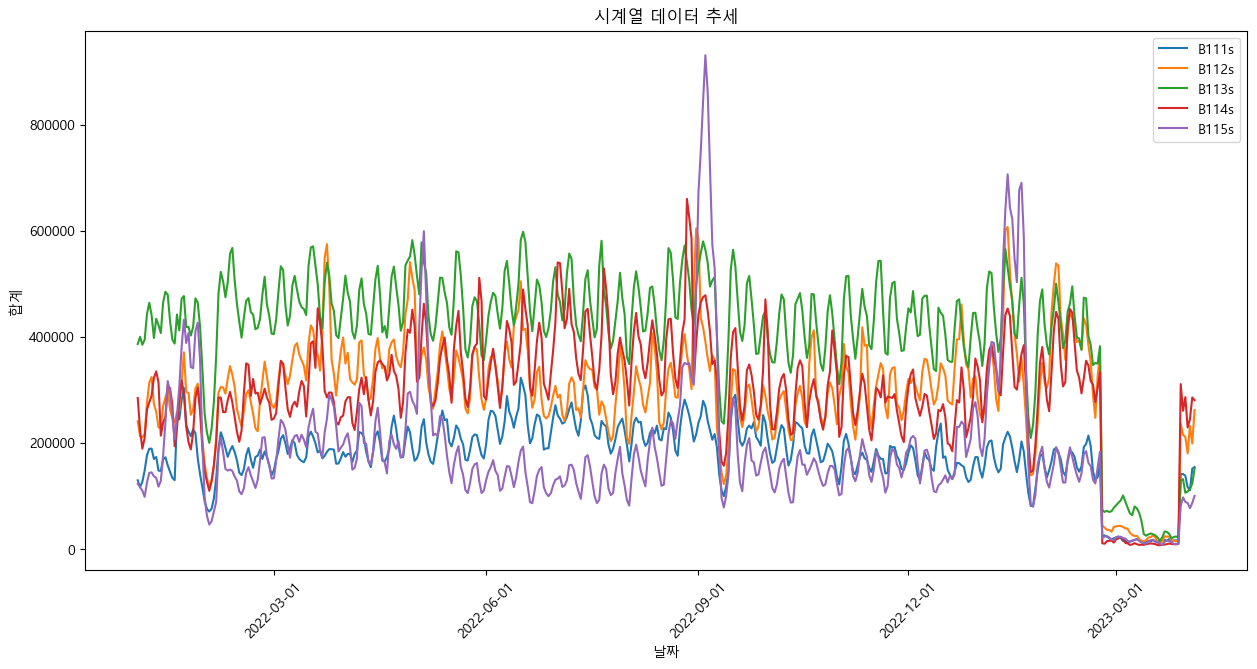

In [54]:
# 데이터프레임 리스트 생성
dataframes_B1s = [B111s, B112s, B113s, B114s, B115s]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B111s.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B111s', 'B112s', 'B113s', 'B114s', 'B115s'] # 수정된 부분

for idx, df in enumerate(dataframes_B1s):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

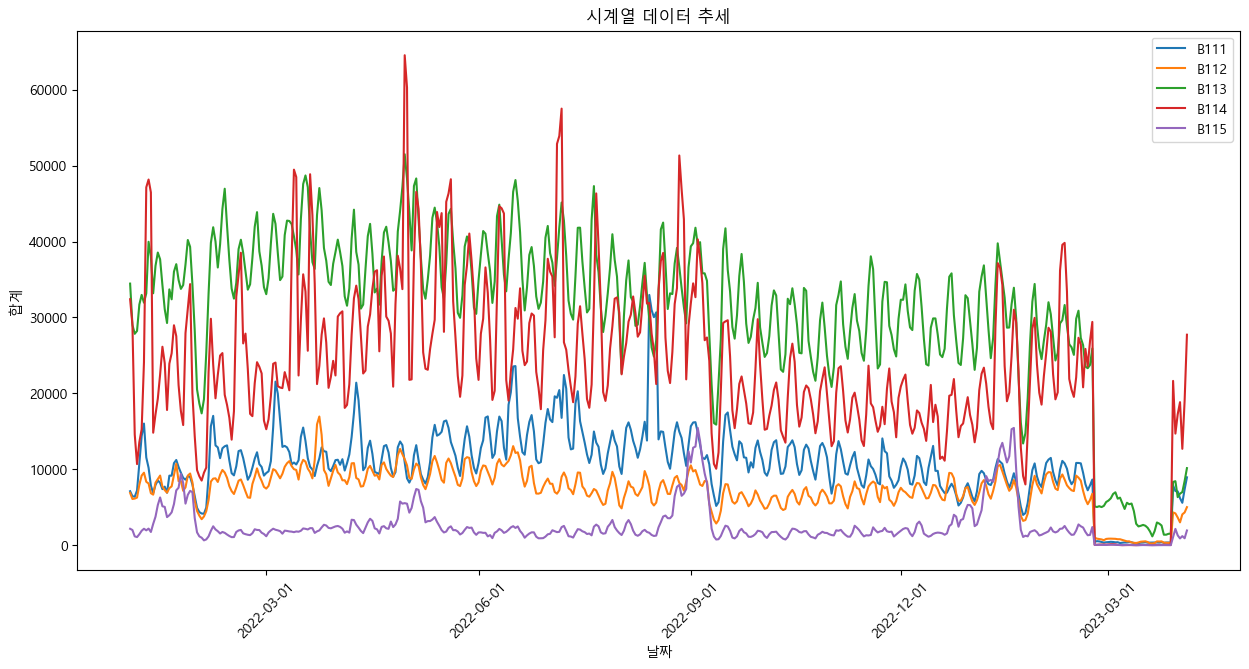

In [56]:
# 데이터프레임 리스트 생성
dataframes_B1 = [B111, B112, B113, B114, B115]

# 데이터 시각화
fig, ax = plt.subplots(figsize=(15, 7))
x_labels = B111.columns[6:].astype(str)
specified_labels = [date if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"] else '' for date in x_labels]
specified_indices = [idx for idx, date in enumerate(x_labels) if date[-6:] in ["-03-01", "-06-01", "-09-01", "-12-01"]]
specified_xticklabels = [date for date in specified_labels if date]

labels = ['B111', 'B112', 'B113', 'B114', 'B115'] # 수정된 부분

for idx, df in enumerate(dataframes_B1):
    last_row = df.iloc[-1, 6:]
    
    ax.plot(x_labels, last_row, label=labels[idx]) # 수정된 부분

ax.set_xticks(specified_indices)
ax.set_xticklabels(specified_xticklabels, rotation=45)
plt.xlabel('날짜')
plt.ylabel('합계')
plt.title('시계열 데이터 추세')
plt.legend()
plt.show()

판매량 데이터도 3월1일 전후로 결측치가 보인다. 데이터 수집의 오류일 가능성이 크다고 볼 수 있다. 그래서 그 날짜 칼럼을 제거하였다.

# 전처리 작업

In [58]:
B111


ID                제품             대분류             중분류  \
0          0  B002-00001-00001  B002-C001-0002  B002-C002-0007   
1          1  B002-00002-00001  B002-C001-0003  B002-C002-0008   
2          2  B002-00002-00002  B002-C001-0003  B002-C002-0008   
3          3  B002-00002-00003  B002-C001-0003  B002-C002-0008   
4          4  B002-00003-00001  B002-C001-0001  B002-C002-0001   
...      ...               ...             ...             ...   
15885  15885  B002-03799-00002  B002-C001-0003  B002-C002-0008   
15886  15886  B002-03799-00003  B002-C001-0003  B002-C002-0008   
15887  15887  B002-03799-00004  B002-C001-0003  B002-C002-0008   
15888  15888  B002-03799-00005  B002-C001-0003  B002-C002-0008   
15889  15889  B002-03799-00010  B002-C001-0002  B002-C002-0004   

                  소분류         브랜드  2022-01-01  2022-01-02  2022-01-03  \
0      B002-C003-0038  B002-00001           0           0           0   
1      B002-C003-0044  B002-00002           0           0           0   
2      B002-C003-0044  B002-00002           0           0           0   
3      B002-C003-0044  B002-00002           0           0           0   
4      B002-C003-0003  B002-00003           0           0           0   
...               ...         ...         ...         ...         ...   
15885  B002-C003-0042  B002-03799           0           0           0   
15886  B002-C003-0044  B002-03799           0           0           0   
15887  B002-C003-0044  B002-03799           0           0           0   
15888  B002-C003-0044  B002-03799           0           0           0   
15889  B002-C003-0020  B002-03799           0           0           0   

       2022-01-04  ...  2023-03-26  2023-03-27  2023-03-28  2023-03-29  \
0               0  ...           0           0           0           0   
1               0  ...           0           0           0           1   
2               0  ...           0           0           0           0   
3               0  ...           0           0           0           0   
4               0  ...           0           0           0           0   
...           ...  ...         ...         ...         ...         ...   
15885           0  ...           0           0           0           0   
15886           0  ...           0           0           0           3   
15887           0  ...           0           0           0           0   
15888           0  ...           0           0           0           0   
15889           0  ...           0           0           0           0   

       2023-03-30  2023-03-31  2023-04-01  2023-04-02  2023-04-03  2023-04-04  
0               0           0           0           0           0           0  
1               3           2           0           0           2           0  
2               0           0           0           0           0           0  
3               0           0           0           0           0           0  
4               0           0           0           0           0           0  
...           ...         ...         ...         ...         ...         ...  
15885           0           0           0           0           0           0  
15886           0           2           4           1           1           3  
15887           0           0           0           0           0           0  
15888           0           0           0           0           0           2  
15889           0           0           0           0           0           0  

[15890 rows x 465 columns]